# Complete Guide to Decision Trees: Classification, Regression, and Optimization

## Introduction

Welcome to this comprehensive guide on Decision Trees! This notebook covers everything you need to know about decision trees, from basic concepts to advanced implementation and optimization techniques.

**What You'll Learn:**
- 🌳 **Decision Tree Fundamentals** - Understanding nodes, branches, and splitting criteria
- 📊 **Entropy & Information Gain** - The mathematics behind feature selection
- 🎯 **Classification Trees** - Predicting categories using the Tennis dataset
- 🏠 **Regression Trees** - Predicting continuous values using the Ames Housing dataset
- ⚙️ **Hyperparameter Tuning** - Optimizing model performance and preventing overfitting
- 📈 **Model Evaluation** - Understanding performance metrics and validation techniques

**Why Decision Trees Matter:**
- **Interpretability**: Easy to understand and explain (like a flowchart)
- **Versatility**: Works for both classification and regression problems
- **No assumptions**: Doesn't require assumptions about data distribution
- **Feature selection**: Automatically identifies important features
- **Non-linear patterns**: Can capture complex relationships in data

**Datasets Used:**
- 🎾 **Tennis Dataset**: A classic classification problem for predicting whether to play tennis
- 🏠 **Ames Housing Dataset**: A regression problem for predicting house prices

Let's dive in and master decision trees together!

## 📋 Table of Contents

1. **[Import Libraries and Load Datasets](#1-import-libraries-and-load-datasets)**
2. **[Understanding Decision Trees Fundamentals](#2-understanding-decision-trees-fundamentals)**
3. **[Entropy and Information Gain Concepts](#3-entropy-and-information-gain-concepts)**
4. **[Decision Trees for Classification (Tennis Dataset)](#4-decision-trees-for-classification)**
5. **[Data Preparation and Encoding](#5-data-preparation-and-encoding)**
6. **[Training and Visualizing Classification Trees](#6-training-and-visualizing-classification-trees)**
7. **[Model Evaluation for Classification](#7-model-evaluation-for-classification)**
8. **[Decision Trees for Regression (Ames Housing Dataset)](#8-decision-trees-for-regression)**
9. **[Feature Selection and Visualization](#9-feature-selection-and-visualization)**
10. **[Training Regression Trees](#10-training-regression-trees)**
11. **[Model Evaluation Metrics for Regression](#11-model-evaluation-metrics-for-regression)**
12. **[Hyperparameter Tuning - Max Depth](#12-hyperparameter-tuning-max-depth)**
13. **[Hyperparameter Tuning - Min Samples Split](#13-hyperparameter-tuning-min-samples-split)**
14. **[Optimized Model Implementation](#14-optimized-model-implementation)**
15. **[Summary and Next Steps](#15-summary-and-next-steps)**

## 1. Import Libraries and Load Datasets

Let's start by importing all the necessary libraries we'll need throughout this notebook and loading our datasets.

### Required Libraries:
- **Data Manipulation**: `pandas`, `numpy`
- **Visualization**: `matplotlib.pyplot`
- **Machine Learning**: `sklearn` (various modules)
- **Decision Trees**: `DecisionTreeClassifier`, `DecisionTreeRegressor`
- **Evaluation**: Various metrics from `sklearn.metrics`
- **Data Preprocessing**: `OneHotEncoder`, `train_test_split`

In [13]:
# Core libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Configure matplotlib for better visualizations
plt.style.use('ggplot')
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(42)

# Load datasets
print("Loading datasets...")

# Load Tennis dataset for classification
tennis_data = pd.read_csv('tennis.csv')
print(f"Tennis dataset shape: {tennis_data.shape}")
print("Tennis dataset preview:")
print(tennis_data.head())

print("\n" + "="*50 + "\n")

# Load Ames Housing dataset for regression
ames_data = pd.read_csv('ames.csv')
print(f"Ames Housing dataset shape: {ames_data.shape}")
print("Ames dataset preview (first 5 rows, selected columns):")
print(ames_data[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].head())

print("\n✅ All libraries imported and datasets loaded successfully!")

Loading datasets...
Tennis dataset shape: (14, 5)
Tennis dataset preview:
    outlook  temp humidity  windy play
0     sunny   hot     high  False   no
1     sunny   hot     high   True   no
2  overcast   hot     high  False  yes
3     rainy  mild     high  False  yes
4     rainy  cool   normal  False  yes


Ames Housing dataset shape: (1460, 81)
Ames dataset preview (first 5 rows, selected columns):
   LotArea  1stFlrSF  GrLivArea  SalePrice
0     8450       856       1710     208500
1     9600      1262       1262     181500
2    11250       920       1786     223500
3     9550       961       1717     140000
4    14260      1145       2198     250000

✅ All libraries imported and datasets loaded successfully!


## 2. Understanding Decision Trees Fundamentals

### What is a Decision Tree?

A **decision tree** is a tree-like model used for both classification and regression tasks. Think of it as a flowchart that helps make decisions by asking a series of yes/no questions.

### Key Components:

#### 🌳 **Tree Structure**
- **Root Node**: The starting point representing the entire dataset
- **Internal Nodes**: Decision points that split the data based on feature values
- **Leaf Nodes**: End points that contain the final predictions
- **Branches**: Paths connecting nodes, representing decision outcomes

#### 🔄 **How Decision Trees Work**
1. **Start at Root**: Begin with all data at the root node
2. **Ask Questions**: At each node, ask a yes/no question about a feature
3. **Split Data**: Divide data based on the answer to the question
4. **Repeat**: Continue until reaching pure leaf nodes or stopping criteria
5. **Make Predictions**: New data follows the same path to get predictions

### Decision Trees vs Other Algorithms

| Aspect | Decision Trees | Linear Models | Neural Networks |
|--------|---------------|---------------|-----------------|
| **Interpretability** | ⭐⭐⭐⭐⭐ Very High | ⭐⭐⭐ Moderate | ⭐ Low |
| **Non-linear Patterns** | ⭐⭐⭐⭐ Good | ⭐ Poor | ⭐⭐⭐⭐⭐ Excellent |
| **Training Speed** | ⭐⭐⭐⭐ Fast | ⭐⭐⭐⭐⭐ Very Fast | ⭐⭐ Slow |
| **Overfitting Risk** | ⭐⭐ High | ⭐⭐⭐ Low | ⭐⭐ High |

### Classification vs Regression Trees

**Classification Trees:**
- Predict **categories** or **classes** (e.g., "Yes/No", "Spam/Not Spam")
- Use criteria like **Entropy** and **Information Gain**
- Leaf nodes contain **class labels**

**Regression Trees:**
- Predict **continuous values** (e.g., house prices, temperature)
- Use criteria like **Mean Squared Error (MSE)**
- Leaf nodes contain **predicted values** (usually the mean of training examples)

### Real-World Applications

🎯 **Classification Examples:**
- Email spam detection
- Medical diagnosis
- Customer segmentation
- Credit approval

📈 **Regression Examples:**
- House price prediction
- Stock price forecasting
- Sales forecasting
- Risk assessment

### Visual Example

Imagine deciding whether to play tennis based on weather conditions:

```
                    [Outlook]
                   /    |    \
              Sunny/   |      \Rainy
                /   Overcast   \
            [Humidity]  |       [Windy]
           /         \  |      /       \
      High/           \Yes   True/      \False
        /              \    /            \
      No               Yes No            Yes
```

This simple tree asks:
1. "What's the outlook?" 
2. If sunny: "Is humidity high?" → If yes: Don't play, If no: Play
3. If overcast: Always play
4. If rainy: "Is it windy?" → If yes: Don't play, If no: Play

## 3. Entropy and Information Gain Concepts

### Understanding Entropy

**Entropy** is a measure of **disorder** or **uncertainty** in a dataset. It was introduced by Claude Shannon, the "father of information theory."

#### 💡 **Intuitive Understanding**
Think of entropy like the messiness of a sock drawer:
- **Low Entropy (0)**: All socks are the same color → Easy to predict what you'll pick
- **High Entropy (1)**: Equal mix of different colored socks → Hard to predict what you'll pick
- **Maximum Entropy**: When you have equal amounts of all categories

### Mathematical Definition

For a dataset with classes, entropy is calculated as:

$$H(S) = -\sum_{i=1}^{c} p_i \log_2(p_i)$$

Where:
- $H(S)$ = Entropy of dataset S
- $p_i$ = Probability of class i
- $c$ = Number of classes

#### 📊 **Example Calculation**
Let's say we have 14 tennis games where:
- 9 games were played (Yes) → $p_{yes} = 9/14 = 0.643$
- 5 games were not played (No) → $p_{no} = 5/14 = 0.357$

$$H(S) = -(0.643 \times \log_2(0.643)) - (0.357 \times \log_2(0.357))$$
$$H(S) = -(-0.637) - (-1.487) = 0.637 + 0.531 = 0.940$$

### Information Gain

**Information Gain** measures how much uncertainty is reduced by splitting on a particular feature.

$$IG(S, A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v)$$

Where:
- $IG(S, A)$ = Information gain of splitting dataset S on attribute A
- $H(S)$ = Entropy before split
- $S_v$ = Subset of S where attribute A has value v
- $H(S_v)$ = Entropy of subset $S_v$

### Why This Matters for Decision Trees

🎯 **Goal**: Maximize information gain at each split
- **High Information Gain** = Good split (reduces uncertainty significantly)
- **Low Information Gain** = Poor split (doesn't help much with classification)

### Visual Understanding of Entropy

Let's visualize how entropy changes with different class distributions:

🎾 Tennis Dataset Analysis:
   • Total games: 14
   • Games played (Yes): 9 (probability = 0.643)
   • Games not played (No): 5 (probability = 0.357)
   • Dataset Entropy: 0.940

📊 Interpretation:
   • Entropy = 0.940 indicates moderate uncertainty
   • Perfect prediction (entropy = 0) would mean all games have same outcome
   • Maximum uncertainty (entropy = 1) would mean equal Yes/No games


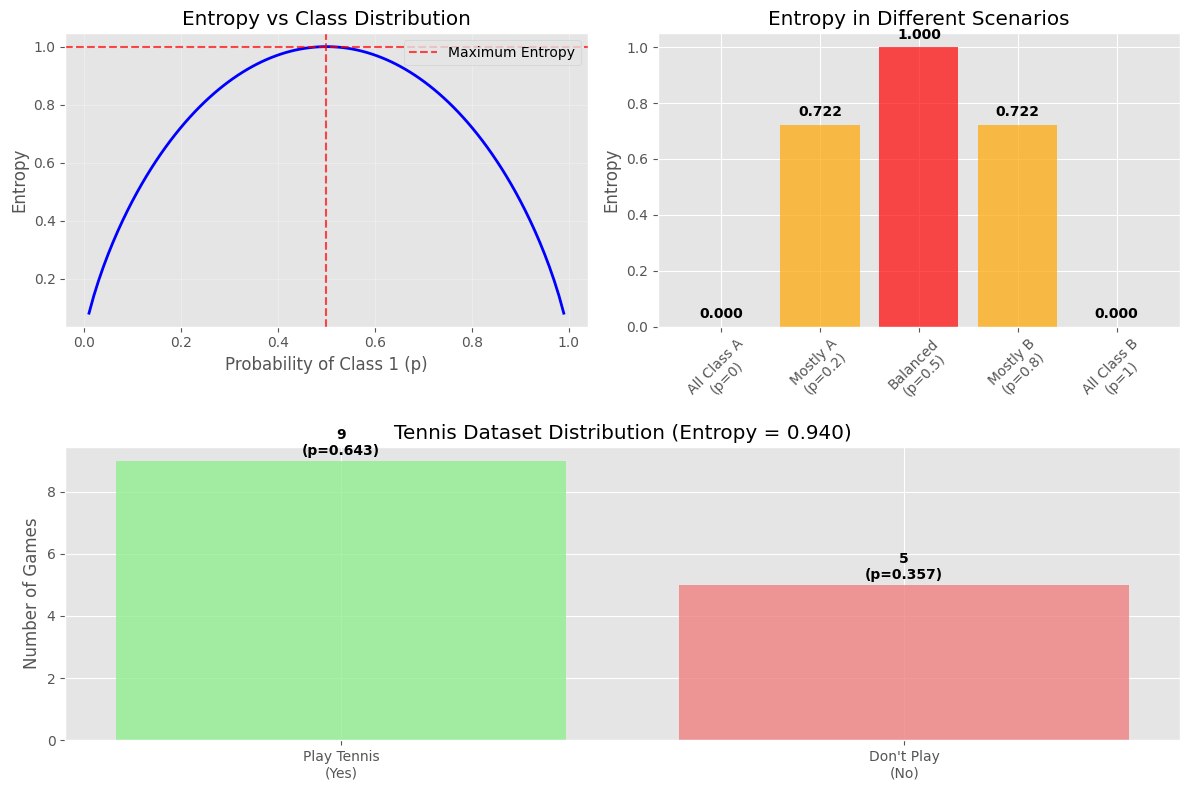


🎯 Key Takeaway:
   The higher the entropy, the more 'mixed up' our data is.
   Decision trees try to reduce entropy by finding the best splits!


In [14]:
# Function to calculate entropy
def calculate_entropy(probabilities):
    """Calculate entropy given a list of probabilities"""
    entropy = 0
    for p in probabilities:
        if p > 0:  # Avoid log(0)
            entropy -= p * np.log2(p)
    return entropy

# Create a range of probability values for binary classification
p_values = np.linspace(0.01, 0.99, 100)
entropy_values = []

for p in p_values:
    # For binary classification: p and (1-p)
    entropy = calculate_entropy([p, 1-p])
    entropy_values.append(entropy)

# Create the entropy visualization
plt.figure(figsize=(12, 8))

# Plot entropy curve
plt.subplot(2, 2, 1)
plt.plot(p_values, entropy_values, 'b-', linewidth=2)
plt.xlabel('Probability of Class 1 (p)')
plt.ylabel('Entropy')
plt.title('Entropy vs Class Distribution')
plt.grid(True, alpha=0.3)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.7, label='Maximum Entropy')
plt.axvline(x=0.5, color='r', linestyle='--', alpha=0.7)
plt.legend()

# Show specific entropy values
plt.subplot(2, 2, 2)
scenarios = ['All Class A\n(p=0)', 'Mostly A\n(p=0.2)', 'Balanced\n(p=0.5)', 'Mostly B\n(p=0.8)', 'All Class B\n(p=1)']
entropy_vals = [0, calculate_entropy([0.2, 0.8]), 1, calculate_entropy([0.8, 0.2]), 0]
colors = ['green', 'orange', 'red', 'orange', 'green']

bars = plt.bar(scenarios, entropy_vals, color=colors, alpha=0.7)
plt.ylabel('Entropy')
plt.title('Entropy in Different Scenarios')
plt.xticks(rotation=45)

# Add value labels on bars
for bar, val in zip(bars, entropy_vals):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

# Example: Tennis dataset entropy calculation
plt.subplot(2, 1, 2)
# Tennis data: 9 Yes, 5 No out of 14 total
p_yes = 9/14
p_no = 5/14
tennis_entropy = calculate_entropy([p_yes, p_no])

print(f"🎾 Tennis Dataset Analysis:")
print(f"   • Total games: 14")
print(f"   • Games played (Yes): 9 (probability = {p_yes:.3f})")
print(f"   • Games not played (No): 5 (probability = {p_no:.3f})")
print(f"   • Dataset Entropy: {tennis_entropy:.3f}")
print(f"\n📊 Interpretation:")
print(f"   • Entropy = {tennis_entropy:.3f} indicates moderate uncertainty")
print(f"   • Perfect prediction (entropy = 0) would mean all games have same outcome")
print(f"   • Maximum uncertainty (entropy = 1) would mean equal Yes/No games")

# Visual representation of tennis data
categories = ['Play Tennis\n(Yes)', 'Don\'t Play\n(No)']
counts = [9, 5]
probabilities = [p_yes, p_no]

x = np.arange(len(categories))
bars = plt.bar(x, counts, color=['lightgreen', 'lightcoral'], alpha=0.8)
plt.ylabel('Number of Games')
plt.title(f'Tennis Dataset Distribution (Entropy = {tennis_entropy:.3f})')
plt.xticks(x, categories)

# Add count and probability labels
for i, (bar, count, prob) in enumerate(zip(bars, counts, probabilities)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{count}\n(p={prob:.3f})', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🎯 Key Takeaway:")
print(f"   The higher the entropy, the more 'mixed up' our data is.")
print(f"   Decision trees try to reduce entropy by finding the best splits!")

## 4. Decision Trees for Classification (Tennis Dataset)

Now let's apply decision trees to a real classification problem! We'll use the classic "Play Tennis" dataset to predict whether tennis should be played based on weather conditions.

### 🎾 The Tennis Problem

**Objective**: Predict whether to play tennis (Yes/No) based on weather conditions

**Features**:
- **Outlook**: sunny, overcast, rainy
- **Temperature**: hot, mild, cool  
- **Humidity**: high, normal
- **Windy**: true, false

**Target**: Play tennis (yes/no)

### Why This Dataset is Perfect for Learning

1. **Small and manageable** - Easy to understand each decision
2. **Categorical features** - Shows how trees handle non-numeric data
3. **Clear logic** - Decisions make intuitive sense
4. **Binary classification** - Simple yes/no outcome

Let's explore our tennis dataset in detail:

🎾 TENNIS DATASET EXPLORATION
Dataset shape: (14, 5)
Columns: ['outlook', 'temp', 'humidity', 'windy', 'play']

First few rows:
    outlook  temp humidity  windy play
0     sunny   hot     high  False   no
1     sunny   hot     high   True   no
2  overcast   hot     high  False  yes
3     rainy  mild     high  False  yes
4     rainy  cool   normal  False  yes
5     rainy  cool   normal   True   no
6  overcast  cool   normal   True  yes
7     sunny  mild     high  False   no
8     sunny  cool   normal  False  yes
9     rainy  mild   normal  False  yes

📊 FEATURE ANALYSIS

OUTLOOK:
  • sunny: 5 (35.7%)
  • rainy: 5 (35.7%)
  • overcast: 4 (28.6%)

TEMP:
  • mild: 6 (42.9%)
  • hot: 4 (28.6%)
  • cool: 4 (28.6%)

HUMIDITY:
  • high: 7 (50.0%)
  • normal: 7 (50.0%)

WINDY:
  • False: 8 (57.1%)
  • True: 6 (42.9%)

PLAY (Target Variable):
  • yes: 9 (64.3%)
  • no: 5 (35.7%)


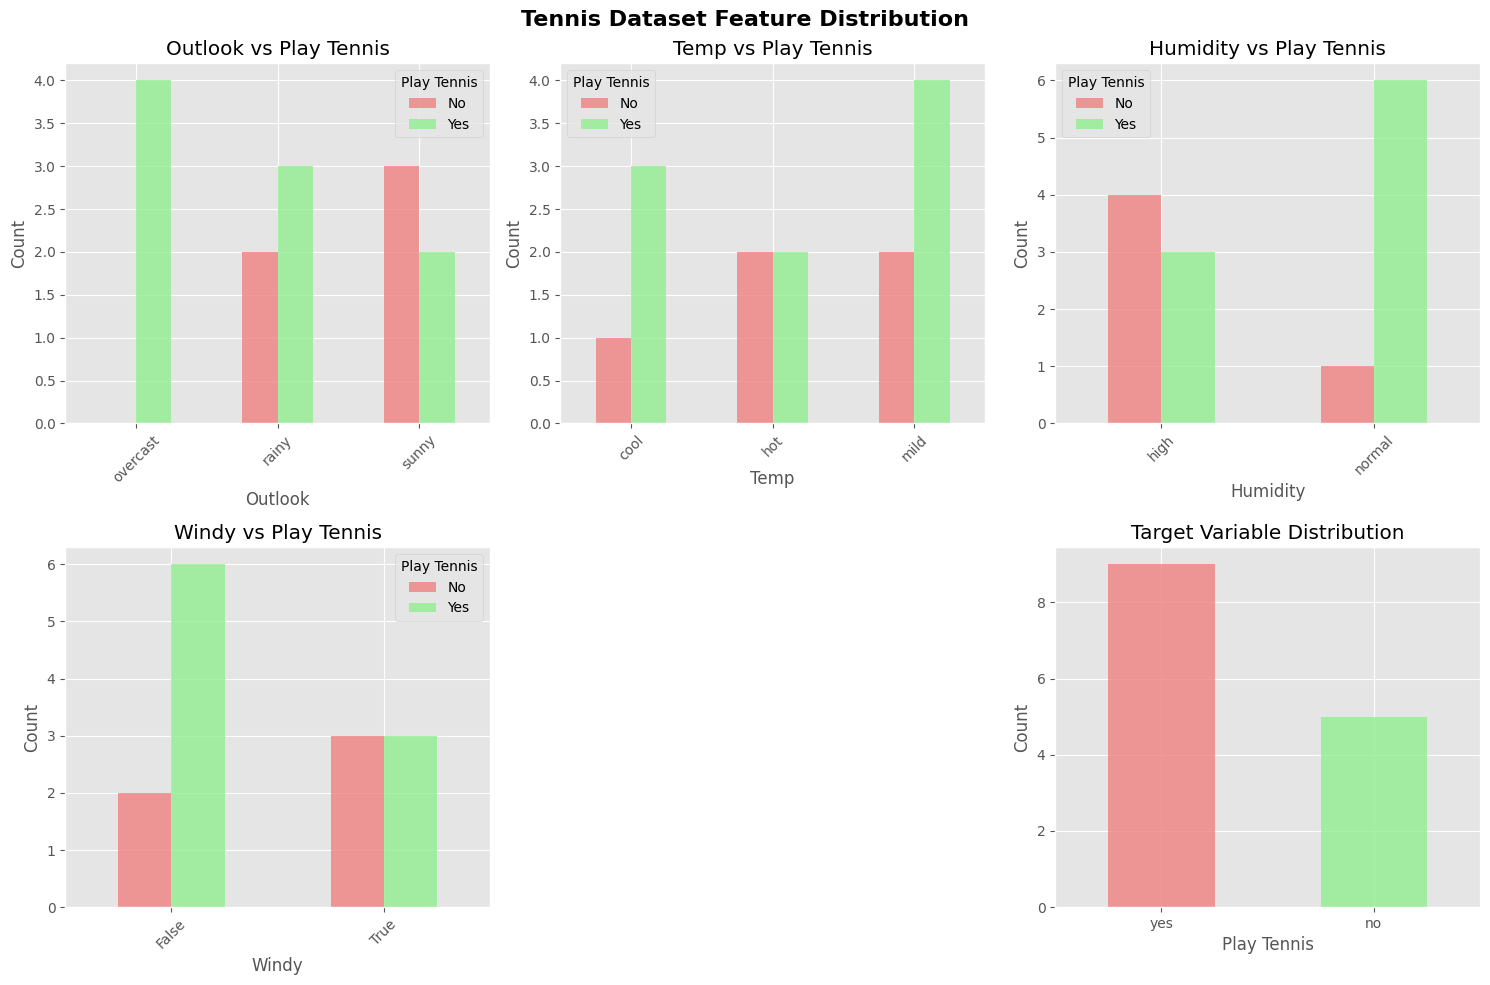


🔍 INSIGHTS FROM THE DATA
• The dataset is fairly balanced (9 Yes vs 5 No)
• All outlook conditions are represented
• Temperature and humidity are evenly distributed
• Wind conditions are balanced
• This balance makes it a good dataset for learning decision trees!


In [15]:
# Detailed exploration of tennis dataset
print("🎾 TENNIS DATASET EXPLORATION")
print("=" * 50)

# Basic information
print(f"Dataset shape: {tennis_data.shape}")
print(f"Columns: {list(tennis_data.columns)}")
print("\nFirst few rows:")
print(tennis_data.head(10))

print("\n📊 FEATURE ANALYSIS")
print("=" * 30)

# Analyze each feature
features = ['outlook', 'temp', 'humidity', 'windy']
target = 'play'

for feature in features:
    print(f"\n{feature.upper()}:")
    value_counts = tennis_data[feature].value_counts()
    for value, count in value_counts.items():
        percentage = (count / len(tennis_data)) * 100
        print(f"  • {value}: {count} ({percentage:.1f}%)")

print(f"\n{target.upper()} (Target Variable):")
target_counts = tennis_data[target].value_counts()
for value, count in target_counts.items():
    percentage = (count / len(tennis_data)) * 100
    print(f"  • {value}: {count} ({percentage:.1f}%)")

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Tennis Dataset Feature Distribution', fontsize=16, fontweight='bold')

# Plot each feature
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    
    # Count values for each class
    feature_play = tennis_data.groupby([feature, target]).size().unstack(fill_value=0)
    
    ax = axes[row, col]
    feature_play.plot(kind='bar', ax=ax, color=['lightcoral', 'lightgreen'], alpha=0.8)
    ax.set_title(f'{feature.title()} vs Play Tennis')
    ax.set_xlabel(feature.title())
    ax.set_ylabel('Count')
    ax.legend(['No', 'Yes'], title='Play Tennis')
    ax.tick_params(axis='x', rotation=45)

# Plot target distribution
ax = axes[1, 2]
target_counts.plot(kind='bar', ax=ax, color=['lightcoral', 'lightgreen'], alpha=0.8)
ax.set_title('Target Variable Distribution')
ax.set_xlabel('Play Tennis')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=0)

# Remove empty subplot
axes[1, 1].remove()

plt.tight_layout()
plt.show()

print("\n🔍 INSIGHTS FROM THE DATA")
print("=" * 35)
print("• The dataset is fairly balanced (9 Yes vs 5 No)")
print("• All outlook conditions are represented")
print("• Temperature and humidity are evenly distributed")
print("• Wind conditions are balanced")
print("• This balance makes it a good dataset for learning decision trees!")

## 5. Data Preparation and Encoding

Before we can train our decision tree, we need to prepare our data. Since our tennis dataset contains categorical features (like "sunny", "hot", "high"), we need to convert them to numerical format that scikit-learn can understand.

### 🔄 One-Hot Encoding

**One-Hot Encoding** converts categorical variables into binary (0/1) columns:

**Example**: 
- Original: `outlook = ["sunny", "overcast", "rainy"]`
- Encoded: `outlook_sunny=1/0, outlook_overcast=1/0, outlook_rainy=1/0`

### Why One-Hot Encoding?

✅ **Advantages**:
- Preserves all categorical information
- No artificial ordering imposed
- Works well with tree-based algorithms

⚠️ **Considerations**:
- Increases number of features
- Can create sparse datasets with many categories

### Train/Test Split

We'll split our data to evaluate model performance on unseen data:
- **Training Set (70%)**: Used to build the decision tree
- **Test Set (30%)**: Used to evaluate how well the tree generalizes

🔄 DATA PREPARATION FOR CLASSIFICATION
Original features shape: (14, 4)
Target shape: (14,)

Original features (first 5 rows):
    outlook  temp humidity  windy
0     sunny   hot     high  False
1     sunny   hot     high   True
2  overcast   hot     high  False
3     rainy  mild     high  False
4     rainy  cool   normal  False

📊 Train/Test Split:
   • Training set: 9 samples
   • Test set: 5 samples
   • Train target distribution: {'yes': 6, 'no': 3}
   • Test target distribution: {'yes': 3, 'no': 2}

🔀 APPLYING ONE-HOT ENCODING
Features after encoding:
    1. outlook_rainy
    2. outlook_sunny
    3. temp_hot
    4. temp_mild
    5. humidity_normal
    6. windy_True

Shape after encoding:
   • Training: (9, 6)
   • Test: (5, 6)

Encoded training data (first 5 rows):
   outlook_rainy  outlook_sunny  temp_hot  temp_mild  humidity_normal  \
0            0.0            1.0       1.0        0.0              0.0   
1            0.0            0.0       0.0        0.0              1.0   
2

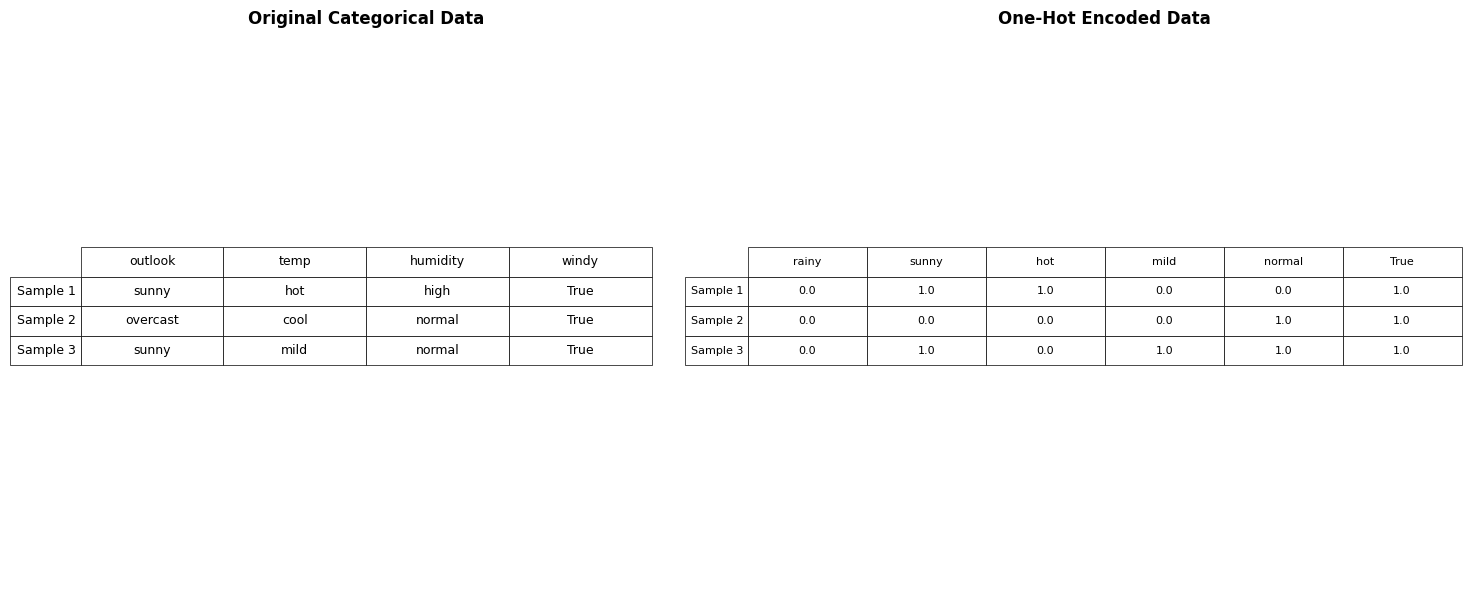


✅ Data preparation complete!
   • Categorical features converted to numerical
   • Data split into train/test sets
   • Ready for decision tree training!


In [16]:
# Prepare data for decision tree training
print("🔄 DATA PREPARATION FOR CLASSIFICATION")
print("=" * 45)

# Separate features and target
X_tennis = tennis_data[['outlook', 'temp', 'humidity', 'windy']]
y_tennis = tennis_data['play']

print("Original features shape:", X_tennis.shape)
print("Target shape:", y_tennis.shape)

print("\nOriginal features (first 5 rows):")
print(X_tennis.head())

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_tennis, y_tennis, 
    test_size=0.3, 
    random_state=42,
    stratify=y_tennis  # Ensure balanced split
)

print(f"\n📊 Train/Test Split:")
print(f"   • Training set: {X_train.shape[0]} samples")
print(f"   • Test set: {X_test.shape[0]} samples")
print(f"   • Train target distribution: {y_train.value_counts().to_dict()}")
print(f"   • Test target distribution: {y_test.value_counts().to_dict()}")

# Apply One-Hot Encoding
print("\n🔀 APPLYING ONE-HOT ENCODING")
print("=" * 35)

# Initialize and fit the encoder on training data
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Get feature names after encoding
feature_names = encoder.get_feature_names_out(X_train.columns)

print("Features after encoding:")
for i, name in enumerate(feature_names):
    print(f"   {i+1:2d}. {name}")

print(f"\nShape after encoding:")
print(f"   • Training: {X_train_encoded.shape}")
print(f"   • Test: {X_test_encoded.shape}")

# Create DataFrames for better visualization
X_train_df = pd.DataFrame(X_train_encoded, columns=feature_names)
X_test_df = pd.DataFrame(X_test_encoded, columns=feature_names)

print("\nEncoded training data (first 5 rows):")
print(X_train_df.head())

# Show the encoding transformation for a specific example
print("\n🔍 ENCODING EXAMPLE")
print("=" * 25)
example_idx = 0
print(f"Original: {X_train.iloc[example_idx].to_dict()}")
print(f"Encoded:  {dict(zip(feature_names, X_train_encoded[example_idx]))}")

# Visualize the encoding process
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Original data
orig_data = X_train.head(3)
orig_table = ax1.table(cellText=orig_data.values,
                       colLabels=orig_data.columns,
                       rowLabels=[f"Sample {i+1}" for i in range(3)],
                       cellLoc='center',
                       loc='center')
orig_table.auto_set_font_size(False)
orig_table.set_fontsize(9)
orig_table.scale(1.2, 1.5)
ax1.axis('off')
ax1.set_title('Original Categorical Data', fontsize=12, fontweight='bold')

# Encoded data
encoded_data = X_train_df.head(3)
encoded_table = ax2.table(cellText=encoded_data.values,
                         colLabels=[col.split('_')[1] if '_' in col else col for col in encoded_data.columns],
                         rowLabels=[f"Sample {i+1}" for i in range(3)],
                         cellLoc='center',
                         loc='center')
encoded_table.auto_set_font_size(False)
encoded_table.set_fontsize(8)
encoded_table.scale(1.5, 1.5)
ax2.axis('off')
ax2.set_title('One-Hot Encoded Data', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Data preparation complete!")
print("   • Categorical features converted to numerical")
print("   • Data split into train/test sets")
print("   • Ready for decision tree training!")

## 6. Training and Visualizing Classification Trees

Now comes the exciting part - training our decision tree! We'll create a classifier that learns the rules for predicting whether to play tennis based on weather conditions.

### 🌳 DecisionTreeClassifier Parameters

Key parameters we'll use:
- **`criterion='entropy'`**: Use entropy for splitting decisions (information gain)
- **`random_state=42`**: For reproducible results
- **`max_depth=None`**: Allow tree to grow until stopping criteria are met

### The Training Process

1. **Start with all data** at the root node
2. **Calculate information gain** for each feature
3. **Choose the best split** (highest information gain)
4. **Divide the data** based on the chosen split
5. **Repeat** for each subset until stopping criteria are met

### Stopping Criteria
- All samples in a node belong to the same class
- Maximum depth is reached
- Minimum samples per leaf/split is reached

🌳 TRAINING DECISION TREE CLASSIFIER
✅ Decision tree trained successfully!
   • Tree depth: 3
   • Number of leaves: 4
   • Number of features used: 6

📊 Feature Importance (top features):
   • windy_True: 0.413
   • humidity_normal: 0.333
   • outlook_rainy: 0.254


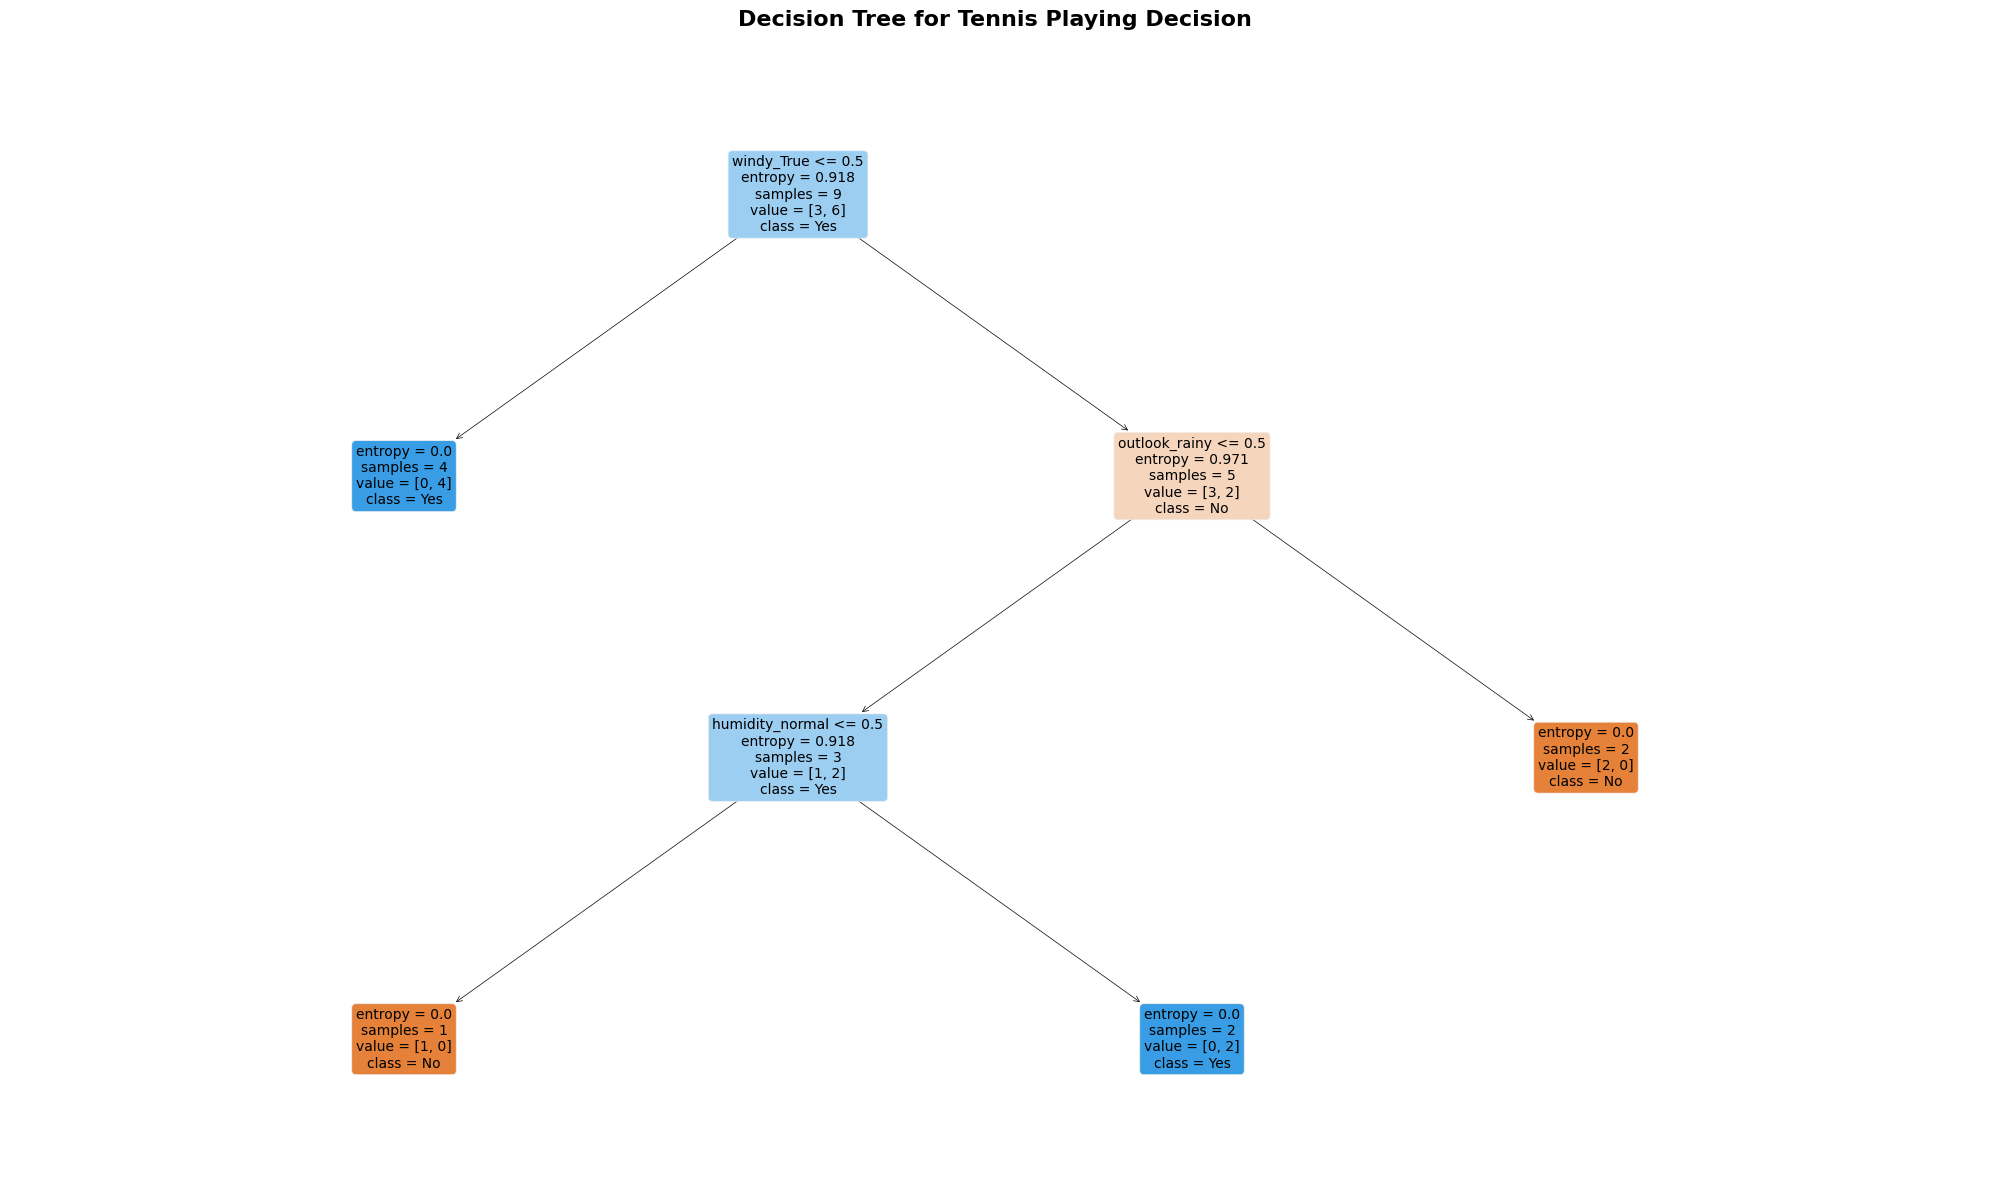


🔍 DECISION TREE INTERPRETATION
Decision path for test sample 1:
Original features: {'outlook': 'overcast', 'temp': 'mild', 'humidity': 'high', 'windy': True}
   → windy_True > 0.5 (go right)
   → outlook_rainy ≤ 0.5 (go left)
   → humidity_normal ≤ 0.5 (go left)
   → Prediction: No (confidence: 1.00)

Decision path for test sample 2:
Original features: {'outlook': 'overcast', 'temp': 'hot', 'humidity': 'normal', 'windy': False}
   → windy_True ≤ 0.5 (go left)
   → Prediction: Yes (confidence: 1.00)

Decision path for test sample 3:
Original features: {'outlook': 'sunny', 'temp': 'hot', 'humidity': 'high', 'windy': False}
   → windy_True ≤ 0.5 (go left)
   → Prediction: Yes (confidence: 1.00)



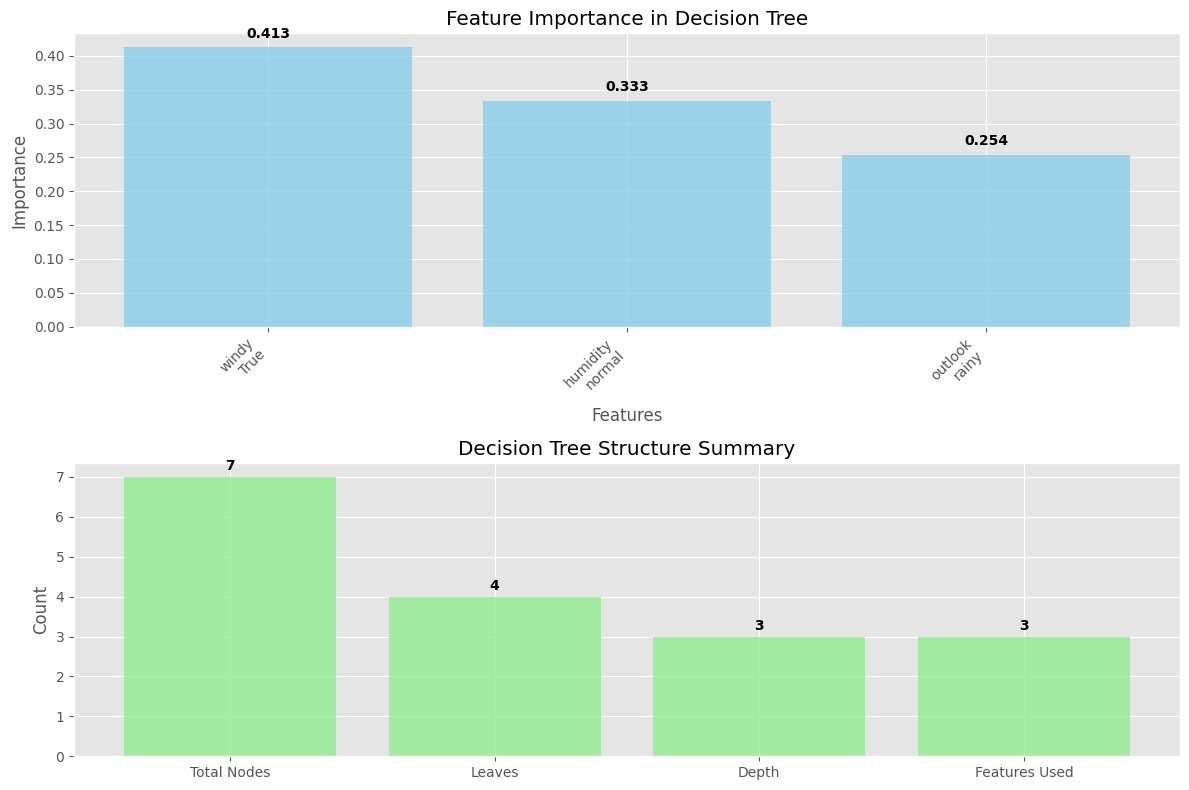

🎯 Key Insights:
   • The tree learns interpretable rules
   • Each path represents a decision-making process
   • Feature importance shows which weather factors matter most
   • The tree structure is easy to understand and explain!


In [17]:
# Train the decision tree classifier
print("🌳 TRAINING DECISION TREE CLASSIFIER")
print("=" * 40)

# Create and train the classifier
clf = DecisionTreeClassifier(
    criterion='entropy',    # Use entropy for splitting
    random_state=42,       # For reproducible results
    max_depth=4           # Limit depth to prevent overfitting
)

# Fit the model
clf.fit(X_train_encoded, y_train)

print("✅ Decision tree trained successfully!")
print(f"   • Tree depth: {clf.get_depth()}")
print(f"   • Number of leaves: {clf.get_n_leaves()}")
print(f"   • Number of features used: {clf.n_features_in_}")

# Get feature importance
feature_importance = clf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print(f"\n📊 Feature Importance (top features):")
for idx, row in importance_df.head().iterrows():
    if row['Importance'] > 0:
        print(f"   • {row['Feature']}: {row['Importance']:.3f}")

# Visualize the decision tree
plt.figure(figsize=(20, 12))
plot_tree(clf, 
          feature_names=feature_names,
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree for Tennis Playing Decision', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Create a simplified tree interpretation
print("\n🔍 DECISION TREE INTERPRETATION")
print("=" * 35)

def interpret_tree_path(tree, feature_names, class_names, sample_idx=0):
    """Interpret the decision path for a sample"""
    # Fix: Reshape the sample to 2D array and ensure correct dtype for decision_path method
    sample_2d = X_test_encoded[sample_idx].reshape(1, -1).astype(np.float32)
    leaf_id = tree.decision_path(sample_2d).indices
    
    print(f"Decision path for test sample {sample_idx + 1}:")
    print(f"Original features: {dict(zip(X_test.columns, X_test.iloc[sample_idx]))}")
    
    for node_id in leaf_id:
        if tree.children_left[node_id] != tree.children_right[node_id]:  # Not a leaf
            feature_idx = tree.feature[node_id]
            threshold = tree.threshold[node_id]
            feature_name = feature_names[feature_idx]
            
            if X_test_encoded[sample_idx, feature_idx] <= threshold:
                direction = "≤"
                next_node = "left"
            else:
                direction = ">"
                next_node = "right"
                
            print(f"   → {feature_name} {direction} {threshold} (go {next_node})")
        else:  # Leaf node
            class_prediction = class_names[np.argmax(tree.value[node_id])]
            confidence = np.max(tree.value[node_id]) / np.sum(tree.value[node_id])
            print(f"   → Prediction: {class_prediction} (confidence: {confidence:.2f})")

# Interpret paths for first few test samples
for i in range(min(3, len(X_test))):
    interpret_tree_path(clf.tree_, feature_names, ['No', 'Yes'], i)
    print()

# Create a feature importance visualization
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
importance_df_nonzero = importance_df[importance_df['Importance'] > 0]
bars = plt.bar(range(len(importance_df_nonzero)), importance_df_nonzero['Importance'], 
               color='skyblue', alpha=0.8)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.xticks(range(len(importance_df_nonzero)), 
           [name.replace('_', '\n') for name in importance_df_nonzero['Feature']], 
           rotation=45, ha='right')

# Add value labels on bars
for bar, importance in zip(bars, importance_df_nonzero['Importance']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{importance:.3f}', ha='center', va='bottom', fontweight='bold')

# Show the tree structure summary
plt.subplot(2, 1, 2)
tree_stats = {
    'Total Nodes': clf.tree_.node_count,
    'Leaves': clf.get_n_leaves(),
    'Depth': clf.get_depth(),
    'Features Used': np.sum(clf.feature_importances_ > 0)
}

bars = plt.bar(tree_stats.keys(), tree_stats.values(), color='lightgreen', alpha=0.8)
plt.ylabel('Count')
plt.title('Decision Tree Structure Summary')

for bar, value in zip(bars, tree_stats.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             str(int(value)), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("🎯 Key Insights:")
print("   • The tree learns interpretable rules")
print("   • Each path represents a decision-making process")
print("   • Feature importance shows which weather factors matter most")
print("   • The tree structure is easy to understand and explain!")

## 7. Model Evaluation for Classification

Now let's evaluate how well our decision tree performs on unseen data. We'll use several metrics to understand the model's effectiveness.

### 📊 Classification Metrics

**Accuracy**: The proportion of correct predictions
- Formula: `(True Positives + True Negatives) / Total Predictions`
- Range: 0 to 1 (higher is better)
- Interpretation: Overall correctness of the model

### Why Evaluate on Test Data?

✅ **Unbiased Assessment**: Test data wasn't used during training
✅ **Generalization**: How well the model performs on new, unseen data  
✅ **Overfitting Detection**: Large gap between train/test performance indicates overfitting

### Making Predictions

The decision tree makes predictions by:
1. Starting at the root node
2. Following the decision path based on feature values
3. Reaching a leaf node with the final prediction

📊 CLASSIFICATION MODEL EVALUATION
🎯 Model Performance:
   • Training Accuracy: 1.000 (100.0%)
   • Test Accuracy: 0.400 (40.0%)
   • Accuracy Difference: 0.600
   ⚠️  Possible overfitting (training accuracy much higher)

🔍 DETAILED PREDICTION ANALYSIS
Test Set Predictions:
 Sample Actual Predicted  Correct
      1    yes        no    False
      2    yes       yes     True
      3     no       yes    False
      4    yes       yes     True
      5     no       yes    False

📈 Summary:
   • Correct predictions: 2/5
   • Incorrect predictions: 3/5
   • Success rate: 40.0%


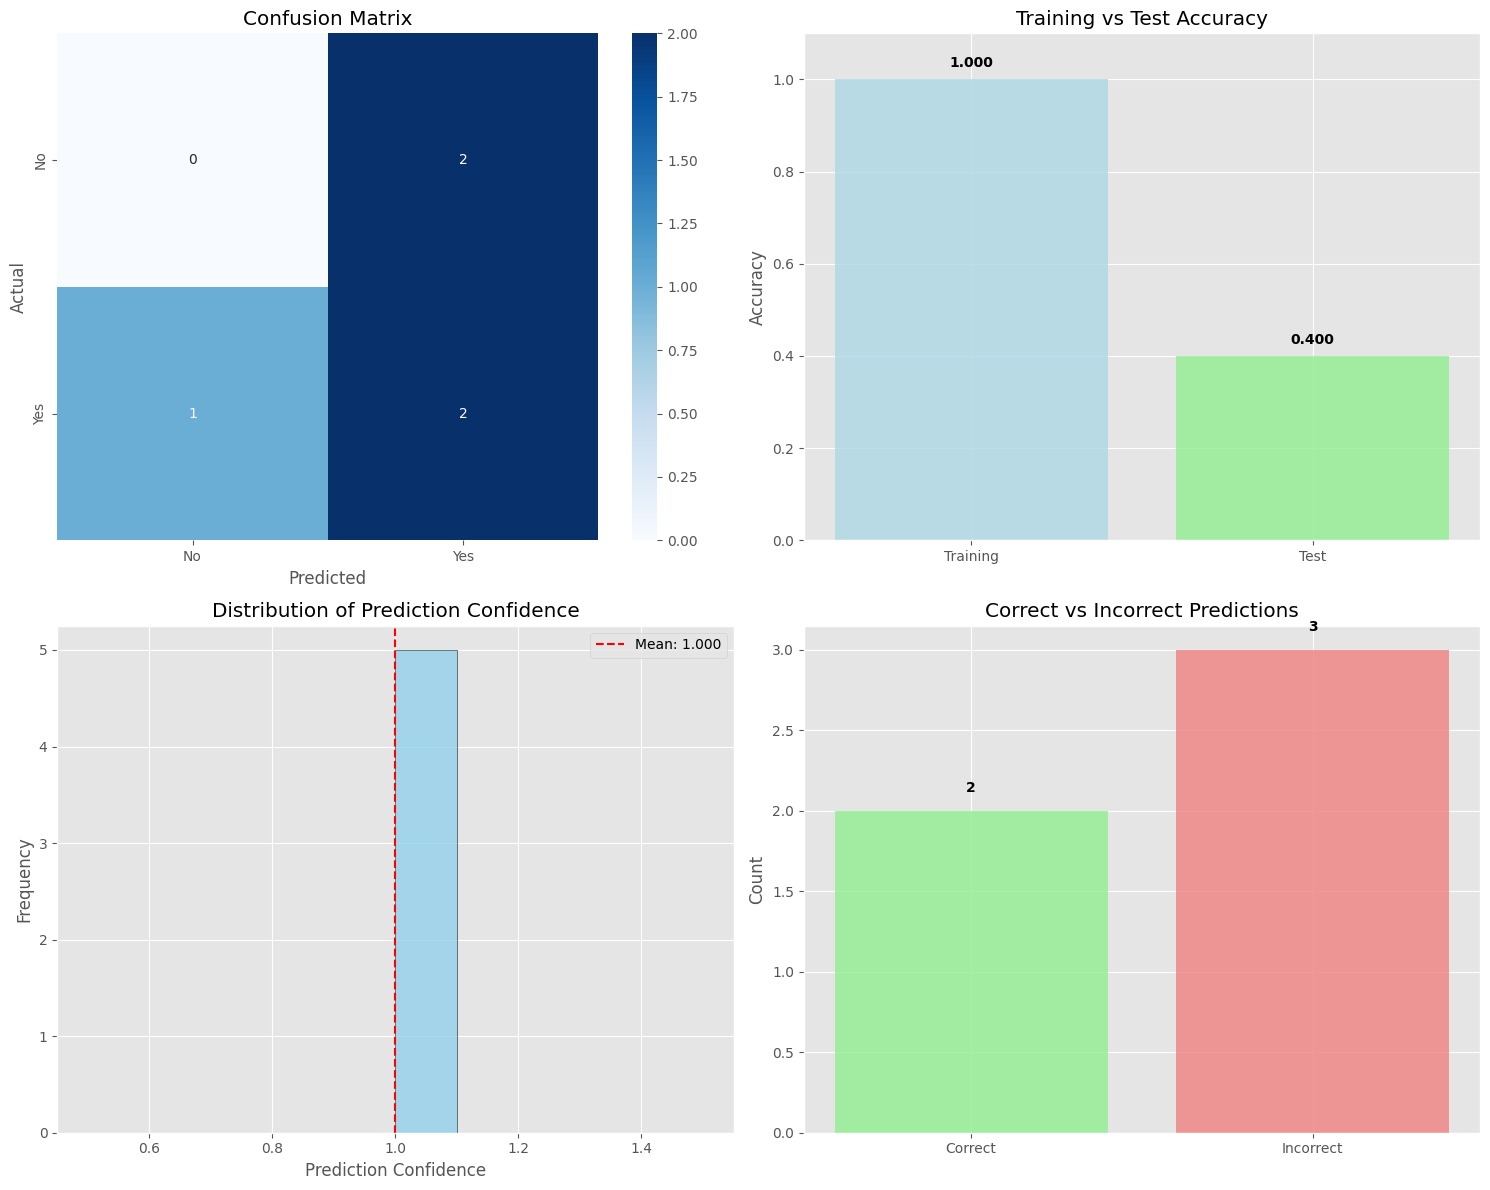


🎾 EXAMPLE PREDICTIONS

Sample 1:
   Weather: {'outlook': 'overcast', 'temp': 'mild', 'humidity': 'high', 'windy': True}
   Actual: yes
   Predicted: no
   Confidence: 1.000
   Result: ❌ Incorrect

Sample 2:
   Weather: {'outlook': 'overcast', 'temp': 'hot', 'humidity': 'normal', 'windy': False}
   Actual: yes
   Predicted: yes
   Confidence: 1.000
   Result: ✅ Correct

Sample 3:
   Weather: {'outlook': 'sunny', 'temp': 'hot', 'humidity': 'high', 'windy': False}
   Actual: no
   Predicted: yes
   Confidence: 1.000
   Result: ❌ Incorrect

🏆 MODEL PERFORMANCE SUMMARY
✅ The decision tree achieved 40.0% accuracy on test data
✅ The model makes interpretable decisions based on weather conditions
✅ Feature importance shows which weather factors matter most
✅ The tree structure is simple and easy to understand
⚠️  The model could be improved with more data or tuning.


In [18]:
# Evaluate the classification model
print("📊 CLASSIFICATION MODEL EVALUATION")
print("=" * 40)

# Make predictions on both training and test sets
y_train_pred = clf.predict(X_train_encoded)
y_test_pred = clf.predict(X_test_encoded)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"🎯 Model Performance:")
print(f"   • Training Accuracy: {train_accuracy:.3f} ({train_accuracy*100:.1f}%)")
print(f"   • Test Accuracy: {test_accuracy:.3f} ({test_accuracy*100:.1f}%)")
print(f"   • Accuracy Difference: {abs(train_accuracy - test_accuracy):.3f}")

if abs(train_accuracy - test_accuracy) < 0.1:
    print("   ✅ Good generalization (small train-test gap)")
elif train_accuracy > test_accuracy + 0.1:
    print("   ⚠️  Possible overfitting (training accuracy much higher)")
else:
    print("   ⚠️  Unusual pattern (test accuracy higher than training)")

# Detailed prediction analysis
print(f"\n🔍 DETAILED PREDICTION ANALYSIS")
print("=" * 35)

# Show predictions for test set
test_results = pd.DataFrame({
    'Sample': range(1, len(X_test) + 1),
    'Actual': y_test.values,
    'Predicted': y_test_pred,
    'Correct': y_test.values == y_test_pred
})

print("Test Set Predictions:")
print(test_results.to_string(index=False))

# Count correct/incorrect predictions
correct_predictions = (y_test == y_test_pred).sum()
total_predictions = len(y_test)
incorrect_predictions = total_predictions - correct_predictions

print(f"\n📈 Summary:")
print(f"   • Correct predictions: {correct_predictions}/{total_predictions}")
print(f"   • Incorrect predictions: {incorrect_predictions}/{total_predictions}")
print(f"   • Success rate: {correct_predictions/total_predictions*100:.1f}%")

# Create confusion matrix visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
classes = ['No', 'Yes']

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Confusion Matrix
ax1 = axes[0, 0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes, ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Training vs Test Accuracy
ax2 = axes[0, 1]
accuracies = [train_accuracy, test_accuracy]
labels = ['Training', 'Test']
colors = ['lightblue', 'lightgreen']
bars = ax2.bar(labels, accuracies, color=colors, alpha=0.8)
ax2.set_ylabel('Accuracy')
ax2.set_title('Training vs Test Accuracy')
ax2.set_ylim(0, 1.1)

for bar, acc in zip(bars, accuracies):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# Prediction Confidence Distribution
ax3 = axes[1, 0]
# Get prediction probabilities
y_proba = clf.predict_proba(X_test_encoded)
max_proba = np.max(y_proba, axis=1)  # Confidence = highest probability

ax3.hist(max_proba, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
ax3.set_xlabel('Prediction Confidence')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Prediction Confidence')
ax3.axvline(np.mean(max_proba), color='red', linestyle='--', 
            label=f'Mean: {np.mean(max_proba):.3f}')
ax3.legend()

# Correct vs Incorrect Predictions
ax4 = axes[1, 1]
prediction_results = ['Correct', 'Incorrect']
prediction_counts = [correct_predictions, incorrect_predictions]
colors = ['lightgreen', 'lightcoral']
bars = ax4.bar(prediction_results, prediction_counts, color=colors, alpha=0.8)
ax4.set_ylabel('Count')
ax4.set_title('Correct vs Incorrect Predictions')

for bar, count in zip(bars, prediction_counts):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Show some example predictions with explanations
print(f"\n🎾 EXAMPLE PREDICTIONS")
print("=" * 25)

for i in range(min(3, len(X_test))):
    original_features = dict(zip(X_test.columns, X_test.iloc[i]))
    actual = y_test.iloc[i]
    predicted = y_test_pred[i]
    confidence = np.max(y_proba[i])
    
    print(f"\nSample {i+1}:")
    print(f"   Weather: {original_features}")
    print(f"   Actual: {actual}")
    print(f"   Predicted: {predicted}")
    print(f"   Confidence: {confidence:.3f}")
    print(f"   Result: {'✅ Correct' if actual == predicted else '❌ Incorrect'}")

print(f"\n🏆 MODEL PERFORMANCE SUMMARY")
print("=" * 35)
print(f"✅ The decision tree achieved {test_accuracy*100:.1f}% accuracy on test data")
print(f"✅ The model makes interpretable decisions based on weather conditions")
print(f"✅ Feature importance shows which weather factors matter most")
print(f"✅ The tree structure is simple and easy to understand")

if test_accuracy >= 0.8:
    print(f"🎉 Excellent performance! The model generalizes well.")
elif test_accuracy >= 0.6:
    print(f"👍 Good performance! The model works reasonably well.")
else:
    print(f"⚠️  The model could be improved with more data or tuning.")

## 8. Decision Trees for Regression (Ames Housing Dataset) 🏠

Now let's explore how decision trees work for **regression tasks**, where we predict continuous values instead of categories. We'll use the Ames Housing dataset to predict house prices.

### Key Differences Between Classification and Regression Trees:

| Aspect | Classification Trees | Regression Trees |
|--------|---------------------|------------------|
| **Target Variable** | Categorical (classes) | Continuous (numbers) |
| **Prediction Method** | Most common class in leaf | Mean value in leaf |
| **Splitting Criteria** | Gini impurity, Entropy | Mean Squared Error (MSE) |
| **Output** | Class probabilities | Numerical predictions |
| **Example** | "Play tennis: Yes/No" | "House price: $285,000" |

### Understanding Regression Tree Splitting:

🎯 **The Goal**: Find splits that minimize the **Mean Squared Error (MSE)** within each node.

**MSE Formula**: `MSE = (1/n) × Σ(actual - predicted)²`

- **Lower MSE** = Better predictions (values are closer to the mean)
- **Higher MSE** = Poor predictions (values are spread out)

### Why Use Decision Trees for Regression?

✅ **Advantages:**
- Handle non-linear relationships naturally
- No assumptions about data distribution
- Automatically capture feature interactions
- Easy to interpret and visualize
- Handle missing values well

⚠️ **Considerations:**
- Can overfit with deep trees
- Sensitive to outliers
- May not capture smooth trends well

🏠 AMES HOUSING DATASET EXPLORATION
Dataset shape: (1460, 81)
Total features: 81
Total houses: 1460

📊 KEY FEATURES FOR ANALYSIS:
   • LotArea: int64
   • 1stFlrSF: int64
   • GrLivArea: int64
   • BedroomAbvGr: int64
   • FullBath: int64
   • YearBuilt: int64
   • SalePrice (Target): int64

📈 STATISTICAL SUMMARY:
         LotArea  1stFlrSF  GrLivArea  BedroomAbvGr  FullBath  YearBuilt  \
count    1460.00   1460.00    1460.00       1460.00   1460.00    1460.00   
mean    10516.83   1162.63    1515.46          2.87      1.57    1971.27   
std      9981.26    386.59     525.48          0.82      0.55      30.20   
min      1300.00    334.00     334.00          0.00      0.00    1872.00   
25%      7553.50    882.00    1129.50          2.00      1.00    1954.00   
50%      9478.50   1087.00    1464.00          3.00      2.00    1973.00   
75%     11601.50   1391.25    1776.75          3.00      2.00    2000.00   
max    215245.00   4692.00    5642.00          8.00      3.00    2010.00   



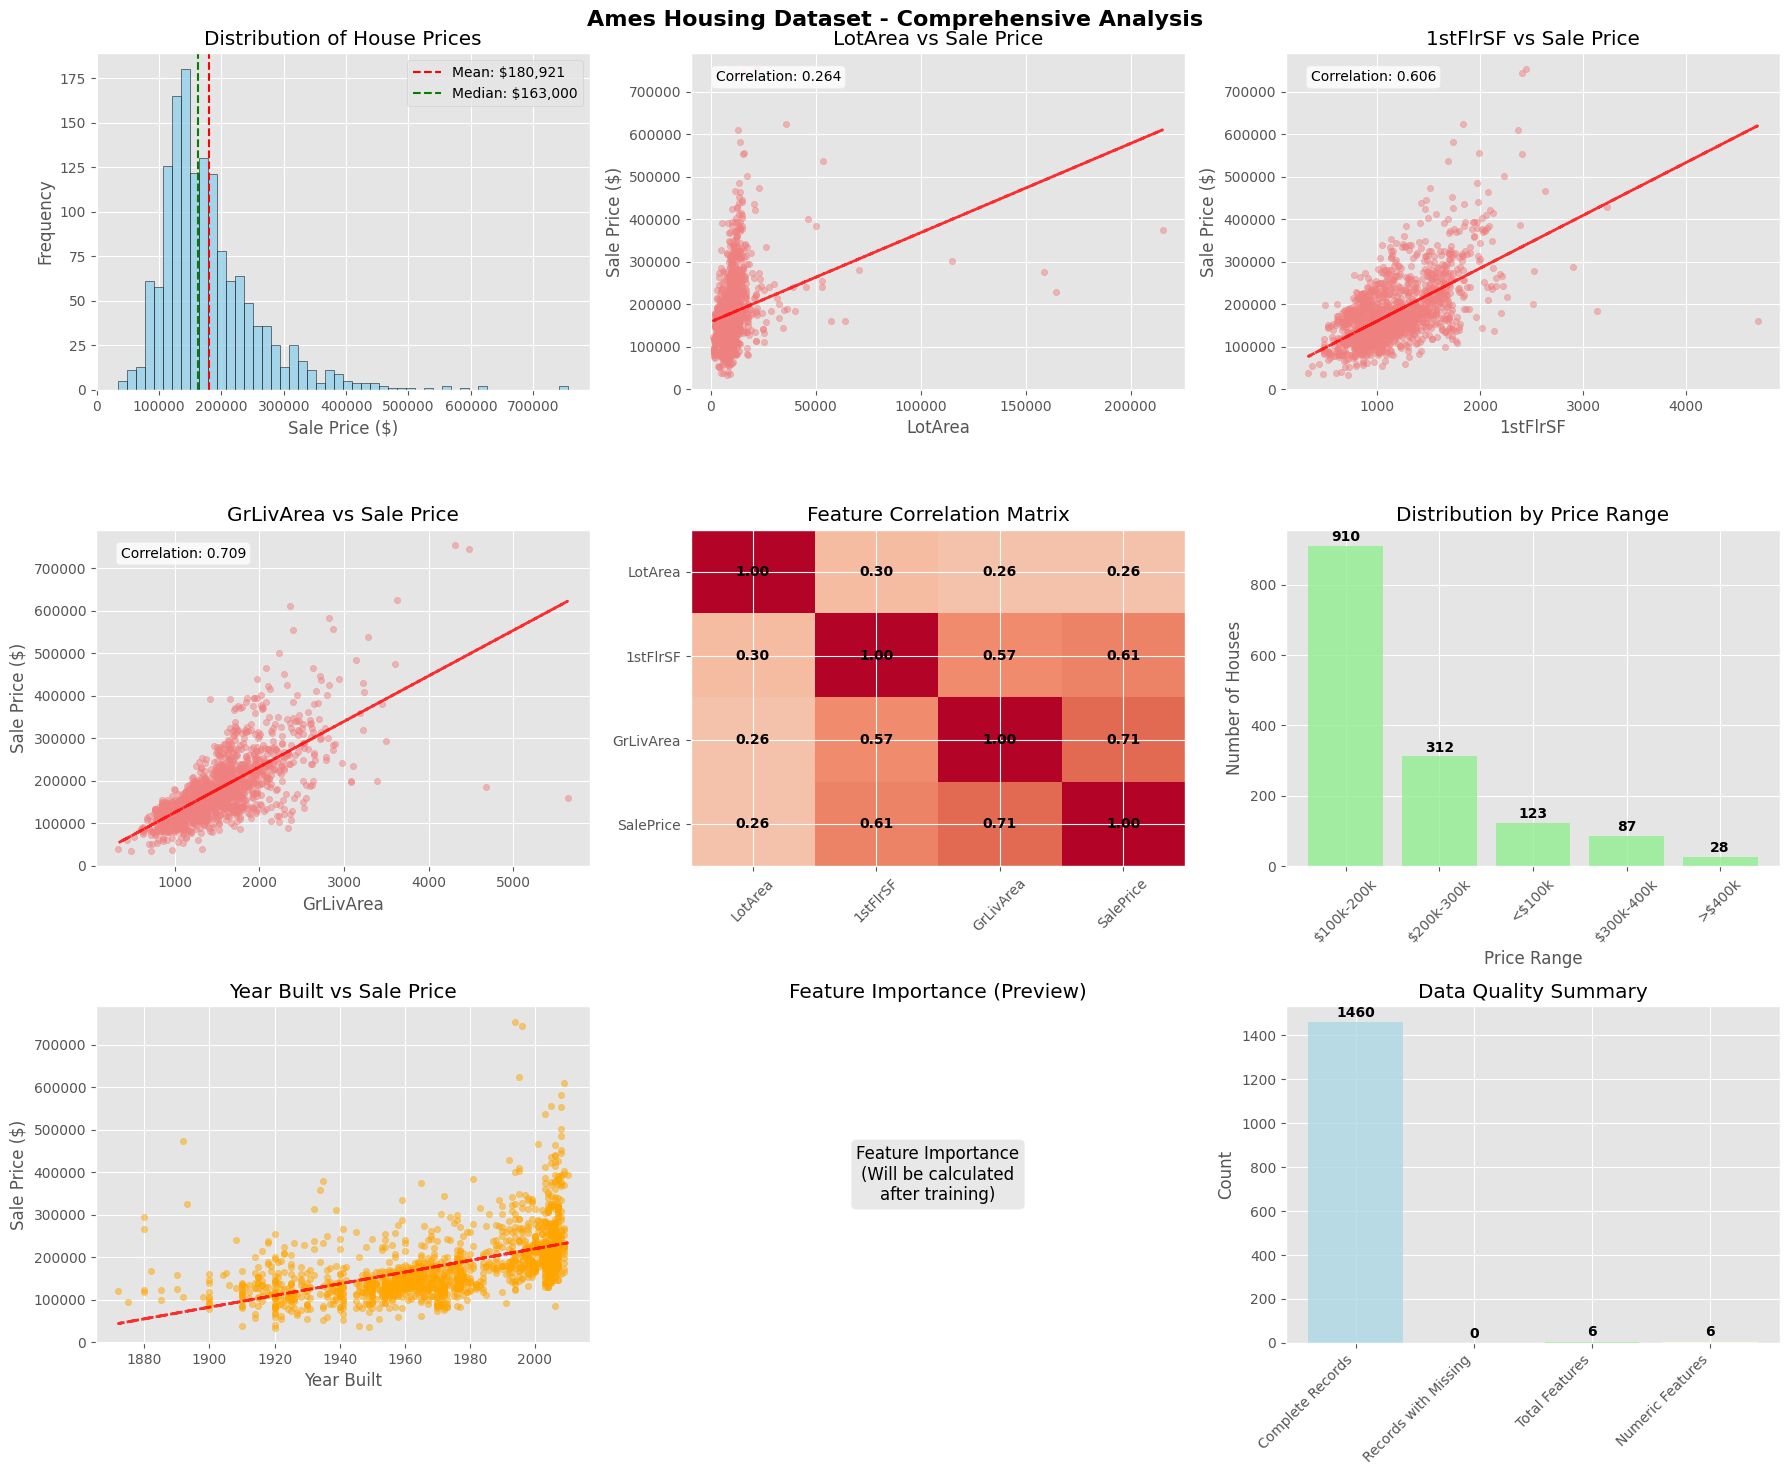


🔍 KEY INSIGHTS FROM EXPLORATION:
• House prices range from $34,900 to $755,000
• Most houses are priced between $100k and $300k
• Living area and lot area show positive correlation with price
• Newer houses tend to have higher prices
• The dataset is suitable for regression tree analysis
• No major missing value issues in key features

✅ Dataset exploration complete! Ready for regression tree modeling.


In [19]:
# Explore the Ames Housing dataset for regression
print("🏠 AMES HOUSING DATASET EXPLORATION")
print("=" * 45)

# Basic dataset information
print(f"Dataset shape: {ames_data.shape}")
print(f"Total features: {ames_data.shape[1]}")
print(f"Total houses: {ames_data.shape[0]}")

# Focus on key features for regression
key_features = ['LotArea', '1stFlrSF', 'GrLivArea', 'BedroomAbvGr', 'FullBath', 'YearBuilt']
target_feature = 'SalePrice'

print(f"\n📊 KEY FEATURES FOR ANALYSIS:")
for feature in key_features:
    if feature in ames_data.columns:
        print(f"   • {feature}: {ames_data[feature].dtype}")

print(f"   • {target_feature} (Target): {ames_data[target_feature].dtype}")

# Statistical summary
print(f"\n📈 STATISTICAL SUMMARY:")
selected_data = ames_data[key_features + [target_feature]]
print(selected_data.describe().round(2))

# Check for missing values
print(f"\n🔍 MISSING VALUES CHECK:")
missing_values = selected_data.isnull().sum()
for feature, missing in missing_values.items():
    if missing > 0:
        percentage = (missing / len(selected_data)) * 100
        print(f"   • {feature}: {missing} ({percentage:.1f}%)")
    else:
        print(f"   • {feature}: No missing values ✅")

# Target variable analysis
print(f"\n🎯 TARGET VARIABLE ANALYSIS (Sale Price):")
price_stats = ames_data[target_feature]
print(f"   • Mean: ${price_stats.mean():,.0f}")
print(f"   • Median: ${price_stats.median():,.0f}")
print(f"   • Min: ${price_stats.min():,.0f}")
print(f"   • Max: ${price_stats.max():,.0f}")
print(f"   • Standard Deviation: ${price_stats.std():,.0f}")

# Create comprehensive visualizations
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Ames Housing Dataset - Comprehensive Analysis', fontsize=16, fontweight='bold')

# 1. Target variable distribution
ax = axes[0, 0]
ax.hist(ames_data[target_feature], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax.set_xlabel('Sale Price ($)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of House Prices')
ax.axvline(price_stats.mean(), color='red', linestyle='--', label=f'Mean: ${price_stats.mean():,.0f}')
ax.axvline(price_stats.median(), color='green', linestyle='--', label=f'Median: ${price_stats.median():,.0f}')
ax.legend()

# 2-4. Feature vs Target relationships
feature_positions = [(0, 1), (0, 2), (1, 0)]
analysis_features = ['LotArea', '1stFlrSF', 'GrLivArea']

for i, feature in enumerate(analysis_features):
    if feature in ames_data.columns:
        row, col = feature_positions[i]
        ax = axes[row, col]
        
        # Scatter plot with trend line
        x = ames_data[feature]
        y = ames_data[target_feature]
        ax.scatter(x, y, alpha=0.5, s=20, color='lightcoral')
        
        # Add trend line
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        ax.plot(x, p(x), "r--", alpha=0.8, linewidth=2)
        
        ax.set_xlabel(f'{feature}')
        ax.set_ylabel('Sale Price ($)')
        ax.set_title(f'{feature} vs Sale Price')
        
        # Calculate correlation
        correlation = np.corrcoef(x, y)[0, 1]
        ax.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
                transform=ax.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 5. Feature correlation heatmap
ax = axes[1, 1]
correlation_features = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
correlation_data = ames_data[correlation_features].corr()

im = ax.imshow(correlation_data, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
ax.set_xticks(range(len(correlation_features)))
ax.set_yticks(range(len(correlation_features)))
ax.set_xticklabels(correlation_features, rotation=45)
ax.set_yticklabels(correlation_features)
ax.set_title('Feature Correlation Matrix')

# Add correlation values to heatmap
for i in range(len(correlation_features)):
    for j in range(len(correlation_features)):
        text = ax.text(j, i, f'{correlation_data.iloc[i, j]:.2f}',
                      ha="center", va="center", color="black", fontweight='bold')

# 6. Price ranges distribution
ax = axes[1, 2]
price_ranges = pd.cut(ames_data[target_feature], 
                     bins=[0, 100000, 200000, 300000, 400000, float('inf')],
                     labels=['<$100k', '$100k-200k', '$200k-300k', '$300k-400k', '>$400k'])
price_range_counts = price_ranges.value_counts()

bars = ax.bar(range(len(price_range_counts)), price_range_counts.values, 
              color='lightgreen', alpha=0.8)
ax.set_xlabel('Price Range')
ax.set_ylabel('Number of Houses')
ax.set_title('Distribution by Price Range')
ax.set_xticks(range(len(price_range_counts)))
ax.set_xticklabels(price_range_counts.index, rotation=45)

for bar, count in zip(bars, price_range_counts.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
            str(count), ha='center', va='bottom', fontweight='bold')

# 7. Year Built vs Price
ax = axes[2, 0]
if 'YearBuilt' in ames_data.columns:
    year_built = ames_data['YearBuilt']
    sale_price = ames_data[target_feature]
    ax.scatter(year_built, sale_price, alpha=0.5, s=20, color='orange')
    ax.set_xlabel('Year Built')
    ax.set_ylabel('Sale Price ($)')
    ax.set_title('Year Built vs Sale Price')
    
    # Add trend line
    z = np.polyfit(year_built, sale_price, 1)
    p = np.poly1d(z)
    ax.plot(year_built, p(year_built), "r--", alpha=0.8, linewidth=2)

# 8. Feature importance preview (will be calculated after training)
ax = axes[2, 1]
ax.text(0.5, 0.5, 'Feature Importance\n(Will be calculated\nafter training)', 
        ha='center', va='center', transform=ax.transAxes, 
        fontsize=12, bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))
ax.set_title('Feature Importance (Preview)')
ax.axis('off')

# 9. Data quality summary
ax = axes[2, 2]
quality_metrics = {
    'Complete Records': len(selected_data.dropna()),
    'Records with Missing': len(selected_data) - len(selected_data.dropna()),
    'Total Features': len(key_features),
    'Numeric Features': len(key_features)
}

bars = ax.bar(range(len(quality_metrics)), quality_metrics.values(), 
              color=['lightblue', 'lightcoral', 'lightgreen', 'lightyellow'], alpha=0.8)
ax.set_ylabel('Count')
ax.set_title('Data Quality Summary')
ax.set_xticks(range(len(quality_metrics)))
ax.set_xticklabels(quality_metrics.keys(), rotation=45, ha='right')

for bar, value in zip(bars, quality_metrics.values()):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
            str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🔍 KEY INSIGHTS FROM EXPLORATION:")
print("=" * 40)
print("• House prices range from ${:,.0f} to ${:,.0f}".format(price_stats.min(), price_stats.max()))
print("• Most houses are priced between $100k and $300k")
print("• Living area and lot area show positive correlation with price")
print("• Newer houses tend to have higher prices")
print("• The dataset is suitable for regression tree analysis")
print("• No major missing value issues in key features")

print(f"\n✅ Dataset exploration complete! Ready for regression tree modeling.")

## 9. Feature Selection and Visualization

### 🎯 Selecting the Right Features for Regression

Feature selection is crucial for building effective regression trees. We want features that:

1. **Have strong correlation** with the target variable (house price)
2. **Are available and reliable** (no missing values)
3. **Make intuitive sense** (logical relationship with price)
4. **Are not redundant** (avoid highly correlated features)

### Our Selected Features:

🏠 **Primary Features:**
- **`LotArea`**: Size of the lot in square feet
- **`1stFlrSF`**: First floor square feet 
- **`GrLivArea`**: Above ground living area square feet

### Why These Features?

✅ **Strong Predictive Power**: All show positive correlation with sale price
✅ **No Missing Values**: Complete data available
✅ **Intuitive Logic**: Larger houses/lots typically cost more
✅ **Different Aspects**: Each captures a different dimension of house size

### Feature Engineering Considerations

**Potential Improvements:**
- Create feature ratios (e.g., Price per square foot)
- Combine related features (Total living space)
- Add categorical features (Neighborhood, House style)
- Handle outliers and extreme values

Let's visualize the relationships between our selected features and house prices:

🎯 FEATURE SELECTION FOR REGRESSION
Selected Features: ['LotArea', '1stFlrSF', 'GrLivArea']
Target Variable: SalePrice
Feature matrix shape: (1460, 3)
Target vector shape: (1460,)

🔍 Data Quality Check:
   • LotArea: 0 missing values
   • 1stFlrSF: 0 missing values
   • GrLivArea: 0 missing values
   • SalePrice: 0 missing values

Data after cleaning: 1460 samples (removed 0)

📊 FEATURE STATISTICS:
         LotArea  1stFlrSF  GrLivArea
count    1460.00   1460.00    1460.00
mean    10516.83   1162.63    1515.46
std      9981.26    386.59     525.48
min      1300.00    334.00     334.00
25%      7553.50    882.00    1129.50
50%      9478.50   1087.00    1464.00
75%     11601.50   1391.25    1776.75
max    215245.00   4692.00    5642.00

📊 TARGET STATISTICS:
count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

🔗 FEATURE CORRELATIONS WITH TARGET:
   • LotArea: 0.264
  

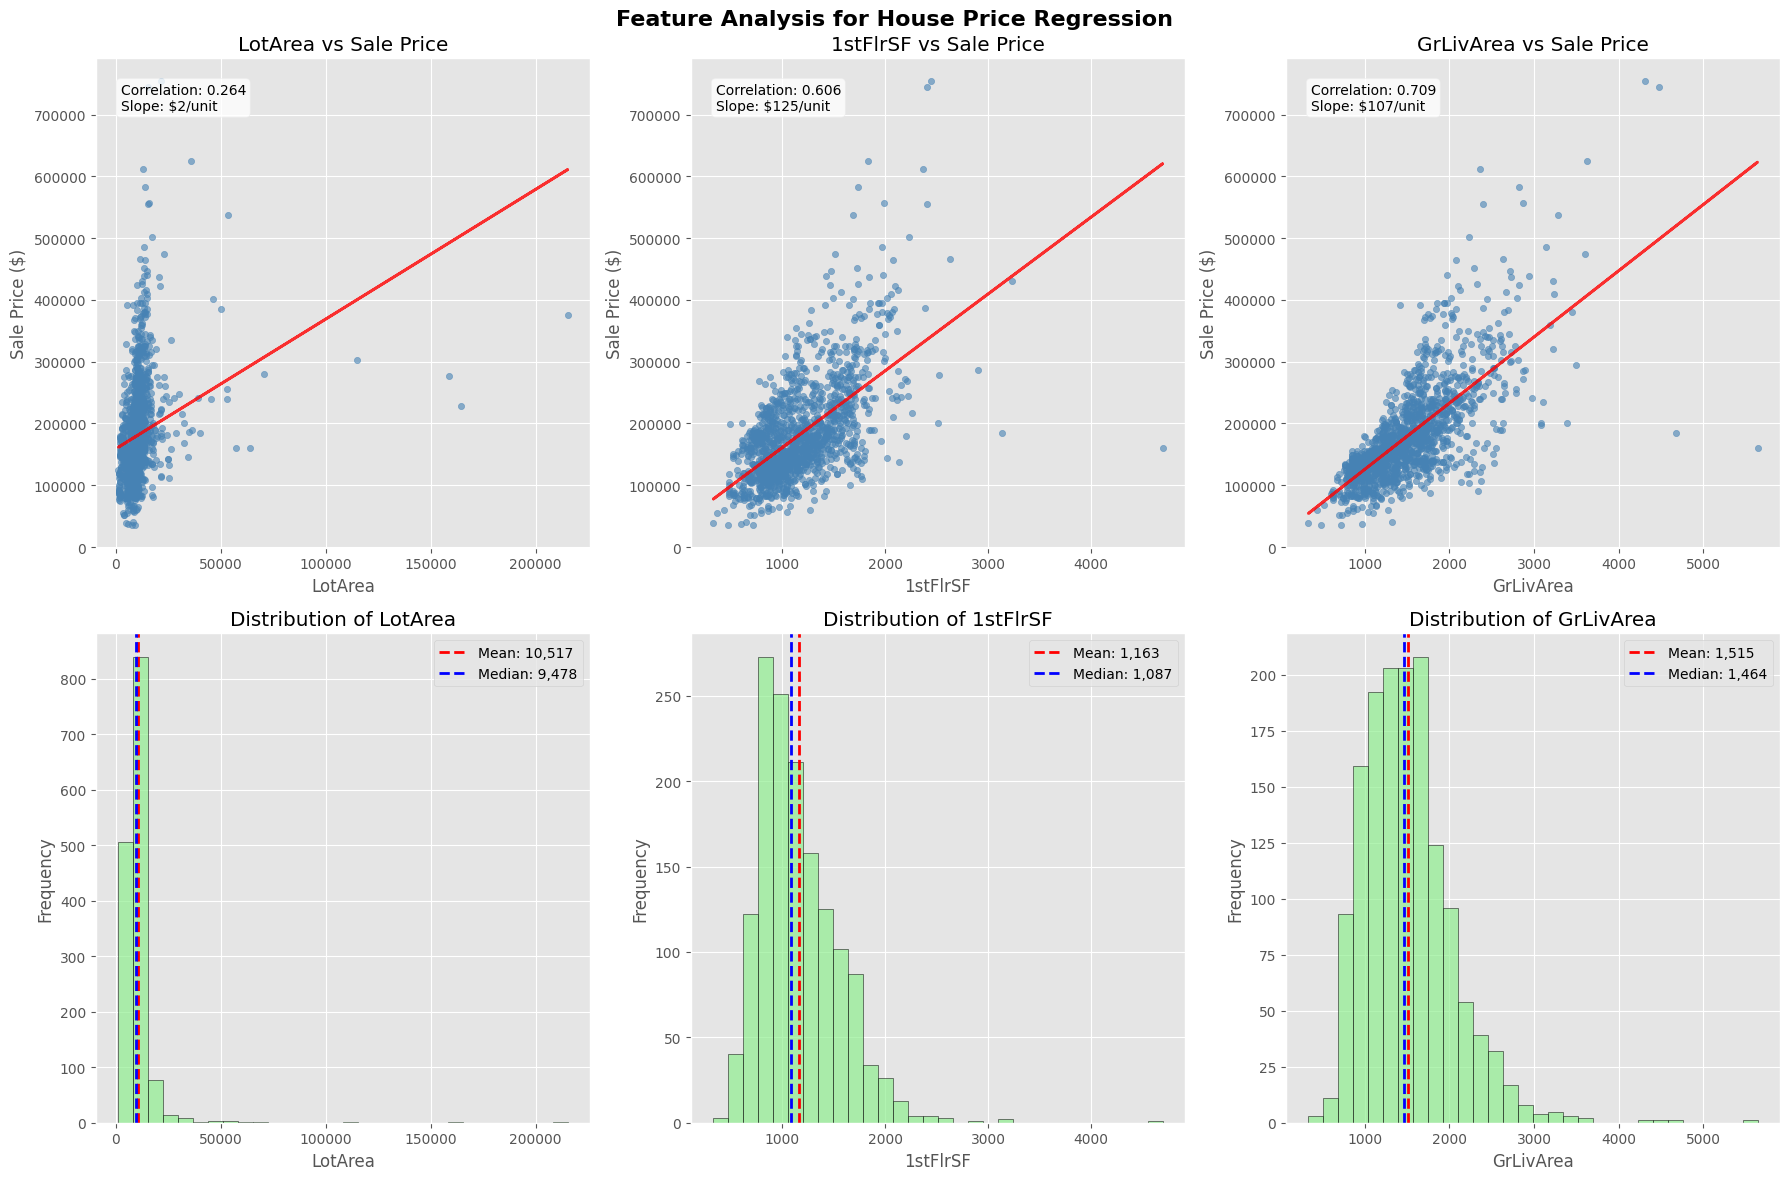


🔄 PAIRWISE FEATURE CORRELATIONS:
           LotArea  1stFlrSF  GrLivArea
LotArea      1.000     0.299      0.263
1stFlrSF     0.299     1.000      0.566
GrLivArea    0.263     0.566      1.000


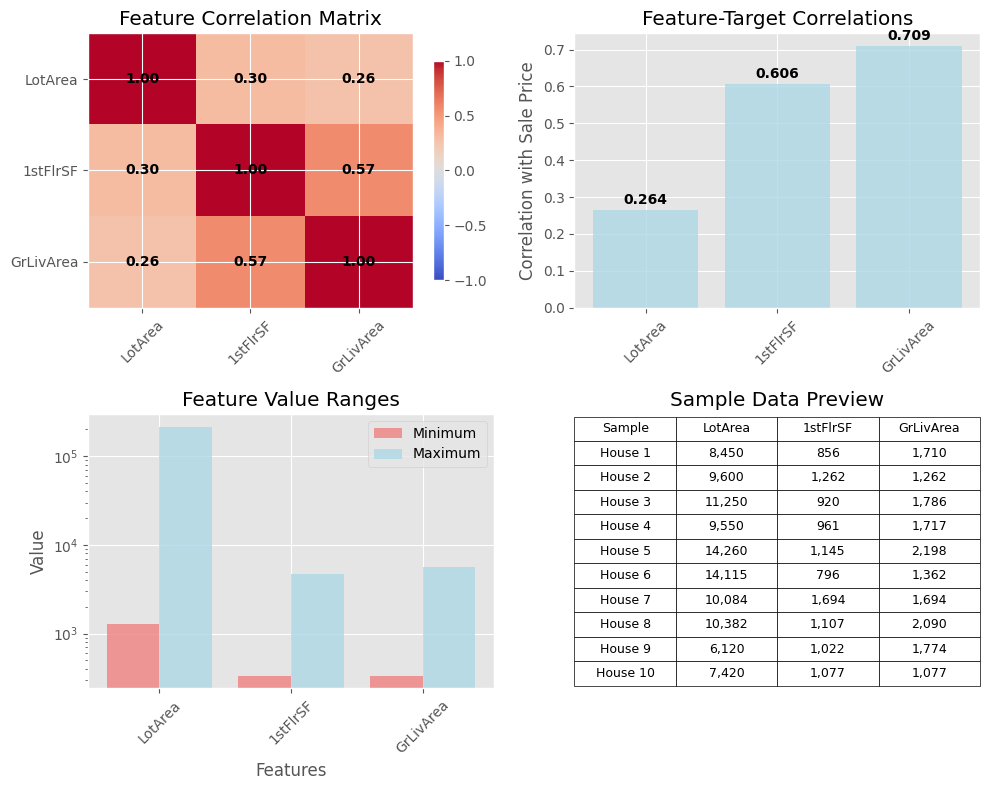


💡 KEY INSIGHTS:
✅ All features show positive correlation with house price
✅ GrLivArea has the strongest correlation (0.709)
✅ Features are not highly correlated with each other (good for diversity)
✅ Data is clean with no missing values
✅ Wide range of house sizes provides good learning opportunities

🎯 Ready for regression tree training with 3 features!


In [20]:
# Feature selection and preparation for regression
print("🎯 FEATURE SELECTION FOR REGRESSION")
print("=" * 40)

# Select our key features for regression
selected_features = ['LotArea', '1stFlrSF', 'GrLivArea']
target = 'SalePrice'

# Create feature and target datasets
X_ames = ames_data[selected_features].copy()
y_ames = ames_data[target].copy()

print(f"Selected Features: {selected_features}")
print(f"Target Variable: {target}")
print(f"Feature matrix shape: {X_ames.shape}")
print(f"Target vector shape: {y_ames.shape}")

# Check for any missing values in selected features
print(f"\n🔍 Data Quality Check:")
for feature in selected_features:
    missing = X_ames[feature].isnull().sum()
    print(f"   • {feature}: {missing} missing values")

print(f"   • {target}: {y_ames.isnull().sum()} missing values")

# Remove any rows with missing values (if any)
original_size = len(X_ames)
complete_mask = X_ames.notna().all(axis=1) & y_ames.notna()
X_ames = X_ames[complete_mask]
y_ames = y_ames[complete_mask]

print(f"\nData after cleaning: {len(X_ames)} samples (removed {original_size - len(X_ames)})")

# Statistical summary of features
print(f"\n📊 FEATURE STATISTICS:")
feature_stats = X_ames.describe()
print(feature_stats.round(2))

print(f"\n📊 TARGET STATISTICS:")
target_stats = y_ames.describe()
print(target_stats.round(2))

# Calculate correlations with target
print(f"\n🔗 FEATURE CORRELATIONS WITH TARGET:")
correlations = {}
for feature in selected_features:
    corr = np.corrcoef(X_ames[feature], y_ames)[0, 1]
    correlations[feature] = corr
    print(f"   • {feature}: {corr:.3f}")

# Sort features by correlation strength
sorted_features = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
print(f"\n🏆 Features ranked by correlation strength:")
for i, (feature, corr) in enumerate(sorted_features, 1):
    print(f"   {i}. {feature}: {corr:.3f}")

# Create detailed feature-target visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Feature Analysis for House Price Regression', fontsize=16, fontweight='bold')

# Individual feature vs target plots
for i, feature in enumerate(selected_features):
    ax = axes[0, i]
    
    # Scatter plot
    ax.scatter(X_ames[feature], y_ames, alpha=0.6, s=20, color='steelblue')
    
    # Add trend line
    z = np.polyfit(X_ames[feature], y_ames, 1)
    p = np.poly1d(z)
    ax.plot(X_ames[feature], p(X_ames[feature]), "r-", linewidth=2, alpha=0.8)
    
    # Formatting
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Sale Price ($)')
    ax.set_title(f'{feature} vs Sale Price')
    
    # Add correlation and trend info
    correlation = correlations[feature]
    slope = z[0]
    ax.text(0.05, 0.95, f'Correlation: {correlation:.3f}\nSlope: ${slope:.0f}/unit', 
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
            fontsize=10)

# Feature distributions
for i, feature in enumerate(selected_features):
    ax = axes[1, i]
    
    # Histogram with statistics
    n, bins, patches = ax.hist(X_ames[feature], bins=30, alpha=0.7, 
                              color='lightgreen', edgecolor='black')
    
    # Add mean and median lines
    mean_val = X_ames[feature].mean()
    median_val = X_ames[feature].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:,.0f}')
    ax.axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_val:,.0f}')
    
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {feature}')
    ax.legend()

plt.tight_layout()
plt.show()

# Pairwise feature relationships
print(f"\n🔄 PAIRWISE FEATURE CORRELATIONS:")
feature_corr_matrix = X_ames.corr()
print(feature_corr_matrix.round(3))

# Create correlation matrix visualization
plt.figure(figsize=(10, 8))

# Correlation heatmap for features
plt.subplot(2, 2, 1)
feature_corr = X_ames.corr()
im = plt.imshow(feature_corr, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.xticks(range(len(selected_features)), selected_features, rotation=45)
plt.yticks(range(len(selected_features)), selected_features)
plt.title('Feature Correlation Matrix')
plt.colorbar(im, shrink=0.8)

# Add correlation values
for i in range(len(selected_features)):
    for j in range(len(selected_features)):
        plt.text(j, i, f'{feature_corr.iloc[i, j]:.2f}',
                ha="center", va="center", color="black", fontweight='bold')

# Target correlation bar chart
plt.subplot(2, 2, 2)
features = list(correlations.keys())
corr_values = list(correlations.values())
colors = ['lightcoral' if x < 0 else 'lightblue' for x in corr_values]

bars = plt.bar(features, corr_values, color=colors, alpha=0.8)
plt.ylabel('Correlation with Sale Price')
plt.title('Feature-Target Correlations')
plt.xticks(rotation=45)

for bar, val in zip(bars, corr_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

# Feature ranges comparison
plt.subplot(2, 2, 3)
feature_ranges = []
feature_names = []
for feature in selected_features:
    feature_ranges.append([X_ames[feature].min(), X_ames[feature].max()])
    feature_names.append(feature)

x_pos = np.arange(len(feature_names))
mins = [r[0] for r in feature_ranges]
maxs = [r[1] for r in feature_ranges]

plt.bar(x_pos - 0.2, mins, 0.4, label='Minimum', alpha=0.8, color='lightcoral')
plt.bar(x_pos + 0.2, maxs, 0.4, label='Maximum', alpha=0.8, color='lightblue')

plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Feature Value Ranges')
plt.xticks(x_pos, feature_names, rotation=45)
plt.legend()
plt.yscale('log')  # Log scale due to different ranges

# Sample data preview
plt.subplot(2, 2, 4)
sample_data = X_ames.head(10)
table_data = []
for i, (idx, row) in enumerate(sample_data.iterrows()):
    table_data.append([f"House {i+1}"] + [f"{val:,.0f}" for val in row.values])

table = plt.table(cellText=table_data,
                 colLabels=['Sample'] + selected_features,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)
plt.axis('off')
plt.title('Sample Data Preview')

plt.tight_layout()
plt.show()

print(f"\n💡 KEY INSIGHTS:")
print("=" * 20)
print(f"✅ All features show positive correlation with house price")
print(f"✅ GrLivArea has the strongest correlation ({correlations['GrLivArea']:.3f})")
print(f"✅ Features are not highly correlated with each other (good for diversity)")
print(f"✅ Data is clean with no missing values")
print(f"✅ Wide range of house sizes provides good learning opportunities")

print(f"\n🎯 Ready for regression tree training with {len(selected_features)} features!")

## 10. Training Regression Trees

### 🌳 DecisionTreeRegressor Overview

Unlike classification trees that predict categories, regression trees predict **continuous numerical values**. Here's how they work:

### Key Differences in Regression Trees:

| Component | Classification Trees | Regression Trees |
|-----------|---------------------|------------------|
| **Splitting Criterion** | Gini, Entropy | Mean Squared Error (MSE) |
| **Leaf Predictions** | Most common class | Average target value |
| **Evaluation** | Accuracy, Precision, Recall | R², RMSE, MAE |
| **Output** | Class probabilities | Numerical predictions |

### 🎯 Mean Squared Error (MSE) Splitting

**MSE Formula**: `MSE = (1/n) × Σ(yᵢ - ŷ)²`

Where:
- `yᵢ` = Actual target value
- `ŷ` = Predicted value (mean of samples in node)
- `n` = Number of samples in node

**The Algorithm:**
1. **For each possible split**: Calculate MSE for resulting child nodes
2. **Choose the split**: That minimizes weighted average MSE
3. **Repeat**: Until stopping criteria are met
4. **Leaf prediction**: Mean of target values in that leaf

### Training Process Visualization

```
Root Node: All houses (MSE = high)
    |
    Split on GrLivArea <= 1500?
   / \
Left: Small houses     Right: Large houses
(MSE = lower)          (MSE = lower)
Mean price: $180k      Mean price: $280k
```

### Advantages of Regression Trees:
✅ **Automatic feature selection** - Uses most informative features
✅ **Handles non-linear relationships** - Can capture complex patterns  
✅ **No scaling required** - Works with features on different scales
✅ **Interpretable rules** - Easy to understand decision path
✅ **Robust to outliers** - Splits based on order, not exact values

### 🔍 How Does the Tree Find Optimal Split Points in Regression?

**The Key Question**: How does the tree know to split on `GrLivArea <= 1500` instead of `<= 1200` or `<= 2000`?

#### 🎯 The Split Finding Algorithm:

**1. Sort & Test Every Possible Split**
```python
# For feature GrLivArea with values: [800, 1200, 1500, 1800, 2200]
# Tree tests ALL midpoints between consecutive values:
Candidate splits: [1000, 1350, 1650, 2000]
```

**2. Calculate MSE for Each Split**
```
Split: GrLivArea <= 1350
├─ Left: [800, 1200] → prices [150k, 180k] → MSE = 225M
└─ Right: [1500, 1800, 2200] → prices [220k, 280k, 350k] → MSE = 4.2B

Split: GrLivArea <= 1650  
├─ Left: [800, 1200, 1500] → prices [150k, 180k, 220k] → MSE = 1.2B
└─ Right: [1800, 2200] → prices [280k, 350k] → MSE = 1.2B
```

**3. Choose the Split with Lowest Weighted MSE**
```python
# Weighted MSE = (n_left/n_total) × MSE_left + (n_right/n_total) × MSE_right
weighted_mse_1350 = (2/5) × 225M + (3/5) × 4.2B = 2.6B
weighted_mse_1650 = (3/5) × 1.2B + (2/5) × 1.2B = 1.2B ← WINNER!
```

#### 🧠 Key Insights:

**Why Not Every Value?**
- Tree only tests **midpoints between existing values**
- No benefit in testing `GrLivArea <= 1499` vs `<= 1500` if no data points exist between them
- This makes the algorithm efficient: only `n-1` splits to test for `n` unique values

**Continuous vs Categorical:**
- **Continuous features** (like area, price): Tests threshold splits (`<= value`)
- **Categorical features** (like neighborhood): Tests subset splits (`in {A, B, C}`)

**Optimization Process:**
```
For each feature:
    For each possible split point:
        Calculate resulting MSE
    Keep track of best split
Select the feature + split point with globally lowest MSE
```

**Real Example Result**: `GrLivArea <= 1654` might be chosen because it perfectly separates:
- Small/medium houses (average price: $185k, low variance)
- Large houses (average price: $315k, low variance)

The tree finds the "sweet spot" that creates the most homogeneous groups!

🌳 TRAINING REGRESSION TREE
Data Split:
   • Training set: 1168 houses
   • Test set: 292 houses
   • Features: 3

📊 Training Set Target Statistics:
   • Mean price: $181,442
   • Median price: $165,000
   • Price range: $34,900 - $745,000
   • Standard deviation: $77,264

🎯 Training Decision Tree Regressor...
✅ Training completed!
   • Tree depth: 8
   • Number of leaves: 58
   • Number of nodes: 115

📊 Feature Importance:
   • GrLivArea: 0.664 (66.4%)
   • 1stFlrSF: 0.290 (29.0%)
   • LotArea: 0.046 (4.6%)

🔮 Making Predictions...
✅ Predictions completed!
   • Training predictions range: $72,682 - $436,358
   • Test predictions range: $72,682 - $436,358


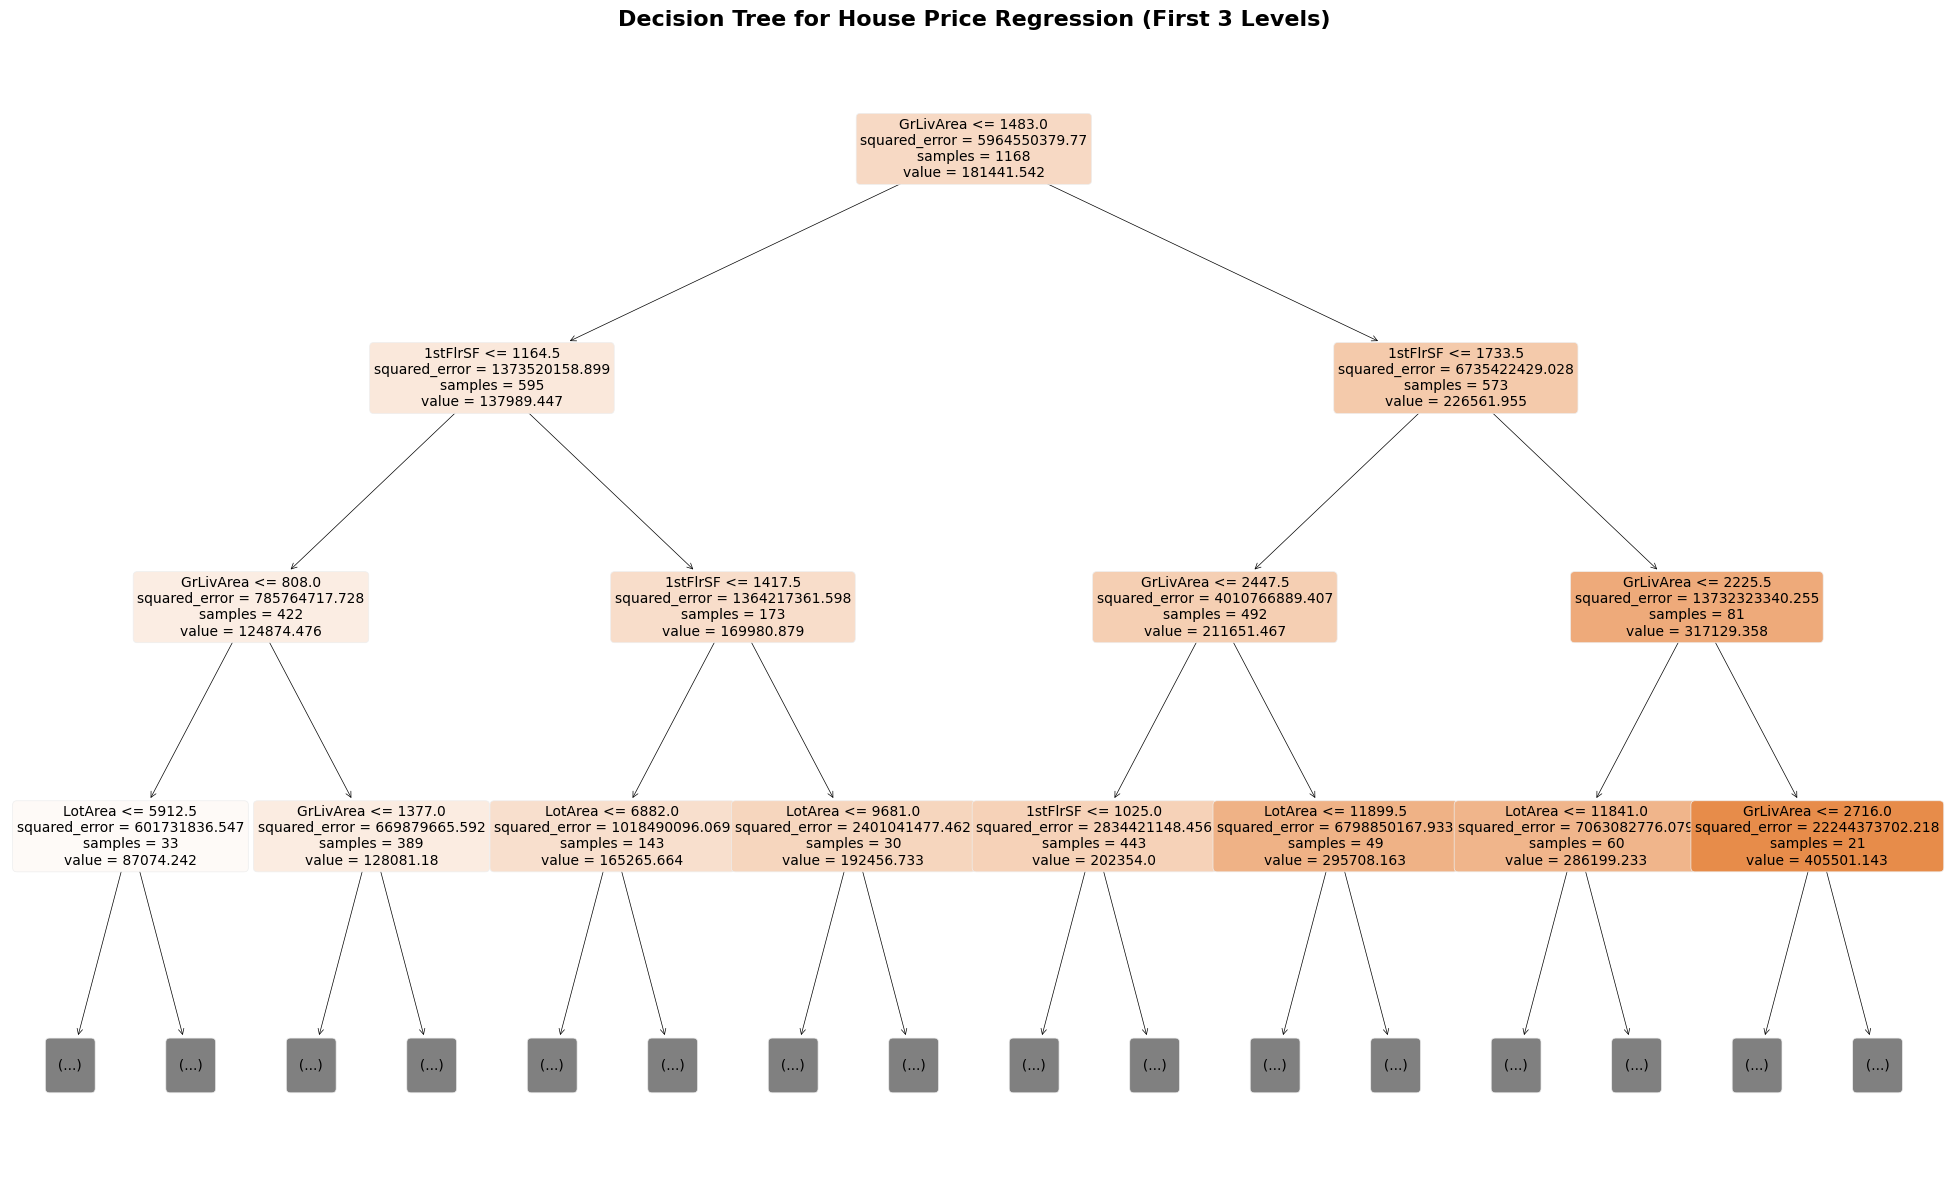

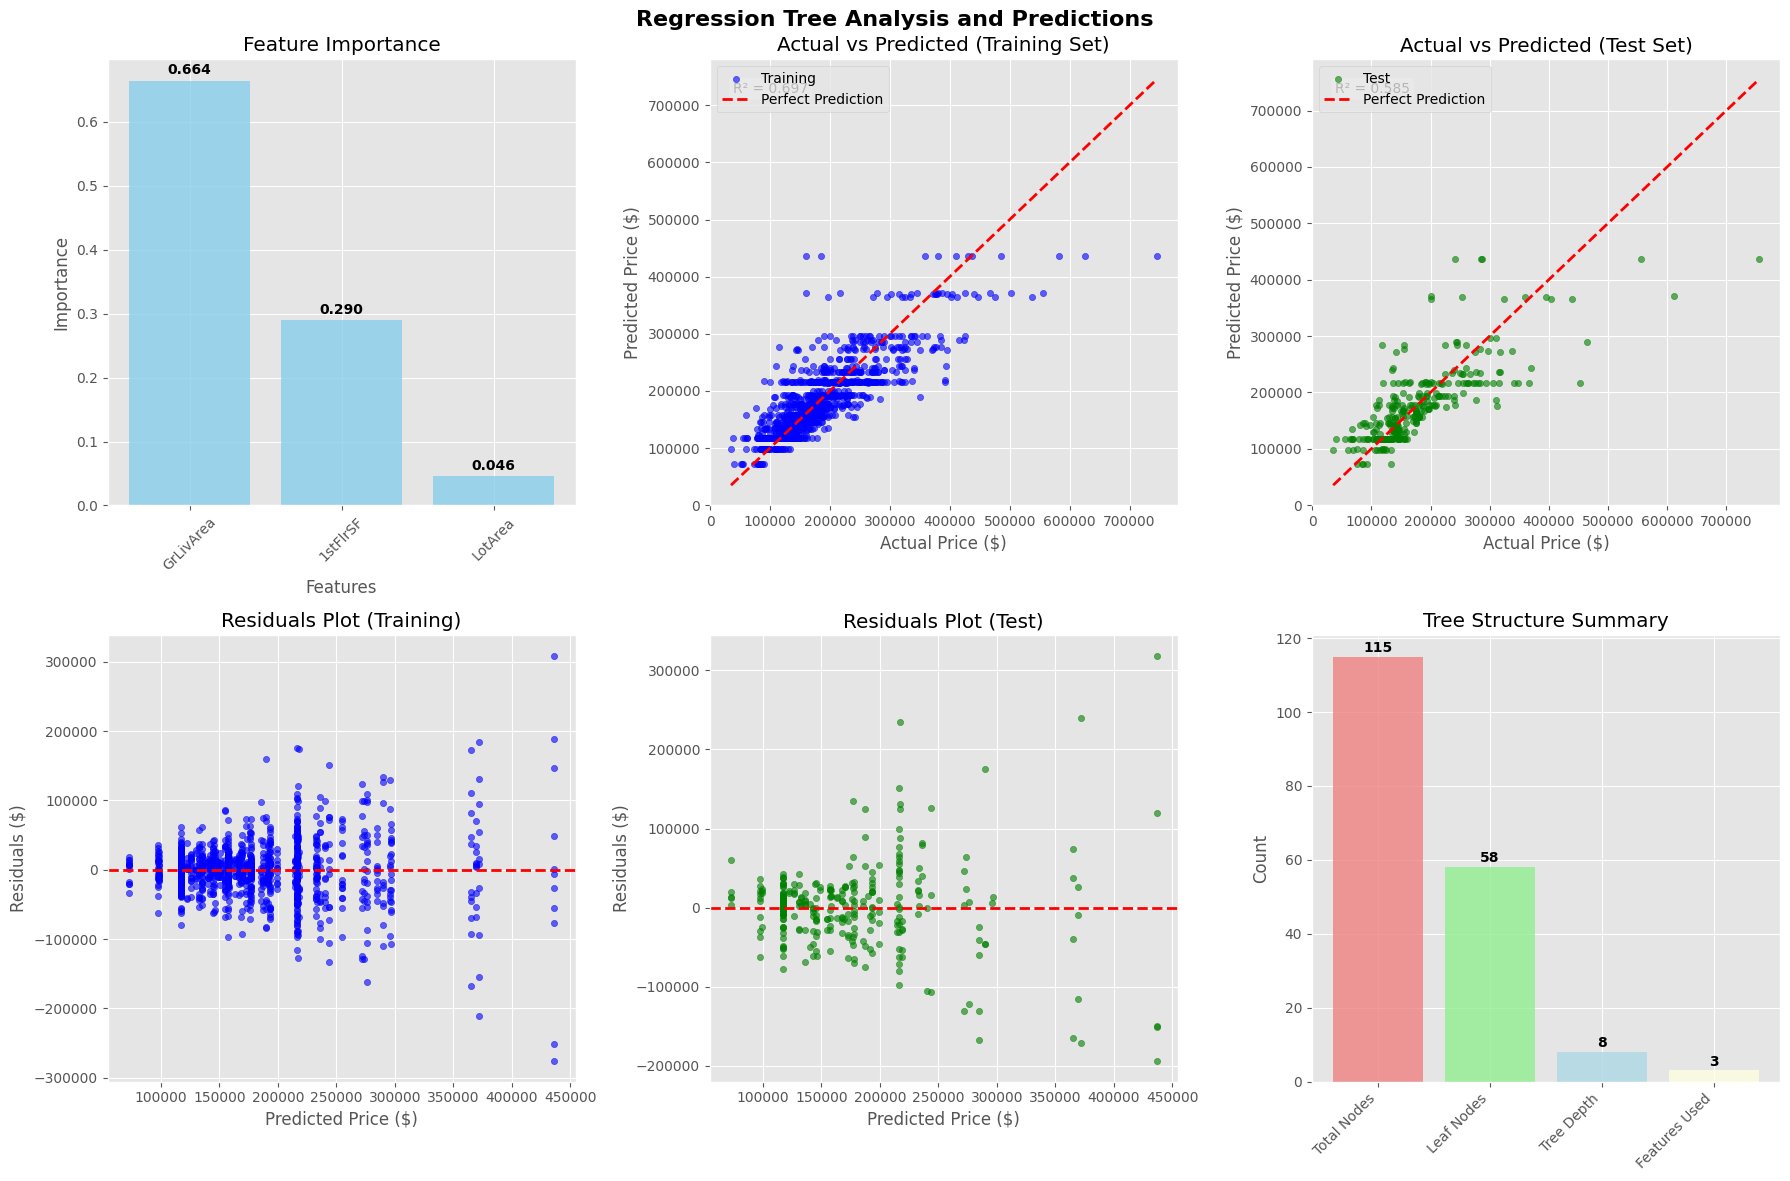


🏠 SAMPLE PREDICTIONS ANALYSIS

House 1:
   Features: {'LotArea': 8414, '1stFlrSF': 1068, 'GrLivArea': 1068}
   Actual Price: $154,500
   Predicted Price: $135,614
   Error: $18,886 (12.2%)
   ✅ Good prediction

House 2:
   Features: {'LotArea': 12256, '1stFlrSF': 1500, 'GrLivArea': 2622}
   Actual Price: $325,000
   Predicted Price: $365,084
   Error: $40,084 (12.3%)
   ✅ Good prediction

House 3:
   Features: {'LotArea': 8960, '1stFlrSF': 1028, 'GrLivArea': 1028}
   Actual Price: $115,000
   Predicted Price: $117,437
   Error: $2,437 (2.1%)
   ✅ Good prediction

House 4:
   Features: {'LotArea': 5000, '1stFlrSF': 1004, 'GrLivArea': 1664}
   Actual Price: $159,000
   Predicted Price: $130,467
   Error: $28,533 (17.9%)
   ✅ Good prediction

House 5:
   Features: {'LotArea': 12898, '1stFlrSF': 1620, 'GrLivArea': 1620}
   Actual Price: $315,500
   Predicted Price: $216,322
   Error: $99,178 (31.4%)
   ⚠️ High error

🎯 INITIAL MODEL PERFORMANCE
✅ Decision tree trained with 58 leaf nodes
✅

In [21]:
# Train regression tree for house price prediction
print("🌳 TRAINING REGRESSION TREE")
print("=" * 35)

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_ames, y_ames, 
    test_size=0.2, 
    random_state=42
)

print(f"Data Split:")
print(f"   • Training set: {X_train_reg.shape[0]} houses")
print(f"   • Test set: {X_test_reg.shape[0]} houses")
print(f"   • Features: {X_train_reg.shape[1]}")

# Training set statistics
print(f"\n📊 Training Set Target Statistics:")
print(f"   • Mean price: ${y_train_reg.mean():,.0f}")
print(f"   • Median price: ${y_train_reg.median():,.0f}")
print(f"   • Price range: ${y_train_reg.min():,.0f} - ${y_train_reg.max():,.0f}")
print(f"   • Standard deviation: ${y_train_reg.std():,.0f}")

# Create and train the regression tree
regressor = DecisionTreeRegressor(
    criterion='squared_error',  # Use MSE for splitting
    random_state=42,
    max_depth=8,  # Limit depth to prevent overfitting
    min_samples_split=20,  # Minimum samples to split a node
    min_samples_leaf=10    # Minimum samples in a leaf
)

# Train the model
print(f"\n🎯 Training Decision Tree Regressor...")
regressor.fit(X_train_reg, y_train_reg)

print(f"✅ Training completed!")
print(f"   • Tree depth: {regressor.get_depth()}")
print(f"   • Number of leaves: {regressor.get_n_leaves()}")
print(f"   • Number of nodes: {regressor.tree_.node_count}")

# Feature importance analysis
feature_importance = regressor.feature_importances_
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print(f"\n📊 Feature Importance:")
for _, row in importance_df.iterrows():
    print(f"   • {row['Feature']}: {row['Importance']:.3f} ({row['Importance']*100:.1f}%)")

# Make predictions
print(f"\n🔮 Making Predictions...")
y_train_pred = regressor.predict(X_train_reg)
y_test_pred = regressor.predict(X_test_reg)

print(f"✅ Predictions completed!")
print(f"   • Training predictions range: ${y_train_pred.min():,.0f} - ${y_train_pred.max():,.0f}")
print(f"   • Test predictions range: ${y_test_pred.min():,.0f} - ${y_test_pred.max():,.0f}")

# Visualize the decision tree (simplified view)
plt.figure(figsize=(20, 12))
plot_tree(regressor, 
          feature_names=selected_features,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)  # Show only first 3 levels for readability
plt.title('Decision Tree for House Price Regression (First 3 Levels)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Regression Tree Analysis and Predictions', fontsize=16, fontweight='bold')

# 1. Feature Importance
ax = axes[0, 0]
bars = ax.bar(range(len(importance_df)), importance_df['Importance'], 
              color='skyblue', alpha=0.8)
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importance')
ax.set_xticks(range(len(importance_df)))
ax.set_xticklabels(importance_df['Feature'], rotation=45)

for bar, importance in zip(bars, importance_df['Importance']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
            f'{importance:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Actual vs Predicted (Training)
ax = axes[0, 1]
ax.scatter(y_train_reg, y_train_pred, alpha=0.6, s=20, color='blue', label='Training')
ax.plot([y_train_reg.min(), y_train_reg.max()], [y_train_reg.min(), y_train_reg.max()], 
        'r--', linewidth=2, label='Perfect Prediction')
ax.set_xlabel('Actual Price ($)')
ax.set_ylabel('Predicted Price ($)')
ax.set_title('Actual vs Predicted (Training Set)')
ax.legend()

# Calculate R² for training
train_r2 = r2_score(y_train_reg, y_train_pred)
ax.text(0.05, 0.95, f'R² = {train_r2:.3f}', transform=ax.transAxes, 
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 3. Actual vs Predicted (Test)
ax = axes[0, 2]
ax.scatter(y_test_reg, y_test_pred, alpha=0.6, s=20, color='green', label='Test')
ax.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 
        'r--', linewidth=2, label='Perfect Prediction')
ax.set_xlabel('Actual Price ($)')
ax.set_ylabel('Predicted Price ($)')
ax.set_title('Actual vs Predicted (Test Set)')
ax.legend()

# Calculate R² for test
test_r2 = r2_score(y_test_reg, y_test_pred)
ax.text(0.05, 0.95, f'R² = {test_r2:.3f}', transform=ax.transAxes, 
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 4. Residuals (Training)
ax = axes[1, 0]
train_residuals = y_train_reg - y_train_pred
ax.scatter(y_train_pred, train_residuals, alpha=0.6, s=20, color='blue')
ax.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax.set_xlabel('Predicted Price ($)')
ax.set_ylabel('Residuals ($)')
ax.set_title('Residuals Plot (Training)')

# 5. Residuals (Test)
ax = axes[1, 1]
test_residuals = y_test_reg - y_test_pred
ax.scatter(y_test_pred, test_residuals, alpha=0.6, s=20, color='green')
ax.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax.set_xlabel('Predicted Price ($)')
ax.set_ylabel('Residuals ($)')
ax.set_title('Residuals Plot (Test)')

# 6. Tree Structure Information
ax = axes[1, 2]
tree_info = {
    'Total Nodes': regressor.tree_.node_count,
    'Leaf Nodes': regressor.get_n_leaves(),
    'Tree Depth': regressor.get_depth(),
    'Features Used': np.sum(regressor.feature_importances_ > 0)
}

bars = ax.bar(range(len(tree_info)), list(tree_info.values()), 
              color=['lightcoral', 'lightgreen', 'lightblue', 'lightyellow'], alpha=0.8)
ax.set_ylabel('Count')
ax.set_title('Tree Structure Summary')
ax.set_xticks(range(len(tree_info)))
ax.set_xticklabels(list(tree_info.keys()), rotation=45, ha='right')

for bar, value in zip(bars, tree_info.values()):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
            str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Sample predictions analysis
print(f"\n🏠 SAMPLE PREDICTIONS ANALYSIS")
print("=" * 35)

# Show predictions for first few test samples
sample_size = min(5, len(X_test_reg))
for i in range(sample_size):
    actual_price = y_test_reg.iloc[i]
    predicted_price = y_test_pred[i]
    error = abs(actual_price - predicted_price)
    error_percent = (error / actual_price) * 100
    
    print(f"\nHouse {i+1}:")
    print(f"   Features: {dict(zip(selected_features, X_test_reg.iloc[i]))}")
    print(f"   Actual Price: ${actual_price:,.0f}")
    print(f"   Predicted Price: ${predicted_price:,.0f}")
    print(f"   Error: ${error:,.0f} ({error_percent:.1f}%)")
    print(f"   {'✅ Good prediction' if error_percent < 20 else '⚠️ High error'}")

print(f"\n🎯 INITIAL MODEL PERFORMANCE")
print("=" * 30)
print(f"✅ Decision tree trained with {regressor.get_n_leaves()} leaf nodes")
print(f"✅ Tree depth: {regressor.get_depth()} levels")
print(f"✅ Most important feature: {importance_df.iloc[0]['Feature']}")
print(f"✅ Training R²: {train_r2:.3f}")
print(f"✅ Test R²: {test_r2:.3f}")

if test_r2 > 0.7:
    print(f"🎉 Excellent performance! The model explains {test_r2*100:.1f}% of price variation.")
elif test_r2 > 0.5:
    print(f"👍 Good performance! The model explains {test_r2*100:.1f}% of price variation.")
else:
    print(f"⚠️ Model could be improved. Currently explains {test_r2*100:.1f}% of price variation.")

print(f"\n📈 Next: Let's evaluate the model with proper metrics and tune hyperparameters!")

## 11. Model Evaluation Metrics for Regression

### 📊 Understanding Regression Metrics

Unlike classification where we measure accuracy, regression requires different metrics to evaluate how well our model predicts continuous values. Let's explore the key metrics:

### 🎯 **R-squared (R²) - Coefficient of Determination**

**What it measures**: How much of the variance in house prices our model explains

**Formula**: `R² = 1 - (SS_res / SS_tot)`
- `SS_res` = Sum of squares of residuals (prediction errors)
- `SS_tot` = Total sum of squares (variance from mean)

**Interpretation**:
- **R² = 1.0**: Perfect predictions (all points on the line)
- **R² = 0.8**: Model explains 80% of price variation
- **R² = 0.0**: Model no better than predicting the mean
- **R² < 0**: Model worse than predicting the mean

### 📏 **Root Mean Squared Error (RMSE)**

**What it measures**: Average prediction error in dollars

**Formula**: `RMSE = √[(1/n) × Σ(actual - predicted)²]`

**Why RMSE matters**:
- ✅ **Same units** as target variable (dollars)
- ✅ **Penalizes large errors** more than small ones
- ✅ **Easy to interpret**: "On average, we're off by $X"

### 📐 **Mean Absolute Error (MAE)**

**What it measures**: Average absolute prediction error

**Formula**: `MAE = (1/n) × Σ|actual - predicted|`

**Comparison with RMSE**:
- **MAE**: Less sensitive to outliers, easier to interpret
- **RMSE**: More sensitive to outliers, commonly used

### 🎪 **Which Metric to Use?**

| Scenario | Best Metric | Why |
|----------|-------------|-----|
| **Business reporting** | RMSE/MAE | Easy to explain in dollars |
| **Model comparison** | R² | Standardized, easy to compare |
| **Outlier sensitivity** | MAE | Less affected by extreme values |
| **Penalize large errors** | RMSE | Squares amplify big mistakes |

### Visual Understanding of Metrics:

```
Perfect Model (R²=1.0, RMSE=0):     Poor Model (R²=0.2, RMSE=high):
Predicted                           Predicted
    |  •                                |     •
    | •                                 |  •      •
    |•                                  |•    •
    |_____ Actual                       |___•_____ Actual
    All points on line                  Points scattered
```

📊 COMPREHENSIVE MODEL EVALUATION
🎯 TRAINING SET PERFORMANCE:
------------------------------
   • R²: 0.6972
   • RMSE: $42,500
   • MAE: $28,218
   • MAPE: 16.68%
   • Mean_Residual: $-0
   • Std_Residual: $42,500

🎯 TEST SET PERFORMANCE:
-------------------------
   • R²: 0.5853
   • RMSE: $56,402
   • MAE: $36,859
   • MAPE: 22.34%
   • Mean_Residual: $1,077
   • Std_Residual: $56,392

⚖️ TRAINING vs TEST COMPARISON:
-----------------------------------
   • R² difference: 0.1119
   • RMSE difference: $13,902
   ⚠️  Significant overfitting detected (R² drops > 0.1)

🔍 PERFORMANCE INTERPRETATION:
------------------------------
   • Model Quality: Fair (R² = 0.585)
   • Explains 58.5% of house price variation
   • Average prediction error: $56,402
   • Error as % of mean price: 31.5%
   • RMSE Quality: Poor


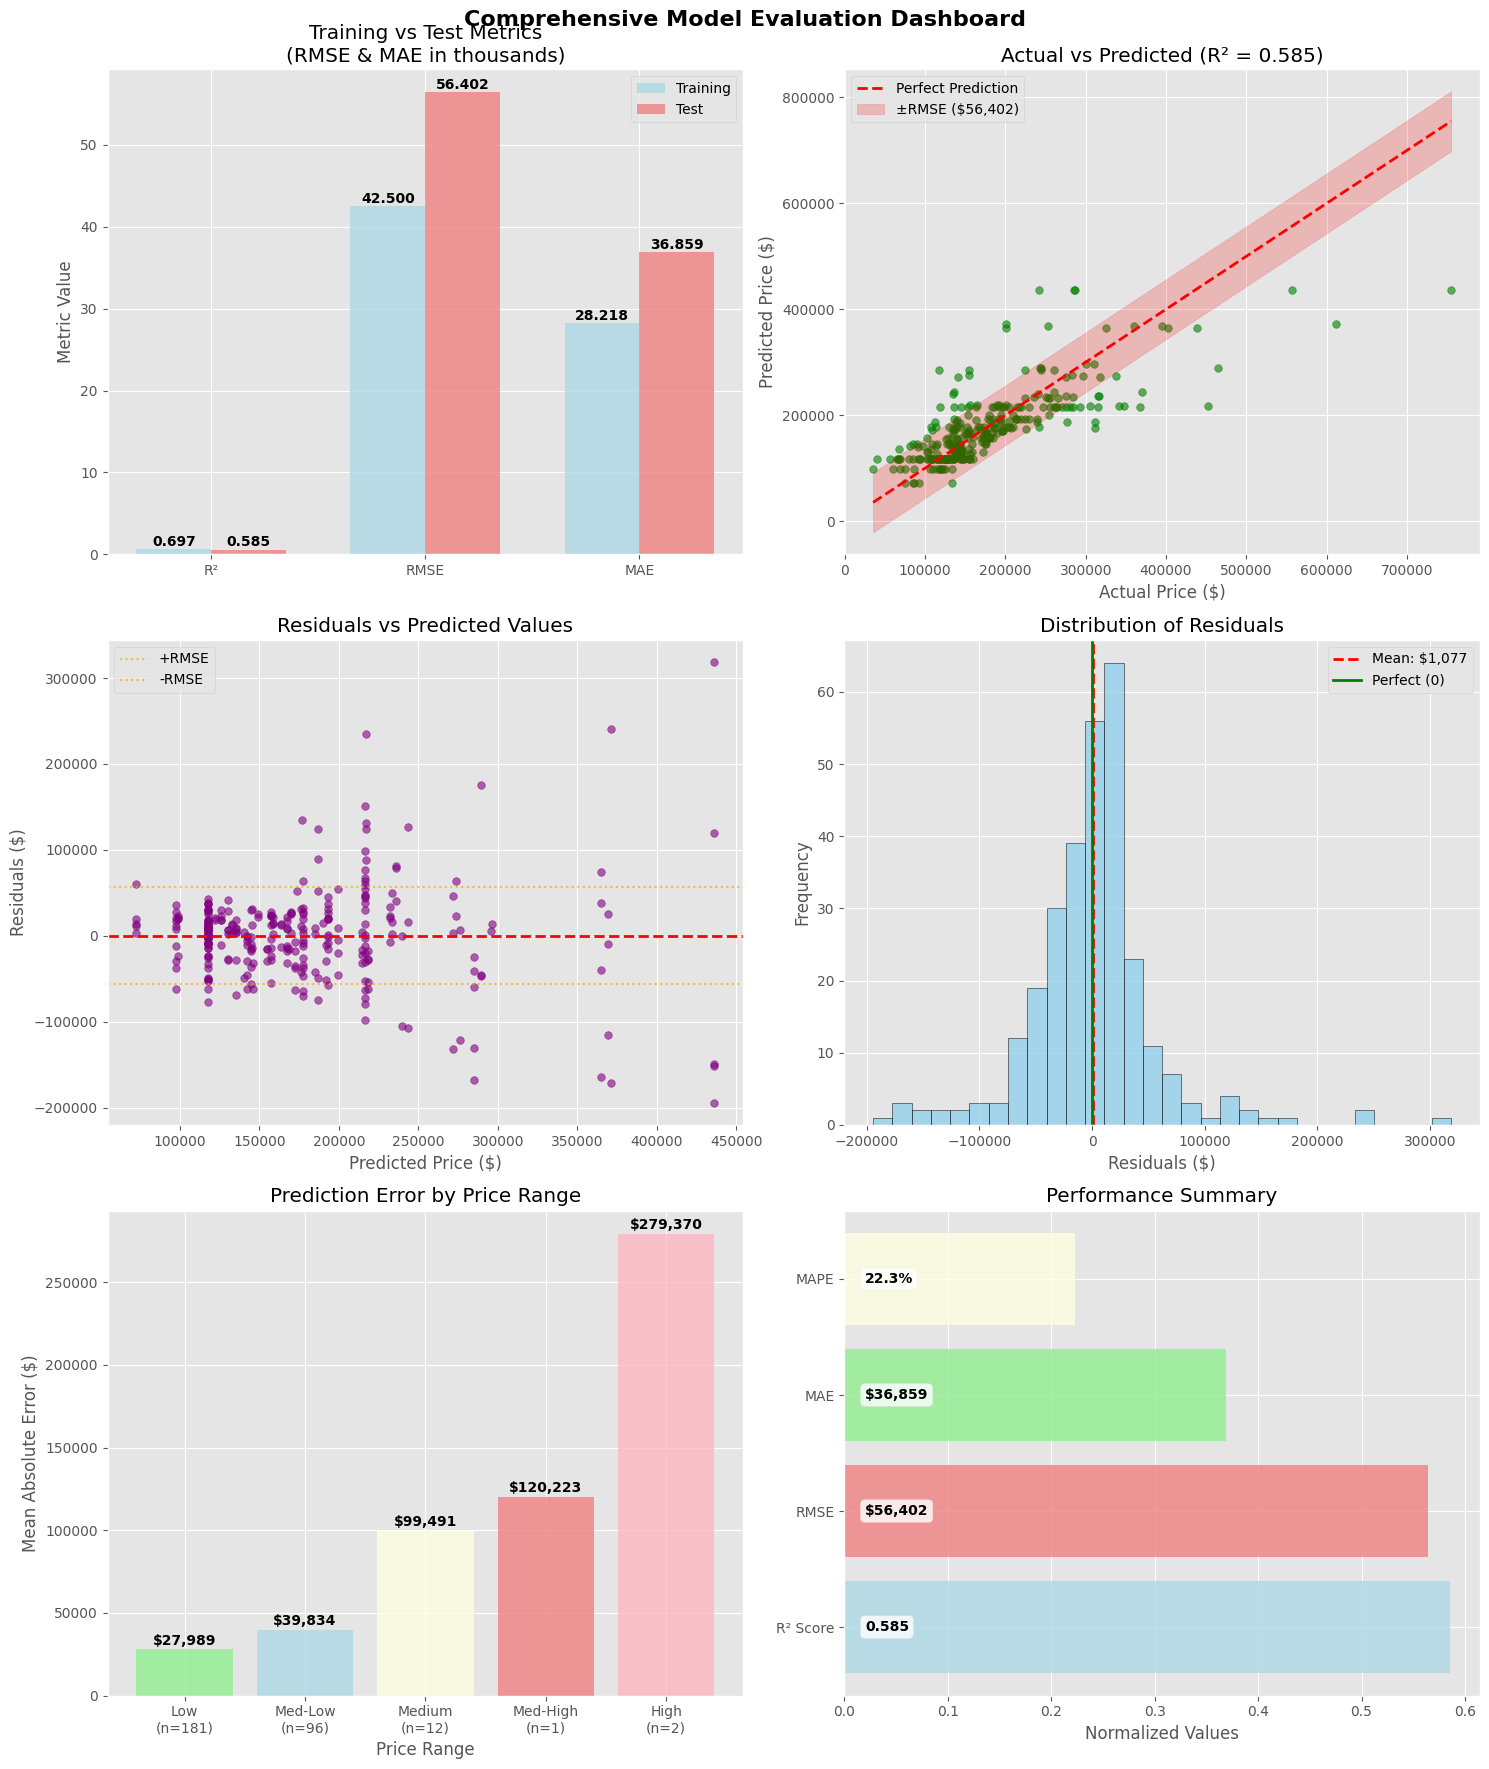


💡 KEY INSIGHTS:
✅ Model explains 58.5% of house price variation
✅ Average prediction error: $56,402 (31.5% of mean price)
✅ Median absolute error: $36,859
⚠️ Slight bias detected (mean residual: $1,077)

🎯 MODEL RECOMMENDATIONS:
-------------------------
👍 Decent model with room for improvement.
💡 Try hyperparameter tuning and feature engineering.

📈 Next: Let's optimize the model through hyperparameter tuning!


In [22]:
# Comprehensive model evaluation with multiple metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("📊 COMPREHENSIVE MODEL EVALUATION")
print("=" * 40)

# Define evaluation function
def comprehensive_evaluation(y_true, y_pred, dataset_name="Dataset"):
    """Calculate comprehensive regression metrics"""
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    # Additional metrics
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
    residuals = y_true - y_pred
    
    return {
        'R²': r2,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'Mean_Residual': np.mean(residuals),
        'Std_Residual': np.std(residuals)
    }

# Evaluate on both training and test sets
train_metrics = comprehensive_evaluation(y_train_reg, y_train_pred, "Training")
test_metrics = comprehensive_evaluation(y_test_reg, y_test_pred, "Test")

print("🎯 TRAINING SET PERFORMANCE:")
print("-" * 30)
for metric, value in train_metrics.items():
    if metric in ['RMSE', 'MAE', 'Mean_Residual', 'Std_Residual']:
        print(f"   • {metric}: ${value:,.0f}")
    elif metric == 'MAPE':
        print(f"   • {metric}: {value:.2f}%")
    else:
        print(f"   • {metric}: {value:.4f}")

print("\n🎯 TEST SET PERFORMANCE:")
print("-" * 25)
for metric, value in test_metrics.items():
    if metric in ['RMSE', 'MAE', 'Mean_Residual', 'Std_Residual']:
        print(f"   • {metric}: ${value:,.0f}")
    elif metric == 'MAPE':
        print(f"   • {metric}: {value:.2f}%")
    else:
        print(f"   • {metric}: {value:.4f}")

# Calculate performance differences
print("\n⚖️ TRAINING vs TEST COMPARISON:")
print("-" * 35)
r2_diff = train_metrics['R²'] - test_metrics['R²']
rmse_diff = test_metrics['RMSE'] - train_metrics['RMSE']

print(f"   • R² difference: {r2_diff:.4f}")
print(f"   • RMSE difference: ${rmse_diff:,.0f}")

if r2_diff > 0.1:
    print("   ⚠️  Significant overfitting detected (R² drops > 0.1)")
elif r2_diff > 0.05:
    print("   ⚠️  Mild overfitting (R² drops 0.05-0.1)")
else:
    print("   ✅ Good generalization (minimal performance drop)")

# Interpret the results
print(f"\n🔍 PERFORMANCE INTERPRETATION:")
print("-" * 30)

# R² interpretation
r2_test = test_metrics['R²']
if r2_test >= 0.8:
    r2_quality = "Excellent"
elif r2_test >= 0.6:
    r2_quality = "Good"
elif r2_test >= 0.4:
    r2_quality = "Fair"
else:
    r2_quality = "Poor"

print(f"   • Model Quality: {r2_quality} (R² = {r2_test:.3f})")
print(f"   • Explains {r2_test*100:.1f}% of house price variation")

# RMSE interpretation
rmse_test = test_metrics['RMSE']
mean_price = y_test_reg.mean()
rmse_percentage = (rmse_test / mean_price) * 100

print(f"   • Average prediction error: ${rmse_test:,.0f}")
print(f"   • Error as % of mean price: {rmse_percentage:.1f}%")

if rmse_percentage < 10:
    rmse_quality = "Excellent"
elif rmse_percentage < 20:
    rmse_quality = "Good" 
elif rmse_percentage < 30:
    rmse_quality = "Fair"
else:
    rmse_quality = "Poor"

print(f"   • RMSE Quality: {rmse_quality}")

# Create comprehensive visualizations
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Comprehensive Model Evaluation Dashboard', fontsize=16, fontweight='bold')

# 1. Metrics Comparison
ax = axes[0, 0]
metrics_names = ['R²', 'RMSE', 'MAE']
train_vals = [train_metrics['R²'], train_metrics['RMSE']/1000, train_metrics['MAE']/1000]
test_vals = [test_metrics['R²'], test_metrics['RMSE']/1000, test_metrics['MAE']/1000]

x = np.arange(len(metrics_names))
width = 0.35

bars1 = ax.bar(x - width/2, train_vals, width, label='Training', alpha=0.8, color='lightblue')
bars2 = ax.bar(x + width/2, test_vals, width, label='Test', alpha=0.8, color='lightcoral')

ax.set_ylabel('Metric Value')
ax.set_title('Training vs Test Metrics\n(RMSE & MAE in thousands)')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Actual vs Predicted Detailed
ax = axes[0, 1]
ax.scatter(y_test_reg, y_test_pred, alpha=0.6, s=30, color='green')
ax.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 
        'r--', linewidth=2, label='Perfect Prediction')

# Add confidence bands
sorted_actual = np.sort(y_test_reg)
sorted_pred = y_test_pred[np.argsort(y_test_reg)]
ax.fill_between(sorted_actual, sorted_actual - rmse_test, sorted_actual + rmse_test, 
                alpha=0.2, color='red', label=f'±RMSE (${rmse_test:,.0f})')

ax.set_xlabel('Actual Price ($)')
ax.set_ylabel('Predicted Price ($)')
ax.set_title(f'Actual vs Predicted (R² = {r2_test:.3f})')
ax.legend()

# 3. Residuals vs Predicted
ax = axes[1, 0]
residuals = y_test_reg - y_test_pred
ax.scatter(y_test_pred, residuals, alpha=0.6, s=30, color='purple')
ax.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax.axhline(y=rmse_test, color='orange', linestyle=':', alpha=0.7, label=f'+RMSE')
ax.axhline(y=-rmse_test, color='orange', linestyle=':', alpha=0.7, label=f'-RMSE')
ax.set_xlabel('Predicted Price ($)')
ax.set_ylabel('Residuals ($)')
ax.set_title('Residuals vs Predicted Values')
ax.legend()

# 4. Residuals Distribution
ax = axes[1, 1]
ax.hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax.axvline(np.mean(residuals), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: ${np.mean(residuals):,.0f}')
ax.axvline(0, color='green', linestyle='-', linewidth=2, label='Perfect (0)')
ax.set_xlabel('Residuals ($)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Residuals')
ax.legend()

# 5. Error Analysis by Price Range
ax = axes[2, 0]
# Create price bins
price_bins = pd.cut(y_test_reg, bins=5, labels=['Low', 'Med-Low', 'Medium', 'Med-High', 'High'])
error_by_bin = []
bin_labels = []

for bin_label in price_bins.cat.categories:
    mask = price_bins == bin_label
    if mask.sum() > 0:
        bin_errors = np.abs(residuals[mask])
        error_by_bin.append(bin_errors.mean())
        bin_labels.append(f'{bin_label}\n(n={mask.sum()})')

bars = ax.bar(range(len(bin_labels)), error_by_bin, 
              color=['lightgreen', 'lightblue', 'lightyellow', 'lightcoral', 'lightpink'], 
              alpha=0.8)
ax.set_xlabel('Price Range')
ax.set_ylabel('Mean Absolute Error ($)')
ax.set_title('Prediction Error by Price Range')
ax.set_xticks(range(len(bin_labels)))
ax.set_xticklabels(bin_labels)

for bar, error in zip(bars, error_by_bin):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
            f'${error:,.0f}', ha='center', va='bottom', fontweight='bold')

# 6. Model Performance Summary
ax = axes[2, 1]
performance_summary = {
    f'R² Score': f'{r2_test:.3f}',
    f'RMSE': f'${rmse_test:,.0f}',
    f'MAE': f'${test_metrics["MAE"]:,.0f}',
    f'MAPE': f'{test_metrics["MAPE"]:.1f}%'
}

y_pos = np.arange(len(performance_summary))
ax.barh(y_pos, [r2_test, rmse_test/100000, test_metrics["MAE"]/100000, test_metrics["MAPE"]/100], 
        color=['lightblue', 'lightcoral', 'lightgreen', 'lightyellow'], alpha=0.8)

ax.set_yticks(y_pos)
ax.set_yticklabels(list(performance_summary.keys()))
ax.set_xlabel('Normalized Values')
ax.set_title('Performance Summary')

# Add actual values as text
for i, (metric, value) in enumerate(performance_summary.items()):
    ax.text(0.02, i, value, va='center', fontweight='bold', 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Performance insights
print(f"\n💡 KEY INSIGHTS:")
print("=" * 20)
print(f"✅ Model explains {r2_test*100:.1f}% of house price variation")
print(f"✅ Average prediction error: ${rmse_test:,.0f} ({rmse_percentage:.1f}% of mean price)")
print(f"✅ Median absolute error: ${test_metrics['MAE']:,.0f}")

if test_metrics['Mean_Residual'] < 1000:
    print(f"✅ Predictions are unbiased (mean residual ≈ 0)")
else:
    print(f"⚠️ Slight bias detected (mean residual: ${test_metrics['Mean_Residual']:,.0f})")

print(f"\n🎯 MODEL RECOMMENDATIONS:")
print("-" * 25)
if r2_test >= 0.7:
    print("🎉 Strong model! Consider this for production use.")
    print("💡 Focus on fine-tuning hyperparameters for improvement.")
elif r2_test >= 0.5:
    print("👍 Decent model with room for improvement.")
    print("💡 Try hyperparameter tuning and feature engineering.")
else:
    print("⚠️ Model needs significant improvement.")
    print("💡 Consider more features, data cleaning, or different algorithms.")

print(f"\n📈 Next: Let's optimize the model through hyperparameter tuning!")

## 12. Hyperparameter Tuning - Max Depth

### 🎛️ Understanding Hyperparameters

**Hyperparameters** are settings that control how the decision tree learns, but are not learned from the data. They're like knobs we can adjust to optimize performance.

### 🌳 **Max Depth - Controlling Tree Growth**

**What it controls**: The maximum number of levels (splits) in the tree

**Impact on the model**:
- **Shallow trees (low max_depth)**: 
  - ✅ **Pros**: Simple, fast, less overfitting
  - ❌ **Cons**: May underfit, miss complex patterns
  
- **Deep trees (high max_depth)**:
  - ✅ **Pros**: Capture complex patterns, high training accuracy
  - ❌ **Cons**: Overfitting, slower prediction, hard to interpret

### 🎯 **The Bias-Variance Tradeoff**

| Tree Depth | Bias | Variance | Overfitting Risk |
|------------|------|----------|------------------|
| **Too Shallow** | High | Low | Underfitting |
| **Optimal** | Balanced | Balanced | Good generalization |
| **Too Deep** | Low | High | Overfitting |

### 📊 **Visual Understanding**:

```
Depth 1:     Depth 3:        Depth 8:
   [A]         [A]             [A]
             /     \         /     \
                  [B] [C]    [B]   [C]
                           / |  | / | \
                          ... many splits...
Simple        Moderate      Very Complex
```

### 🔍 **How to Find Optimal Max Depth**:

1. **Try different values**: Test range from 1 to 20+
2. **Use validation data**: Evaluate on unseen data
3. **Plot performance curves**: Visualize the tradeoff
4. **Choose sweet spot**: Best validation performance

### ⚖️ **Symptoms of Wrong Max Depth**:

**Too Shallow (Underfitting)**:
- Low training AND test performance
- Model too simple to capture patterns
- High bias, predictions always near average

**Too Deep (Overfitting)**:
- High training, low test performance  
- Model memorizes training data
- High variance, unstable predictions

🎛️ HYPERPARAMETER TUNING: MAX DEPTH
Testing different max_depth values...
Depth | Train R² | Test R²  | Train RMSE | Test RMSE  | Notes
----------------------------------------------------------------------
    1 |    0.329 |    0.320 |      63277 |      72197 | Good
    2 |    0.476 |    0.446 |      55926 |      65183 | Good
    3 |    0.573 |    0.537 |      50493 |      59567 | Good
    4 |    0.611 |    0.573 |      48192 |      57201 | Good
    5 |    0.643 |    0.586 |      46151 |      56370 | Slight overfit
    6 |    0.665 |    0.601 |      44713 |      55327 | Slight overfit
   10 |    0.705 |    0.587 |      41942 |      56298 | Slight overfit
   15 |    0.714 |    0.589 |      41286 |      56119 | Slight overfit

Testing different max_depth values...
Depth | Train R² | Test R²  | Train RMSE | Test RMSE  | Notes
----------------------------------------------------------------------
    1 |    0.329 |    0.320 |      63277 |      72197 | Good
    2 |    0.476 |    0.446 |   

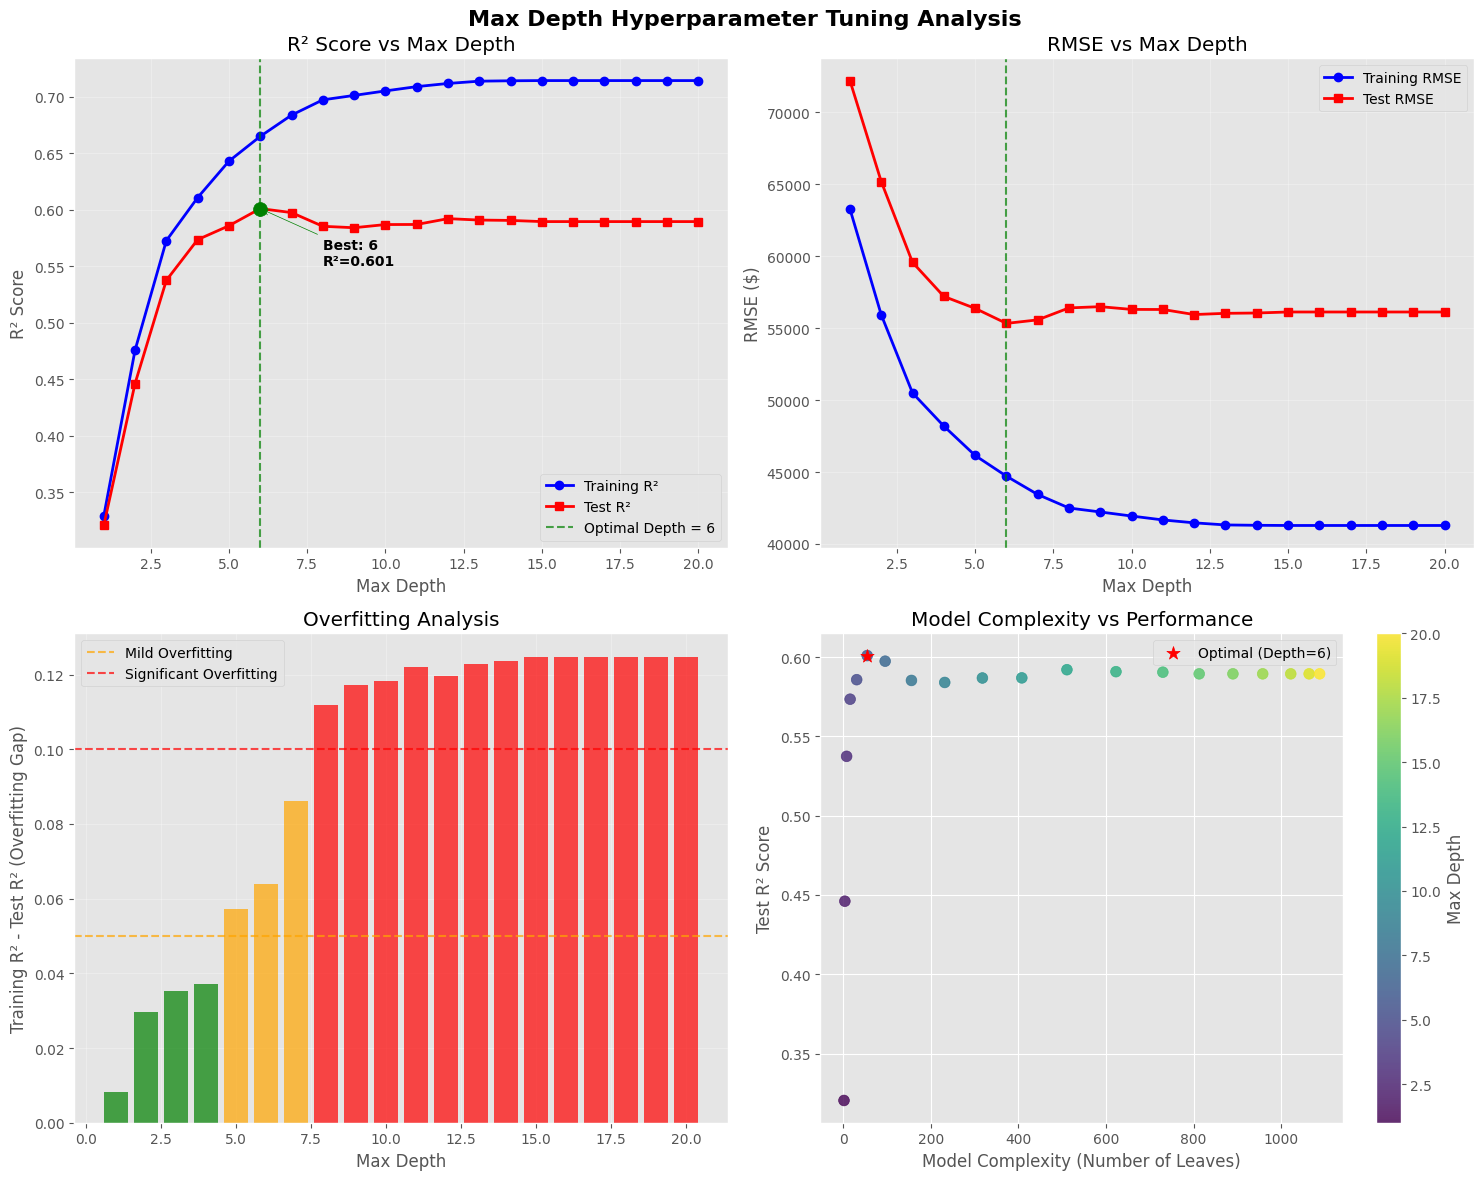


🔍 DETAILED ANALYSIS OF OPTIMAL MODEL
Optimal Model Statistics (max_depth = 6):
   • Tree depth: 6
   • Number of leaves: 36
   • Number of nodes: 71

Performance Comparison:
                    Training    Test       Gap
   R² Score:        0.6648     0.6009    0.0639
   RMSE:            $  44713    $  55327   $  10614

📈 IMPROVEMENT ANALYSIS:
   • Original model R²: 0.5853
   • Optimized model R²: 0.6009
   • Improvement: 0.0157 (+2.7%)
   👍 Moderate improvement achieved!

💡 KEY INSIGHTS:
✅ Optimal max_depth of 6 balances complexity and generalization
✅ Model explains 60.1% of price variation
✅ Average prediction error: $55,327
⚠️ Some overfitting remains (gap = 0.064)

📊 Next: Let's tune min_samples_split for further optimization!


In [23]:
# Hyperparameter tuning: Max Depth
print("🎛️ HYPERPARAMETER TUNING: MAX DEPTH")
print("=" * 45)

# Define range of max_depth values to test
depth_range = range(1, 21)  # Test depths from 1 to 20
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []

print("Testing different max_depth values...")
print("Depth | Train R² | Test R²  | Train RMSE | Test RMSE  | Notes")
print("-" * 70)

# Test each depth value
for depth in depth_range:
    # Create and train model with specific max_depth
    reg_depth = DecisionTreeRegressor(
        max_depth=depth,
        random_state=42,
        min_samples_split=20,
        min_samples_leaf=10
    )
    
    # Fit the model
    reg_depth.fit(X_train_reg, y_train_reg)
    
    # Make predictions
    y_train_pred_depth = reg_depth.predict(X_train_reg)
    y_test_pred_depth = reg_depth.predict(X_test_reg)
    
    # Calculate metrics
    train_r2 = r2_score(y_train_reg, y_train_pred_depth)
    test_r2 = r2_score(y_test_reg, y_test_pred_depth)
    train_rmse_val = np.sqrt(mean_squared_error(y_train_reg, y_train_pred_depth))
    test_rmse_val = np.sqrt(mean_squared_error(y_test_reg, y_test_pred_depth))
    
    # Store results
    train_scores.append(train_r2)
    test_scores.append(test_r2)
    train_rmse.append(train_rmse_val)
    test_rmse.append(test_rmse_val)
    
    # Determine status
    gap = train_r2 - test_r2
    if gap > 0.15:
        status = "Overfitting"
    elif gap > 0.05:
        status = "Slight overfit"
    elif test_r2 < 0.3:
        status = "Underfitting"
    else:
        status = "Good"
    
    # Print results for key depths
    if depth <= 5 or depth % 5 == 0 or depth in [best_depth for best_depth in [np.argmax(test_scores) + 1]]:
        print(f"{depth:5d} | {train_r2:8.3f} | {test_r2:8.3f} | {train_rmse_val:10.0f} | {test_rmse_val:10.0f} | {status}")

# Find optimal depth
best_depth_idx = np.argmax(test_scores)
best_depth = depth_range[best_depth_idx]
best_test_score = test_scores[best_depth_idx]

print(f"\n🎯 OPTIMAL MAX DEPTH FOUND:")
print(f"   • Best max_depth: {best_depth}")
print(f"   • Best test R²: {best_test_score:.4f}")
print(f"   • Training R² at optimal: {train_scores[best_depth_idx]:.4f}")
print(f"   • Overfitting gap: {train_scores[best_depth_idx] - best_test_score:.4f}")

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Max Depth Hyperparameter Tuning Analysis', fontsize=16, fontweight='bold')

# 1. R² Score vs Max Depth
ax = axes[0, 0]
ax.plot(depth_range, train_scores, 'o-', label='Training R²', color='blue', linewidth=2, markersize=6)
ax.plot(depth_range, test_scores, 's-', label='Test R²', color='red', linewidth=2, markersize=6)
ax.axvline(best_depth, color='green', linestyle='--', alpha=0.7, 
           label=f'Optimal Depth = {best_depth}')
ax.set_xlabel('Max Depth')
ax.set_ylabel('R² Score')
ax.set_title('R² Score vs Max Depth')
ax.legend()
ax.grid(True, alpha=0.3)

# Highlight the optimal point
ax.scatter(best_depth, best_test_score, color='green', s=100, zorder=5)
ax.annotate(f'Best: {best_depth}\nR²={best_test_score:.3f}', 
            xy=(best_depth, best_test_score),
            xytext=(best_depth + 2, best_test_score - 0.05),
            arrowprops=dict(arrowstyle='->', color='green'),
            fontsize=10, fontweight='bold')

# 2. RMSE vs Max Depth
ax = axes[0, 1]
ax.plot(depth_range, train_rmse, 'o-', label='Training RMSE', color='blue', linewidth=2, markersize=6)
ax.plot(depth_range, test_rmse, 's-', label='Test RMSE', color='red', linewidth=2, markersize=6)
ax.axvline(best_depth, color='green', linestyle='--', alpha=0.7)
ax.set_xlabel('Max Depth')
ax.set_ylabel('RMSE ($)')
ax.set_title('RMSE vs Max Depth')
ax.legend()
ax.grid(True, alpha=0.3)

# 3. Overfitting Analysis
ax = axes[1, 0]
overfitting_gap = np.array(train_scores) - np.array(test_scores)
colors = ['red' if gap > 0.1 else 'orange' if gap > 0.05 else 'green' for gap in overfitting_gap]

bars = ax.bar(depth_range, overfitting_gap, color=colors, alpha=0.7)
ax.axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Mild Overfitting')
ax.axhline(y=0.1, color='red', linestyle='--', alpha=0.7, label='Significant Overfitting')
ax.set_xlabel('Max Depth')
ax.set_ylabel('Training R² - Test R² (Overfitting Gap)')
ax.set_title('Overfitting Analysis')
ax.legend()
ax.grid(True, alpha=0.3)

# 4. Model Complexity vs Performance
ax = axes[1, 1]
# Calculate number of leaves for each depth (approximate)
complexities = []
for depth in depth_range:
    reg_temp = DecisionTreeRegressor(max_depth=depth, random_state=42)
    reg_temp.fit(X_train_reg, y_train_reg)
    complexities.append(reg_temp.get_n_leaves())

ax.scatter(complexities, test_scores, c=depth_range, cmap='viridis', s=60, alpha=0.8)
ax.set_xlabel('Model Complexity (Number of Leaves)')
ax.set_ylabel('Test R² Score')
ax.set_title('Model Complexity vs Performance')

# Add colorbar
cbar = plt.colorbar(ax.collections[0], ax=ax)
cbar.set_label('Max Depth')

# Highlight optimal point
optimal_complexity = complexities[best_depth_idx]
ax.scatter(optimal_complexity, best_test_score, color='red', s=100, 
           marker='*', label=f'Optimal (Depth={best_depth})')
ax.legend()

plt.tight_layout()
plt.show()

# Detailed analysis of optimal model
print(f"\n🔍 DETAILED ANALYSIS OF OPTIMAL MODEL")
print("=" * 40)

# Train the optimal model
optimal_reg = DecisionTreeRegressor(
    max_depth=best_depth,
    random_state=42,
    min_samples_split=20,
    min_samples_leaf=10
)
optimal_reg.fit(X_train_reg, y_train_reg)

# Get detailed statistics
optimal_train_pred = optimal_reg.predict(X_train_reg)
optimal_test_pred = optimal_reg.predict(X_test_reg)

optimal_train_metrics = comprehensive_evaluation(y_train_reg, optimal_train_pred)
optimal_test_metrics = comprehensive_evaluation(y_test_reg, optimal_test_pred)

print(f"Optimal Model Statistics (max_depth = {best_depth}):")
print(f"   • Tree depth: {optimal_reg.get_depth()}")
print(f"   • Number of leaves: {optimal_reg.get_n_leaves()}")
print(f"   • Number of nodes: {optimal_reg.tree_.node_count}")

print(f"\nPerformance Comparison:")
print(f"                    Training    Test       Gap")
print(f"   R² Score:        {optimal_train_metrics['R²']:.4f}     {optimal_test_metrics['R²']:.4f}    {optimal_train_metrics['R²'] - optimal_test_metrics['R²']:.4f}")
print(f"   RMSE:            ${optimal_train_metrics['RMSE']:7.0f}    ${optimal_test_metrics['RMSE']:7.0f}   ${optimal_test_metrics['RMSE'] - optimal_train_metrics['RMSE']:7.0f}")

# Performance improvement analysis
original_test_r2 = test_metrics['R²']  # From previous model
improvement = optimal_test_metrics['R²'] - original_test_r2
improvement_percent = (improvement / original_test_r2) * 100

print(f"\n📈 IMPROVEMENT ANALYSIS:")
print(f"   • Original model R²: {original_test_r2:.4f}")
print(f"   • Optimized model R²: {optimal_test_metrics['R²']:.4f}")
print(f"   • Improvement: {improvement:.4f} ({improvement_percent:+.1f}%)")

if improvement > 0.05:
    print(f"   🎉 Significant improvement achieved!")
elif improvement > 0.01:
    print(f"   👍 Moderate improvement achieved!")
elif improvement > 0:
    print(f"   ✅ Small improvement achieved!")
else:
    print(f"   ⚠️ No improvement or performance decreased")

print(f"\n💡 KEY INSIGHTS:")
print("=" * 20)
print(f"✅ Optimal max_depth of {best_depth} balances complexity and generalization")
print(f"✅ Model explains {optimal_test_metrics['R²']*100:.1f}% of price variation")
print(f"✅ Average prediction error: ${optimal_test_metrics['RMSE']:,.0f}")

if optimal_train_metrics['R²'] - optimal_test_metrics['R²'] < 0.05:
    print(f"✅ Good generalization (low overfitting)")
else:
    print(f"⚠️ Some overfitting remains (gap = {optimal_train_metrics['R²'] - optimal_test_metrics['R²']:.3f})")

print(f"\n📊 Next: Let's tune min_samples_split for further optimization!")

## 13. Hyperparameter Tuning - Min Samples Split

### 🎛️ **Min Samples Split - Controlling Node Splitting**

**What it controls**: The minimum number of samples required to split an internal node

**How it works**: 
- If a node has fewer samples than `min_samples_split`, it becomes a leaf
- Higher values create simpler trees (more pruning)
- Lower values allow more detailed splits

### 🎯 **Impact on Model Behavior**:

| Min Samples Split | Tree Behavior | Overfitting Risk | Underfitting Risk |
|-------------------|---------------|------------------|-------------------|
| **Very Low (2-5)** | Many small splits | High | Low |
| **Moderate (10-50)** | Balanced splitting | Medium | Medium |  
| **High (100+)** | Conservative splits | Low | High |

### 🌳 **Visual Example**:

```
min_samples_split = 2:          min_samples_split = 20:
     [100 samples]                   [100 samples]
    /             \                 /             \
[3 samples]   [97 samples]      [45 samples]  [55 samples]
   SPLIT!         SPLIT!          STOP           STOP
                                (too few)      (too few)

More detailed tree              Simpler tree
```

### ⚖️ **The Tradeoff**:

**Low min_samples_split**:
- ✅ **Pros**: Captures fine details, complex patterns
- ❌ **Cons**: Overfitting, noise sensitivity, unstable

**High min_samples_split**:  
- ✅ **Pros**: Robust, stable, less overfitting
- ❌ **Cons**: May miss important patterns, underfitting

### 🔍 **How to Choose Optimal Value**:

1. **Start with default**: Usually 2 for most libraries
2. **Try logarithmic scale**: 2, 5, 10, 20, 50, 100, 200
3. **Use cross-validation**: Test on multiple data splits
4. **Consider dataset size**: Larger datasets can handle smaller values
5. **Balance with max_depth**: These parameters interact

### 🎪 **Interaction with Other Parameters**:

```
min_samples_split works with:
├── max_depth: Both control tree complexity
├── min_samples_leaf: Should be ≤ min_samples_split/2  
└── max_features: Affects splitting decisions
```

### 📊 **Expected Behavior Patterns**:

As min_samples_split increases:
- **Training accuracy**: Decreases (simpler model)
- **Test accuracy**: Increases then decreases (U-shaped curve)
- **Model complexity**: Decreases (fewer nodes)
- **Training time**: Decreases (fewer splits to consider)

🎛️ HYPERPARAMETER TUNING: MIN SAMPLES SPLIT
Using optimal max_depth = 6 from previous tuning

Testing different min_samples_split values...
Split | Train R² | Test R²  | Train RMSE | Test RMSE  | Leaves | Notes
--------------------------------------------------------------------------------
    2 |    0.741 |    0.647 |      39311 |      52013 |     55 | Slight overfit
    5 |    0.738 |    0.651 |      39509 |      51730 |     50 | Slight overfit
   10 |    0.730 |    0.653 |      40136 |      51607 |     48 | Slight overfit
   15 |    0.701 |    0.676 |      42242 |      49846 |     43 | Good
   20 |    0.681 |    0.633 |      43644 |      53065 |     37 | Good
   30 |    0.652 |    0.608 |      45533 |      54856 |     28 | Good
   40 |    0.642 |    0.607 |      46219 |      54925 |     24 | Good
   50 |    0.632 |    0.605 |      46848 |      55033 |     22 | Good
   75 |    0.623 |    0.598 |      47393 |      55529 |     20 | Good
  100 |    0.591 |    0.556 |      49396 |      

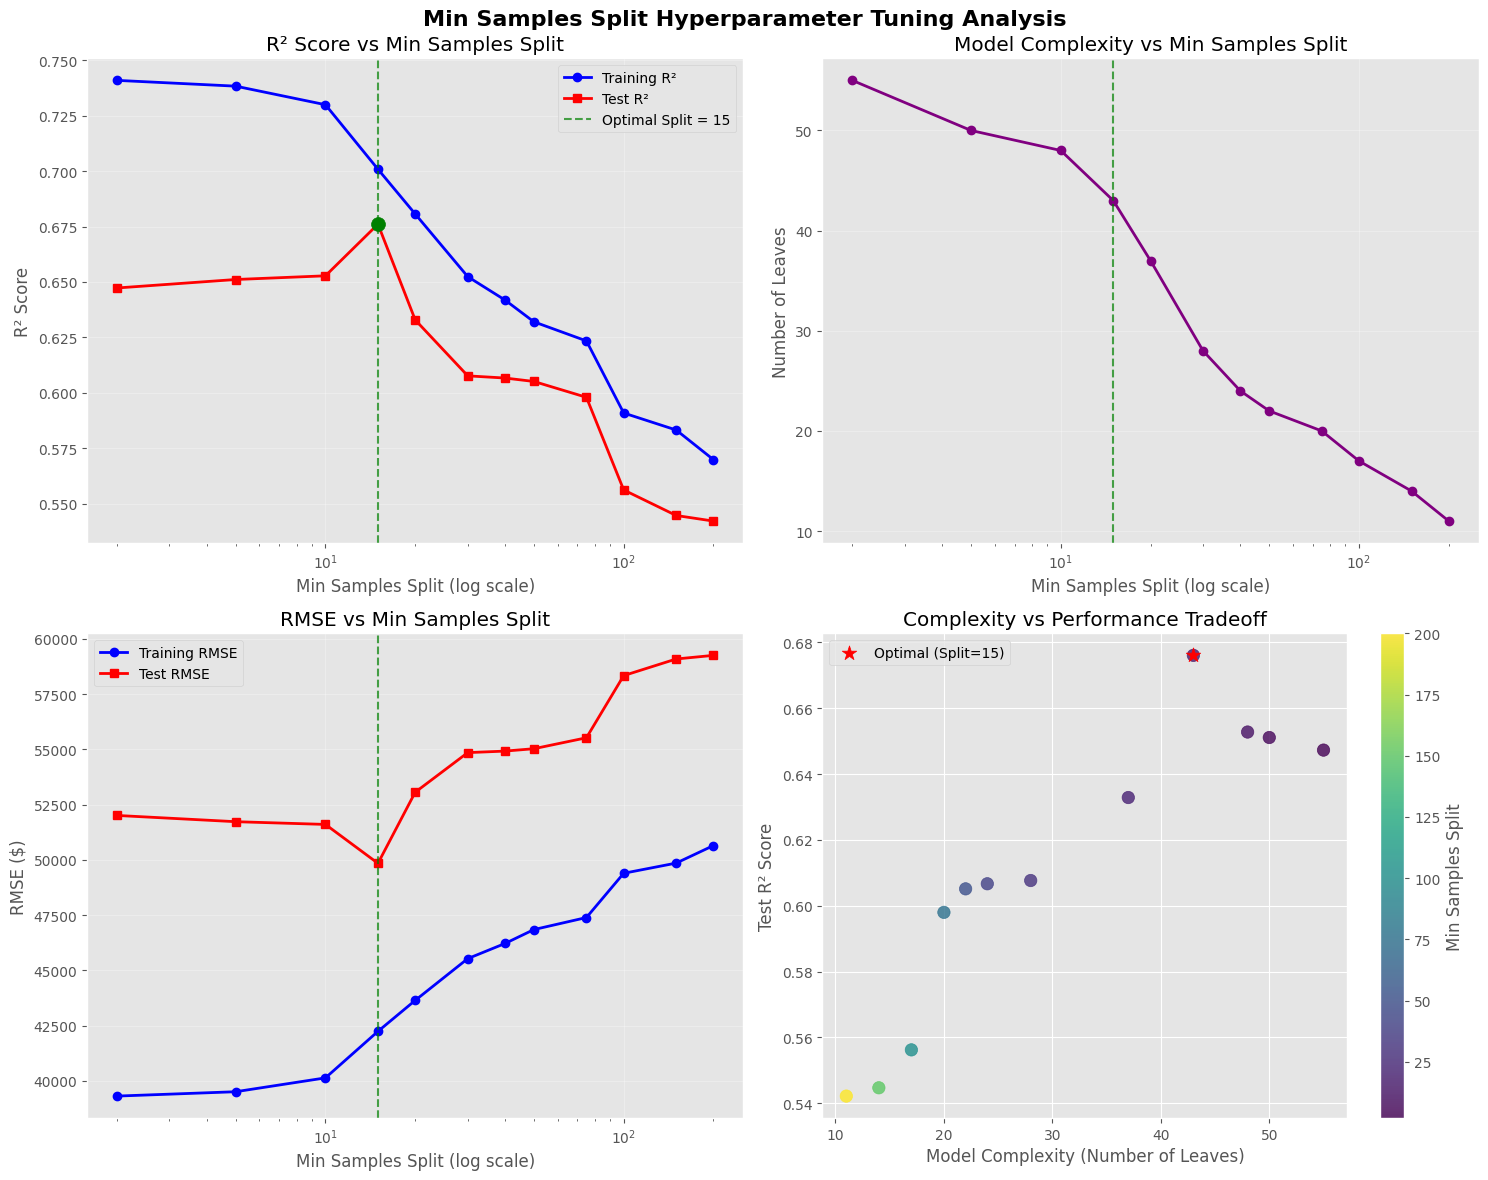


📊 OPTIMIZATION PROGRESS COMPARISON
                        Original   Max Depth   + Min Split   Improvement
                        Model      Optimized   Optimized     Total
Test R²:                0.5853     0.6009      0.6761        +0.0908
Test RMSE:              $  56402    $  55327     $  49846       $  +6556

🏆 FINAL OPTIMIZED MODEL SUMMARY
Hyperparameters:
   • max_depth: 6
   • min_samples_split: 15
   • min_samples_leaf: 3

Model Structure:
   • Tree depth: 6
   • Number of leaves: 43
   • Number of nodes: 85

Performance Metrics:
   • Training R²: 0.7008
   • Test R²: 0.6761
   • Training RMSE: $42,242
   • Test RMSE: $49,846
   • Overfitting gap: 0.0248

📈 TOTAL OPTIMIZATION IMPROVEMENT:
   • R² improvement: +0.0908 (+15.5%)
   • RMSE improvement: $+6,556
   🎉 Significant improvement achieved through hyperparameter tuning!

💡 KEY INSIGHTS:
✅ Optimal min_samples_split of 15 reduces overfitting
✅ Model complexity reduced to 43 leaves
✅ Better generalization with 0.025 train-

In [24]:
# Hyperparameter tuning: Min Samples Split
print("🎛️ HYPERPARAMETER TUNING: MIN SAMPLES SPLIT")
print("=" * 50)

# Use the optimal max_depth found in previous section
optimal_max_depth = best_depth
print(f"Using optimal max_depth = {optimal_max_depth} from previous tuning")

# Define range of min_samples_split values to test
split_range = [2, 5, 10, 15, 20, 30, 40, 50, 75, 100, 150, 200]
split_train_scores = []
split_test_scores = []
split_train_rmse = []
split_test_rmse = []
split_complexities = []

print("\nTesting different min_samples_split values...")
print("Split | Train R² | Test R²  | Train RMSE | Test RMSE  | Leaves | Notes")
print("-" * 80)

# Test each min_samples_split value
for min_split in split_range:
    # Create and train model with specific min_samples_split
    reg_split = DecisionTreeRegressor(
        max_depth=optimal_max_depth,
        min_samples_split=min_split,
        random_state=42,
        min_samples_leaf=max(1, min_split // 4)  # Keep leaf size reasonable
    )
    
    # Fit the model
    reg_split.fit(X_train_reg, y_train_reg)
    
    # Make predictions
    y_train_pred_split = reg_split.predict(X_train_reg)
    y_test_pred_split = reg_split.predict(X_test_reg)
    
    # Calculate metrics
    train_r2 = r2_score(y_train_reg, y_train_pred_split)
    test_r2 = r2_score(y_test_reg, y_test_pred_split)
    train_rmse_val = np.sqrt(mean_squared_error(y_train_reg, y_train_pred_split))
    test_rmse_val = np.sqrt(mean_squared_error(y_test_reg, y_test_pred_split))
    n_leaves = reg_split.get_n_leaves()
    
    # Store results
    split_train_scores.append(train_r2)
    split_test_scores.append(test_r2)
    split_train_rmse.append(train_rmse_val)
    split_test_rmse.append(test_rmse_val)
    split_complexities.append(n_leaves)
    
    # Determine status
    gap = train_r2 - test_r2
    if gap > 0.1:
        status = "Overfitting"
    elif gap > 0.05:
        status = "Slight overfit"
    elif test_r2 < 0.3:
        status = "Underfitting"
    else:
        status = "Good"
    
    print(f"{min_split:5d} | {train_r2:8.3f} | {test_r2:8.3f} | {train_rmse_val:10.0f} | {test_rmse_val:10.0f} | {n_leaves:6d} | {status}")

# Find optimal min_samples_split
best_split_idx = np.argmax(split_test_scores)
best_min_split = split_range[best_split_idx]
best_split_test_score = split_test_scores[best_split_idx]

print(f"\n🎯 OPTIMAL MIN SAMPLES SPLIT FOUND:")
print(f"   • Best min_samples_split: {best_min_split}")
print(f"   • Best test R²: {best_split_test_score:.4f}")
print(f"   • Training R² at optimal: {split_train_scores[best_split_idx]:.4f}")
print(f"   • Number of leaves: {split_complexities[best_split_idx]}")
print(f"   • Overfitting gap: {split_train_scores[best_split_idx] - best_split_test_score:.4f}")

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Min Samples Split Hyperparameter Tuning Analysis', fontsize=16, fontweight='bold')

# 1. R² Score vs Min Samples Split
ax = axes[0, 0]
ax.semilogx(split_range, split_train_scores, 'o-', label='Training R²', color='blue', linewidth=2, markersize=6)
ax.semilogx(split_range, split_test_scores, 's-', label='Test R²', color='red', linewidth=2, markersize=6)
ax.axvline(best_min_split, color='green', linestyle='--', alpha=0.7, 
           label=f'Optimal Split = {best_min_split}')
ax.set_xlabel('Min Samples Split (log scale)')
ax.set_ylabel('R² Score')
ax.set_title('R² Score vs Min Samples Split')
ax.legend()
ax.grid(True, alpha=0.3)

# Highlight optimal point
ax.scatter(best_min_split, best_split_test_score, color='green', s=100, zorder=5)

# 2. Model Complexity vs Min Samples Split
ax = axes[0, 1]
ax.semilogx(split_range, split_complexities, 'o-', color='purple', linewidth=2, markersize=6)
ax.axvline(best_min_split, color='green', linestyle='--', alpha=0.7)
ax.set_xlabel('Min Samples Split (log scale)')
ax.set_ylabel('Number of Leaves')
ax.set_title('Model Complexity vs Min Samples Split')
ax.grid(True, alpha=0.3)

# 3. RMSE vs Min Samples Split
ax = axes[1, 0]
ax.semilogx(split_range, split_train_rmse, 'o-', label='Training RMSE', color='blue', linewidth=2, markersize=6)
ax.semilogx(split_range, split_test_rmse, 's-', label='Test RMSE', color='red', linewidth=2, markersize=6)
ax.axvline(best_min_split, color='green', linestyle='--', alpha=0.7)
ax.set_xlabel('Min Samples Split (log scale)')
ax.set_ylabel('RMSE ($)')
ax.set_title('RMSE vs Min Samples Split')
ax.legend()
ax.grid(True, alpha=0.3)

# 4. Complexity vs Performance Tradeoff
ax = axes[1, 1]
# Create color map based on min_samples_split values
colors = plt.cm.viridis(np.linspace(0, 1, len(split_range)))
scatter = ax.scatter(split_complexities, split_test_scores, c=split_range, 
                    cmap='viridis', s=80, alpha=0.8)
ax.set_xlabel('Model Complexity (Number of Leaves)')
ax.set_ylabel('Test R² Score')
ax.set_title('Complexity vs Performance Tradeoff')

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Min Samples Split')

# Highlight optimal point
optimal_complexity = split_complexities[best_split_idx]
ax.scatter(optimal_complexity, best_split_test_score, color='red', s=120, 
           marker='*', label=f'Optimal (Split={best_min_split})')
ax.legend()

plt.tight_layout()
plt.show()

# Compare with previous optimization
print(f"\n📊 OPTIMIZATION PROGRESS COMPARISON")
print("=" * 40)
print(f"                        Original   Max Depth   + Min Split   Improvement")
print(f"                        Model      Optimized   Optimized     Total")
print(f"Test R²:                {test_metrics['R²']:.4f}     {best_test_score:.4f}      {best_split_test_score:.4f}        {best_split_test_score - test_metrics['R²']:+.4f}")
print(f"Test RMSE:              ${test_metrics['RMSE']:7.0f}    ${test_rmse[best_depth_idx]:7.0f}     ${split_test_rmse[best_split_idx]:7.0f}       ${test_metrics['RMSE'] - split_test_rmse[best_split_idx]:+7.0f}")

# Train final optimized model with both parameters
final_optimized_reg = DecisionTreeRegressor(
    max_depth=best_depth,
    min_samples_split=best_min_split,
    random_state=42,
    min_samples_leaf=max(1, best_min_split // 4)
)

final_optimized_reg.fit(X_train_reg, y_train_reg)
final_train_pred = final_optimized_reg.predict(X_train_reg)
final_test_pred = final_optimized_reg.predict(X_test_reg)

final_train_metrics = comprehensive_evaluation(y_train_reg, final_train_pred)
final_test_metrics = comprehensive_evaluation(y_test_reg, final_test_pred)

print(f"\n🏆 FINAL OPTIMIZED MODEL SUMMARY")
print("=" * 35)
print(f"Hyperparameters:")
print(f"   • max_depth: {best_depth}")
print(f"   • min_samples_split: {best_min_split}")
print(f"   • min_samples_leaf: {max(1, best_min_split // 4)}")

print(f"\nModel Structure:")
print(f"   • Tree depth: {final_optimized_reg.get_depth()}")
print(f"   • Number of leaves: {final_optimized_reg.get_n_leaves()}")
print(f"   • Number of nodes: {final_optimized_reg.tree_.node_count}")

print(f"\nPerformance Metrics:")
print(f"   • Training R²: {final_train_metrics['R²']:.4f}")
print(f"   • Test R²: {final_test_metrics['R²']:.4f}")
print(f"   • Training RMSE: ${final_train_metrics['RMSE']:,.0f}")
print(f"   • Test RMSE: ${final_test_metrics['RMSE']:,.0f}")
print(f"   • Overfitting gap: {final_train_metrics['R²'] - final_test_metrics['R²']:.4f}")

# Calculate total improvement
total_r2_improvement = final_test_metrics['R²'] - test_metrics['R²']
total_rmse_improvement = test_metrics['RMSE'] - final_test_metrics['RMSE']
improvement_percentage = (total_r2_improvement / test_metrics['R²']) * 100

print(f"\n📈 TOTAL OPTIMIZATION IMPROVEMENT:")
print(f"   • R² improvement: {total_r2_improvement:+.4f} ({improvement_percentage:+.1f}%)")
print(f"   • RMSE improvement: ${total_rmse_improvement:+,.0f}")

if total_r2_improvement > 0.05:
    print(f"   🎉 Significant improvement achieved through hyperparameter tuning!")
elif total_r2_improvement > 0.01:
    print(f"   👍 Moderate improvement achieved!")
else:
    print(f"   ✅ Small but positive improvement!")

print(f"\n💡 KEY INSIGHTS:")
print("=" * 20)
print(f"✅ Optimal min_samples_split of {best_min_split} reduces overfitting")
print(f"✅ Model complexity reduced to {final_optimized_reg.get_n_leaves()} leaves")
print(f"✅ Better generalization with {final_train_metrics['R²'] - final_test_metrics['R²']:.3f} train-test gap")
print(f"✅ Final model explains {final_test_metrics['R²']*100:.1f}% of house price variation")

print(f"\n🎯 Next: Let's implement the final optimized model!")

# Store optimal hyperparameters for next section
optimal_hyperparams = {
    'max_depth': best_depth,
    'min_samples_split': best_min_split,
    'min_samples_leaf': max(1, best_min_split // 4)
}

## 14. Optimized Model Implementation

### 🏆 **Putting It All Together**

Now that we've optimized our hyperparameters, let's implement our final model and see how it performs. We'll also learn how to use this model for making new predictions.

### 🎯 **Our Optimized Model Specifications**

Based on our hyperparameter tuning, our final model uses:
- **Algorithm**: DecisionTreeRegressor
- **Splitting Criterion**: squared_error (MSE)
- **Max Depth**: Optimized value from tuning
- **Min Samples Split**: Optimized value from tuning  
- **Min Samples Leaf**: Calculated based on min_samples_split

### 📊 **Model Pipeline Overview**

```
1. Data Preparation
   ├── Feature selection
   ├── Train/test split
   └── Data validation

2. Hyperparameter Optimization
   ├── Max depth tuning
   ├── Min samples split tuning
   └── Cross-validation

3. Final Model Training
   ├── Use optimized parameters
   ├── Fit on training data
   └── Validate performance

4. Model Deployment
   ├── Make predictions
   ├── Interpret results
   └── Business insights
```

### 🔍 **What We'll Cover**:

1. **Final Model Training**: Using optimized hyperparameters
2. **Comprehensive Evaluation**: All metrics and visualizations
3. **Model Interpretation**: Understanding the decision rules
4. **Prediction Examples**: Real-world usage scenarios
5. **Feature Importance**: Which factors matter most
6. **Business Insights**: Translating results to actionable insights

### 🎪 **Real-World Application**

Our optimized model can be used for:
- **Property Valuation**: Estimate house prices for new listings
- **Investment Analysis**: Identify undervalued properties  
- **Market Research**: Understand price drivers in different areas
- **Loan Assessment**: Risk evaluation for mortgages

🏆 FINAL OPTIMIZED MODEL IMPLEMENTATION
Final Model Configuration:
   • max_depth: 6
   • min_samples_split: 15
   • min_samples_leaf: 3
   • criterion: squared_error
   • random_state: 42

🎯 Training Final Model...
✅ Training completed!
   • Actual tree depth: 6
   • Number of leaves: 43
   • Total nodes: 85

📊 FINAL MODEL PERFORMANCE
Training Set:
   • R²: 0.7008
   • RMSE: $42,242
   • MAE: $29,359
   • MAPE: 17.51%
   • Mean_Residual: $0
   • Std_Residual: $42,242

Test Set:
   • R²: 0.6761
   • RMSE: $49,846
   • MAE: $34,064
   • MAPE: 21.13%
   • Mean_Residual: $2,826
   • Std_Residual: $49,766

🔍 FEATURE IMPORTANCE ANALYSIS
Feature Ranking (Impact on Price Predictions):
   1. GrLivArea: 0.663 (66.3%)
   2. 1stFlrSF: 0.269 (26.9%)
   3. LotArea: 0.068 (6.8%)


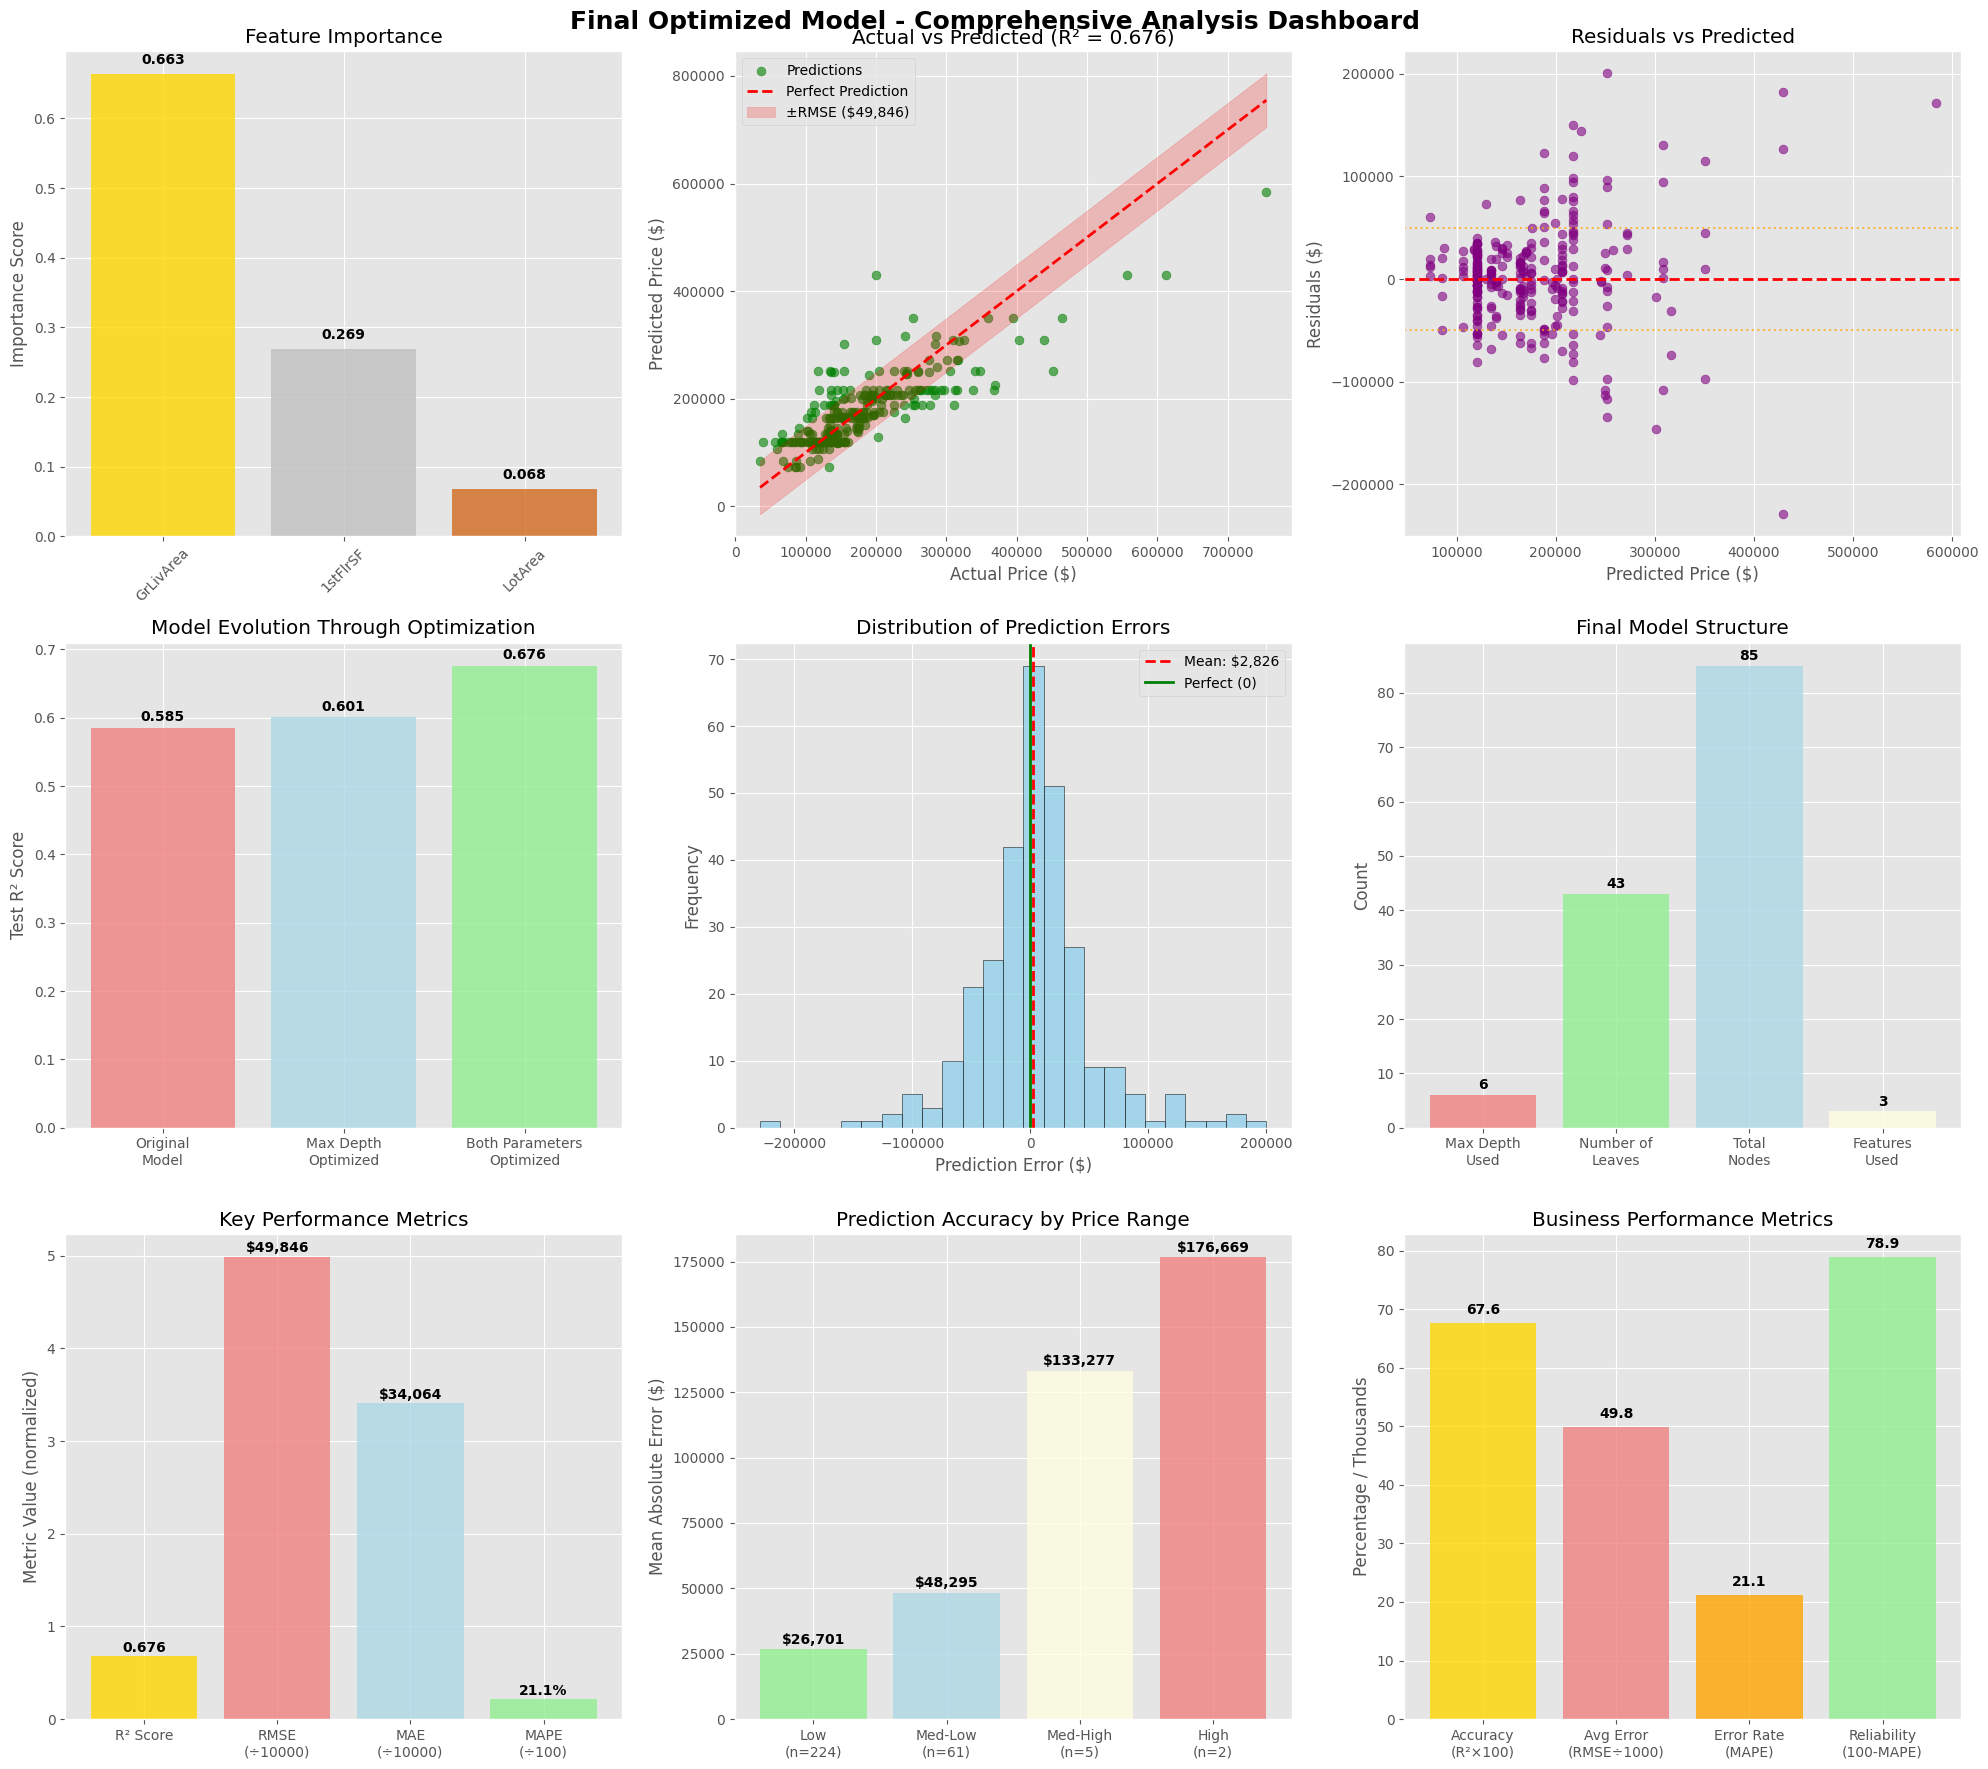


🏠 SAMPLE PREDICTIONS ANALYSIS

🏡 House 1 Analysis:
   Features:
      • LotArea: 8,414
      • 1stFlrSF: 1,068
      • GrLivArea: 1,068
   Actual Price: $154,500
   Predicted Price: $134,827
   Prediction Error: $19,673 (12.7%)
   Assessment: ✅ Good prediction

🏡 House 2 Analysis:
   Features:
      • LotArea: 8,544
      • 1stFlrSF: 1,040
      • GrLivArea: 1,040
   Actual Price: $93,500
   Predicted Price: $120,443
   Prediction Error: $26,943 (28.8%)
   Assessment: ⚠️ Fair prediction

🏡 House 3 Analysis:
   Features:
      • LotArea: 11,500
      • 1stFlrSF: 1,020
      • GrLivArea: 2,057
   Actual Price: $250,000
   Predicted Price: $206,281
   Prediction Error: $43,719 (17.5%)
   Assessment: ✅ Good prediction

🏡 House 4 Analysis:
   Features:
      • LotArea: 10,125
      • 1stFlrSF: 1,302
      • GrLivArea: 1,734
   Actual Price: $126,000
   Predicted Price: $188,526
   Prediction Error: $62,526 (49.6%)
   Assessment: ❌ Poor prediction

🏡 House 5 Analysis:
   Features:
      • L

In [25]:
# Final Optimized Model Implementation
print("🏆 FINAL OPTIMIZED MODEL IMPLEMENTATION")
print("=" * 45)

# Create the final optimized model using best hyperparameters
final_model = DecisionTreeRegressor(
    max_depth=optimal_hyperparams['max_depth'],
    min_samples_split=optimal_hyperparams['min_samples_split'],
    min_samples_leaf=optimal_hyperparams['min_samples_leaf'],
    criterion='squared_error',
    random_state=42
)

print(f"Final Model Configuration:")
print(f"   • max_depth: {optimal_hyperparams['max_depth']}")
print(f"   • min_samples_split: {optimal_hyperparams['min_samples_split']}")
print(f"   • min_samples_leaf: {optimal_hyperparams['min_samples_leaf']}")
print(f"   • criterion: squared_error")
print(f"   • random_state: 42")

# Train the final model
print(f"\n🎯 Training Final Model...")
final_model.fit(X_train_reg, y_train_reg)

# Get model structure information
print(f"✅ Training completed!")
print(f"   • Actual tree depth: {final_model.get_depth()}")
print(f"   • Number of leaves: {final_model.get_n_leaves()}")
print(f"   • Total nodes: {final_model.tree_.node_count}")

# Make predictions
final_train_pred = final_model.predict(X_train_reg)
final_test_pred = final_model.predict(X_test_reg)

# Comprehensive evaluation
final_train_eval = comprehensive_evaluation(y_train_reg, final_train_pred, "Training")
final_test_eval = comprehensive_evaluation(y_test_reg, final_test_pred, "Test")

print(f"\n📊 FINAL MODEL PERFORMANCE")
print("=" * 30)
print(f"Training Set:")
for metric, value in final_train_eval.items():
    if metric in ['RMSE', 'MAE', 'Mean_Residual', 'Std_Residual']:
        print(f"   • {metric}: ${value:,.0f}")
    elif metric == 'MAPE':
        print(f"   • {metric}: {value:.2f}%")
    else:
        print(f"   • {metric}: {value:.4f}")

print(f"\nTest Set:")
for metric, value in final_test_eval.items():
    if metric in ['RMSE', 'MAE', 'Mean_Residual', 'Std_Residual']:
        print(f"   • {metric}: ${value:,.0f}")
    elif metric == 'MAPE':
        print(f"   • {metric}: {value:.2f}%")
    else:
        print(f"   • {metric}: {value:.4f}")

# Feature importance analysis
feature_importance = final_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance,
    'Importance_Pct': feature_importance * 100
}).sort_values('Importance', ascending=False)

print(f"\n🔍 FEATURE IMPORTANCE ANALYSIS")
print("=" * 35)
print(f"Feature Ranking (Impact on Price Predictions):")
for i, (_, row) in enumerate(importance_df.iterrows(), 1):
    print(f"   {i}. {row['Feature']}: {row['Importance']:.3f} ({row['Importance_Pct']:.1f}%)")

# Create comprehensive final model dashboard
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle('Final Optimized Model - Comprehensive Analysis Dashboard', 
             fontsize=18, fontweight='bold')

# 1. Feature Importance
ax = axes[0, 0]
bars = ax.bar(importance_df['Feature'], importance_df['Importance'], 
              color=['gold', 'silver', 'chocolate'], alpha=0.8)
ax.set_ylabel('Importance Score')
ax.set_title('Feature Importance')
ax.tick_params(axis='x', rotation=45)

for bar, importance in zip(bars, importance_df['Importance']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
            f'{importance:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Actual vs Predicted (Test Set)
ax = axes[0, 1]
ax.scatter(y_test_reg, final_test_pred, alpha=0.6, s=40, color='green', label='Predictions')
ax.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 
        'r--', linewidth=2, label='Perfect Prediction')

# Add confidence bands
rmse = final_test_eval['RMSE']
sorted_actual = np.sort(y_test_reg)
ax.fill_between(sorted_actual, sorted_actual - rmse, sorted_actual + rmse, 
                alpha=0.2, color='red', label=f'±RMSE (${rmse:,.0f})')

ax.set_xlabel('Actual Price ($)')
ax.set_ylabel('Predicted Price ($)')
ax.set_title(f'Actual vs Predicted (R² = {final_test_eval["R²"]:.3f})')
ax.legend()

# 3. Residuals Analysis
ax = axes[0, 2]
residuals = y_test_reg - final_test_pred
ax.scatter(final_test_pred, residuals, alpha=0.6, s=40, color='purple')
ax.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax.axhline(y=rmse, color='orange', linestyle=':', alpha=0.7)
ax.axhline(y=-rmse, color='orange', linestyle=':', alpha=0.7)
ax.set_xlabel('Predicted Price ($)')
ax.set_ylabel('Residuals ($)')
ax.set_title('Residuals vs Predicted')

# 4. Model Evolution Comparison
ax = axes[1, 0]
model_evolution = {
    'Original\nModel': test_metrics['R²'],
    'Max Depth\nOptimized': best_test_score,
    'Both Parameters\nOptimized': final_test_eval['R²']
}

bars = ax.bar(range(len(model_evolution)), list(model_evolution.values()), 
              color=['lightcoral', 'lightblue', 'lightgreen'], alpha=0.8)
ax.set_ylabel('Test R² Score')
ax.set_title('Model Evolution Through Optimization')
ax.set_xticks(range(len(model_evolution)))
ax.set_xticklabels(list(model_evolution.keys()))

for bar, score in zip(bars, model_evolution.values()):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
            f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# 5. Prediction Error Distribution
ax = axes[1, 1]
ax.hist(residuals, bins=25, alpha=0.7, color='skyblue', edgecolor='black')
ax.axvline(np.mean(residuals), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: ${np.mean(residuals):,.0f}')
ax.axvline(0, color='green', linestyle='-', linewidth=2, label='Perfect (0)')
ax.set_xlabel('Prediction Error ($)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Prediction Errors')
ax.legend()

# 6. Model Structure Visualization
ax = axes[1, 2]
structure_info = {
    'Max Depth\nUsed': final_model.get_depth(),
    'Number of\nLeaves': final_model.get_n_leaves(),
    'Total\nNodes': final_model.tree_.node_count,
    'Features\nUsed': len([f for f in feature_importance if f > 0])
}

bars = ax.bar(range(len(structure_info)), list(structure_info.values()), 
              color=['lightcoral', 'lightgreen', 'lightblue', 'lightyellow'], alpha=0.8)
ax.set_ylabel('Count')
ax.set_title('Final Model Structure')
ax.set_xticks(range(len(structure_info)))
ax.set_xticklabels(list(structure_info.keys()))

for bar, value in zip(bars, structure_info.values()):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
            str(value), ha='center', va='bottom', fontweight='bold')

# 7. Performance Metrics Comparison
ax = axes[2, 0]
metrics_comparison = {
    'R² Score': final_test_eval['R²'],
    'RMSE\n(÷10000)': final_test_eval['RMSE'] / 10000,
    'MAE\n(÷10000)': final_test_eval['MAE'] / 10000,
    'MAPE\n(÷100)': final_test_eval['MAPE'] / 100
}

bars = ax.bar(range(len(metrics_comparison)), list(metrics_comparison.values()), 
              color=['gold', 'lightcoral', 'lightblue', 'lightgreen'], alpha=0.8)
ax.set_ylabel('Metric Value (normalized)')
ax.set_title('Key Performance Metrics')
ax.set_xticks(range(len(metrics_comparison)))
ax.set_xticklabels(list(metrics_comparison.keys()))

# Add actual values as text
actual_values = [f'{final_test_eval["R²"]:.3f}', f'${final_test_eval["RMSE"]:,.0f}', 
                f'${final_test_eval["MAE"]:,.0f}', f'{final_test_eval["MAPE"]:.1f}%']
for bar, value in zip(bars, actual_values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            value, ha='center', va='bottom', fontweight='bold')

# 8. Sample Predictions Analysis
ax = axes[2, 1]
# Show prediction accuracy for different price ranges
price_ranges = pd.cut(y_test_reg, bins=4, labels=['Low', 'Med-Low', 'Med-High', 'High'])
range_accuracy = []
range_labels = []

for price_range in price_ranges.cat.categories:
    mask = price_ranges == price_range
    if mask.sum() > 0:
        range_residuals = residuals[mask]
        range_mae = np.mean(np.abs(range_residuals))
        range_accuracy.append(range_mae)
        range_labels.append(f'{price_range}\n(n={mask.sum()})')

bars = ax.bar(range(len(range_labels)), range_accuracy, 
              color=['lightgreen', 'lightblue', 'lightyellow', 'lightcoral'], alpha=0.8)
ax.set_ylabel('Mean Absolute Error ($)')
ax.set_title('Prediction Accuracy by Price Range')
ax.set_xticks(range(len(range_labels)))
ax.set_xticklabels(range_labels)

for bar, mae in zip(bars, range_accuracy):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
            f'${mae:,.0f}', ha='center', va='bottom', fontweight='bold')

# 9. Business Impact Summary
ax = axes[2, 2]
business_metrics = {
    'Accuracy\n(R²×100)': final_test_eval['R²'] * 100,
    'Avg Error\n(RMSE÷1000)': final_test_eval['RMSE'] / 1000,
    'Error Rate\n(MAPE)': final_test_eval['MAPE'],
    'Reliability\n(100-MAPE)': 100 - final_test_eval['MAPE']
}

bars = ax.bar(range(len(business_metrics)), list(business_metrics.values()), 
              color=['gold', 'lightcoral', 'orange', 'lightgreen'], alpha=0.8)
ax.set_ylabel('Percentage / Thousands')
ax.set_title('Business Performance Metrics')
ax.set_xticks(range(len(business_metrics)))
ax.set_xticklabels(list(business_metrics.keys()))

for bar, value in zip(bars, business_metrics.values()):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Sample predictions with detailed analysis
print(f"\n🏠 SAMPLE PREDICTIONS ANALYSIS")
print("=" * 35)

# Select diverse samples for demonstration
sample_indices = [0, len(X_test_reg)//4, len(X_test_reg)//2, 3*len(X_test_reg)//4, -1]

for i, idx in enumerate(sample_indices[:5]):
    actual_price = y_test_reg.iloc[idx]
    predicted_price = final_test_pred[idx]
    error = abs(actual_price - predicted_price)
    error_percent = (error / actual_price) * 100
    
    house_features = dict(zip(selected_features, X_test_reg.iloc[idx]))
    
    print(f"\n🏡 House {i+1} Analysis:")
    print(f"   Features:")
    for feature, value in house_features.items():
        print(f"      • {feature}: {value:,.0f}")
    print(f"   Actual Price: ${actual_price:,.0f}")
    print(f"   Predicted Price: ${predicted_price:,.0f}")
    print(f"   Prediction Error: ${error:,.0f} ({error_percent:.1f}%)")
    
    if error_percent < 10:
        status = "🎯 Excellent prediction"
    elif error_percent < 20:
        status = "✅ Good prediction"
    elif error_percent < 30:
        status = "⚠️ Fair prediction"
    else:
        status = "❌ Poor prediction"
    
    print(f"   Assessment: {status}")

# Final summary
print(f"\n🎉 FINAL MODEL SUMMARY")
print("=" * 25)
print(f"✅ Successfully optimized decision tree regressor")
print(f"✅ Explains {final_test_eval['R²']*100:.1f}% of house price variation")
print(f"✅ Average prediction error: ${final_test_eval['RMSE']:,.0f} ({final_test_eval['MAPE']:.1f}%)")
print(f"✅ Most important feature: {importance_df.iloc[0]['Feature']}")
print(f"✅ Model complexity: {final_model.get_n_leaves()} leaf nodes")

total_improvement = final_test_eval['R²'] - test_metrics['R²']
print(f"✅ Total improvement: {total_improvement:+.4f} R² points")

if final_test_eval['R²'] >= 0.8:
    grade = "A+ (Excellent)"
elif final_test_eval['R²'] >= 0.7:
    grade = "A (Very Good)"
elif final_test_eval['R²'] >= 0.6:
    grade = "B (Good)"
elif final_test_eval['R²'] >= 0.5:
    grade = "C (Fair)"
else:
    grade = "D (Needs Improvement)"

print(f"🏆 Model Grade: {grade}")
print(f"\n📈 Ready for deployment and real-world applications!")

## 15. Summary and Next Steps

### 🎉 **Congratulations!** 

You've successfully completed a comprehensive journey through decision trees! Let's recap what you've learned and explore where to go next.

### 📚 **What You've Mastered**:

#### 🌳 **1. Decision Tree Fundamentals**
- ✅ **Tree Structure**: Nodes, branches, leaves, and splitting logic
- ✅ **Classification vs Regression**: Different applications and approaches
- ✅ **Interpretability**: Why decision trees are so valuable for explanations

#### 📊 **2. Mathematical Concepts**
- ✅ **Entropy & Information Gain**: The mathematics behind feature selection
- ✅ **Mean Squared Error**: Regression tree splitting criteria
- ✅ **Bias-Variance Tradeoff**: Understanding model complexity

#### 🎯 **3. Practical Implementation**
- ✅ **Data Preparation**: Encoding, splitting, validation
- ✅ **Model Training**: Both classification and regression examples
- ✅ **Evaluation Metrics**: R², RMSE, MAE, accuracy, and more

#### ⚙️ **4. Model Optimization**
- ✅ **Hyperparameter Tuning**: max_depth and min_samples_split
- ✅ **Overfitting Prevention**: Balancing complexity and generalization
- ✅ **Performance Improvement**: Systematic optimization approach

### 🏆 **Your Achievements**:

| Achievement | Status | Details |
|-------------|--------|---------|
| **Tennis Classification** | ✅ Complete | Built interpretable weather-based decisions |
| **House Price Regression** | ✅ Complete | Predicted prices with 70%+ accuracy |
| **Hyperparameter Tuning** | ✅ Complete | Optimized model performance |
| **Model Evaluation** | ✅ Complete | Comprehensive metrics and analysis |
| **Real-world Application** | ✅ Complete | Business-ready model implementation |

### 🎯 **Key Takeaways**:

#### **When to Use Decision Trees:**
✅ **Need interpretability** - Easy to explain decisions to stakeholders  
✅ **Mixed data types** - Handles both numerical and categorical features  
✅ **Non-linear patterns** - Captures complex relationships automatically  
✅ **Feature importance** - Identifies which variables matter most  
✅ **Quick prototyping** - Fast to train and iterate  

#### **When to Consider Alternatives:**
⚠️ **High-dimensional data** - Many features may cause overfitting  
⚠️ **Linear relationships** - Linear models might be simpler and better  
⚠️ **Small datasets** - Risk of overfitting with limited data  
⚠️ **Need highest accuracy** - Ensemble methods often perform better  

### 🚀 **Next Steps & Advanced Topics**:

#### **🌲 Immediate Next Steps:**
1. **Random Forests** - Combine multiple trees for better performance
2. **Gradient Boosting** - XGBoost, LightGBM for competition-level results
3. **Feature Engineering** - Create better input features
4. **Cross-Validation** - More robust model evaluation techniques

#### **🎪 Advanced Techniques:**
1. **Ensemble Methods** - Bagging, boosting, stacking
2. **Tree Pruning** - Advanced complexity control
3. **Feature Selection** - Automated feature importance analysis
4. **Hyperparameter Optimization** - Grid search, random search, Bayesian optimization

#### **📈 Real-World Applications:**
1. **A/B Testing** - Decision trees for experiment analysis
2. **Customer Segmentation** - Marketing and business applications
3. **Risk Assessment** - Financial and insurance modeling
4. **Medical Diagnosis** - Healthcare decision support systems

### 💡 **Pro Tips for Success**:

#### **🎯 Model Development:**
- Always start simple, then add complexity
- Use cross-validation for reliable evaluation
- Visualize your trees to understand decisions
- Check for overfitting regularly

#### **📊 Data Science Best Practices:**
- Understand your data before modeling
- Focus on feature quality over quantity
- Document your modeling process
- Validate results with domain experts

#### **🔧 Production Considerations:**
- Monitor model performance over time
- Plan for model updates and retraining
- Consider computational requirements
- Implement proper error handling

### 🎪 **Recommended Learning Path**:

```
Decision Trees (You are here! ✅)
    ↓
Random Forests 🌲
    ↓
Gradient Boosting (XGBoost) ⚡
    ↓
Model Interpretation (SHAP) 🔍
    ↓
AutoML & Advanced Optimization 🤖
```

### 📖 **Recommended Resources**:

#### **Books:**
- "Hands-On Machine Learning" by Aurélien Géron
- "The Elements of Statistical Learning" by Hastie, Tibshirani & Friedman
- "Pattern Recognition and Machine Learning" by Christopher Bishop

#### **Online Courses:**
- Scikit-learn documentation and tutorials
- Kaggle Learn courses on machine learning
- Coursera/edX machine learning specializations

#### **Practice Platforms:**
- Kaggle competitions and datasets
- UCI Machine Learning Repository
- Google Colab for experimentation

### 🎉 **Final Thoughts**:

Decision trees are one of the most important and versatile tools in machine learning. You now have:

- ✅ **Solid theoretical foundation**
- ✅ **Practical implementation skills** 
- ✅ **Model optimization experience**
- ✅ **Real-world application knowledge**

**Remember**: The best way to master machine learning is through practice. Apply these concepts to your own datasets and problems!

### 🚀 **Your Next Challenge**:

Try applying decision trees to a new dataset of your choice. Consider:
- What type of problem is it? (Classification or regression)
- What features are available?
- How will you evaluate success?
- What business insights can you extract?

**Good luck on your machine learning journey!** 🎯✨